In [1]:
# TODO
# add in knife loss estimator for better neckin est.

In [2]:
import sys
sys.path.append("../decklizer")
from engine import *

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import math
from random import shuffle, choice
import random
import copy

from IPython.display import clear_output
import time
import datetime
import re

from scipy.optimize import linprog
from collections import Counter
import itertools

import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())
import matplotlib.pyplot as plt

Number of processors:  12


In [3]:
def deckle(bucket, max_combo, max_patterns, target, edge, goal, verbiose):
    patterns, layout = seed_patterns(bucket['w'], 
                                     [math.ceil(i*target) 
                                      for i in bucket['q']], 
                                     bucket['B']+(edge*2), 
                                     bucket['n'], 
                                     max_combinations=max_combo, 
                                     goal=goal, 
                                     verbiose=verbiose)
    loss, inv, summary = find_optimum(patterns, 
                                      layout, 
                                      bucket['w'], 
                                      [math.ceil(i*target) 
                                       for i in bucket['q']], 
                                      bucket['B']+(edge*2), 
                                      bucket['n'], 
                                      bucket['L'],
                                    max_combinations=max_combo,
                                    max_patterns=max_patterns,
                                    prioritize='time')
    return [loss, int(summary['jumbos'].sum()), 
            inv, summary, max_combo, 
            summary.shape[0], target, edge]

In [4]:
# global params
random.seed(42)
combination_params = [2,3]
pattern_params = [3,4]
production_targets = [1]
edge_trim_allowance = np.arange(1)
goal = 3
verbiose = False

In [6]:
res = []
buckets = dict()
for i in range(1000):
    bid = str(random.randint(1000,9999))
    buckets[bid] = dict()
    slits = random.randint(1,9)
    B = random.randint(100,10000)
    L = random.randint(10000,100000)
    w = [random.randint(21,B-20) for i in range(slits)]
    n = [random.randint(1,20) for i in range(slits)]
    q = [random.randint(10,100) for i in range(slits)]
    pattern_params = [slits]

    buckets[bid]['w'] = w
    buckets[bid]['n'] = n
    buckets[bid]['L'] = L
    buckets[bid]['q'] = q
    buckets[bid]['B'] = B

    bucket = buckets[bid]
    
    params = []
    for max_combo in combination_params:
        for max_patterns in pattern_params:
            for target in production_targets:
                for edge in edge_trim_allowance:
                    params.append([bucket, max_combo, max_patterns, target, edge, goal, verbiose])
    
    for param in params:
        out = deckle(param[0],
                param[1],
                param[2],
                param[3],
                param[4],
                param[5],
                param[6])
        out.append(bid)
        res.append(out)

total loss:      19.71 % (4.59e+05 sqm)
total inventory: 3.34 % (7.76e+04 sqm)

inventory created: {1844: 1.0}

layout summary:

loss: 19.71% 	 12.0 x	 {1844: 2}

total jumbos: 12.0 (2.33e+06 sqm)
total loss:      19.71 % (4.59e+05 sqm)
total inventory: 3.34 % (7.76e+04 sqm)

inventory created: {1844: 1.0}

layout summary:

loss: 19.71% 	 12.0 x	 {1844: 2}

total jumbos: 12.0 (2.33e+06 sqm)
6 possible max 2 patterns

total loss:      4.30 % (2.19e+05 sqm)
total inventory: 8.48 % (4.33e+05 sqm)

inventory created: {538: 3.0, 502: 10.0}

layout summary:

loss: 4.30% 	 7.0 x	 {538: 6, 502: 12}

total jumbos: 7.0 (5.11e+06 sqm)
6 possible max 2 patterns

total loss:      4.30 % (2.19e+05 sqm)
total inventory: 8.48 % (4.33e+05 sqm)

inventory created: {538: 3.0, 502: 10.0}

layout summary:

loss: 4.30% 	 7.0 x	 {538: 6, 502: 12}

total jumbos: 7.0 (5.11e+06 sqm)
total loss:      23.22 % (2.53e+07 sqm)
total inventory: 0.14 % (1.51e+05 sqm)

inventory created: {2887: 0.0, 2239: 0.0, 1728: 0.

total loss:      10.24 % (1.66e+07 sqm)
total inventory: 0.47 % (7.67e+05 sqm)

inventory created: {8679: 0.0, 4136: 2.0, 9075: 0.0, 195: 3.0, 1891: 1.0, 8803: 0.0, 4391: 0.0}

layout summary:

loss: 16.05% 	 23.0 x	 {8679: 0, 4136: 2, 9075: 0, 195: 0, 1891: 0, 8803: 0, 4391: 0}
loss: 11.89% 	 43.0 x	 {8679: 1, 4136: 0, 9075: 0, 195: 0, 1891: 0, 8803: 0, 4391: 0}
loss: 10.94% 	 24.0 x	 {8679: 0, 4136: 0, 9075: 0, 195: 0, 1891: 0, 8803: 0, 4391: 2}
loss: 10.60% 	 90.0 x	 {8679: 0, 4136: 0, 9075: 0, 195: 0, 1891: 0, 8803: 1, 4391: 0}
loss: 7.89% 	 32.0 x	 {8679: 0, 4136: 0, 9075: 1, 195: 0, 1891: 0, 8803: 0, 4391: 0}
loss: 1.22% 	 11.0 x	 {8679: 0, 4136: 2, 9075: 0, 195: 7, 1891: 0, 8803: 0, 4391: 0}
loss: 0.32% 	 8.0 x	 {8679: 0, 4136: 1, 9075: 0, 195: 0, 1891: 3, 8803: 0, 4391: 0}

total jumbos: 231.0 (1.63e+08 sqm)
total loss:      15.16 % (2.66e+06 sqm)
total inventory: 0.73 % (1.28e+05 sqm)

inventory created: {662: 3.0, 2219: 0.0, 2177: 0.0, 22: 8.0}

layout summary:

loss: 21.43% 

total loss:      5.00 % (2.64e+06 sqm)
total inventory: 2.00 % (1.06e+06 sqm)

inventory created: {933: 3.0, 8333: 0.0, 1314: 5.0, 3045: 2.0, 1141: 4.0, 1114: 6.0, 3871: 1.0, 6622: 0.0, 1966: 2.0}

layout summary:

loss: 11.96% 	 25.0 x	 {933: 0, 8333: 0, 1314: 0, 3045: 0, 1141: 0, 1114: 0, 3871: 2, 6622: 0, 1966: 0}
loss: 7.79% 	 18.0 x	 {933: 0, 8333: 0, 1314: 0, 3045: 2, 1141: 0, 1114: 0, 3871: 0, 6622: 0, 1966: 1}
loss: 5.23% 	 76.0 x	 {933: 0, 8333: 1, 1314: 0, 3045: 0, 1141: 0, 1114: 0, 3871: 0, 6622: 0, 1966: 0}
loss: 2.97% 	 40.0 x	 {933: 2, 8333: 0, 1314: 0, 3045: 0, 1141: 0, 1114: 0, 3871: 0, 6622: 1, 1966: 0}
loss: 1.90% 	 1.0 x	 {933: 5, 8333: 0, 1314: 0, 3045: 0, 1141: 0, 1114: 0, 3871: 1, 6622: 0, 1966: 0}
loss: 1.72% 	 11.0 x	 {933: 0, 8333: 0, 1314: 5, 3045: 0, 1141: 0, 1114: 0, 3871: 0, 6622: 0, 1966: 1}
loss: 0.75% 	 1.0 x	 {933: 0, 8333: 0, 1314: 0, 3045: 1, 1141: 0, 1114: 5, 3871: 0, 6622: 0, 1966: 0}
loss: 0.24% 	 8.0 x	 {933: 0, 8333: 0, 1314: 0, 3045: 1, 1141: 5,

total loss:      16.23 % (1.02e+06 sqm)
total inventory: 0.85 % (5.38e+04 sqm)

inventory created: {1271: 0.0, 1496: 0.0, 170: 5.0, 1466: 0.0, 876: 2.0, 1035: 0.0, 436: 2.0}

layout summary:

loss: 41.36% 	 32.0 x	 {1271: 1, 1496: 0, 170: 0, 1466: 0, 876: 0, 1035: 0, 436: 0}
loss: 19.47% 	 26.0 x	 {1271: 0, 1496: 0, 170: 0, 1466: 0, 876: 2, 1035: 0, 436: 0}
loss: 11.88% 	 32.0 x	 {1271: 0, 1496: 0, 170: 0, 1466: 1, 876: 0, 1035: 0, 436: 1}
loss: 10.60% 	 62.0 x	 {1271: 0, 1496: 1, 170: 0, 1466: 0, 876: 0, 1035: 0, 436: 1}
loss: 5.76% 	 1.0 x	 {1271: 0, 1496: 0, 170: 4, 1466: 0, 876: 0, 1035: 0, 436: 3}
loss: 4.66% 	 31.0 x	 {1271: 0, 1496: 0, 170: 0, 1466: 0, 876: 0, 1035: 2, 436: 0}
loss: 0.87% 	 2.0 x	 {1271: 0, 1496: 0, 170: 7, 1466: 0, 876: 1, 1035: 0, 436: 0}

total jumbos: 186.0 (6.30e+06 sqm)
total loss:      10.92 % (6.22e+05 sqm)
total inventory: 2.41 % (1.37e+05 sqm)

inventory created: {1572: 0.0, 167: 2.0, 1938: 1.0, 924: 1.0, 830: 3.0}

layout summary:

loss: 41.40% 	 13.0

total loss:      22.07 % (1.01e+07 sqm)
total inventory: 0.19 % (8.69e+04 sqm)

inventory created: {2704: 0.0, 2823: 1.0, 35: 4.0, 3671: 0.0, 3079: 0.0, 3530: 0.0, 3173: 0.0}

layout summary:

loss: 33.90% 	 81.0 x	 {2704: 1, 2823: 0, 35: 0, 3671: 0, 3079: 0, 3530: 0, 3173: 0}
loss: 30.75% 	 41.0 x	 {2704: 0, 2823: 1, 35: 0, 3671: 0, 3079: 0, 3530: 0, 3173: 0}
loss: 24.43% 	 27.0 x	 {2704: 0, 2823: 0, 35: 0, 3671: 0, 3079: 1, 3530: 0, 3173: 0}
loss: 22.50% 	 95.0 x	 {2704: 0, 2823: 0, 35: 0, 3671: 0, 3079: 0, 3530: 0, 3173: 1}
loss: 13.47% 	 69.0 x	 {2704: 0, 2823: 0, 35: 0, 3671: 0, 3079: 0, 3530: 1, 3173: 0}
loss: 10.25% 	 68.0 x	 {2704: 0, 2823: 0, 35: 0, 3671: 1, 3079: 0, 3530: 0, 3173: 0}
loss: 0.32% 	 1.0 x	 {2704: 0, 2823: 1, 35: 29, 3671: 0, 3079: 0, 3530: 0, 3173: 0}

total jumbos: 382.0 (4.59e+07 sqm)
total loss:      20.85 % (3.68e+07 sqm)
total inventory: 0.40 % (7.09e+05 sqm)

inventory created: {7264: 0.0, 8282: 0.0, 6995: 0.0, 8981: 0.0, 7318: 0.0, 2619: 2.0, 7783: 0.0, 

10 possible max 3 patterns

total loss:      27.70 % (1.36e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {6023: 0.0, 4275: 0.0, 5331: 0.0}

layout summary:

loss: 40.64% 	 69.0 x	 {6023: 0, 4275: 1, 5331: 0}
loss: 26.07% 	 65.0 x	 {6023: 0, 4275: 0, 5331: 1}
loss: 16.63% 	 71.0 x	 {6023: 1, 4275: 0, 5331: 0}

total jumbos: 205.0 (4.91e+07 sqm)
10 possible max 3 patterns

total loss:      27.70 % (1.36e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {6023: 0.0, 4275: 0.0, 5331: 0.0}

layout summary:

loss: 40.64% 	 69.0 x	 {6023: 0, 4275: 1, 5331: 0}
loss: 26.07% 	 65.0 x	 {6023: 0, 4275: 0, 5331: 1}
loss: 16.63% 	 71.0 x	 {6023: 1, 4275: 0, 5331: 0}

total jumbos: 205.0 (4.91e+07 sqm)
total loss:      9.79 % (1.40e+06 sqm)
total inventory: 0.28 % (4.08e+04 sqm)

inventory created: {1144: 0.0, 3612: 0.0, 1854: 0.0, 1008: 0.0, 3093: 0.0, 1908: 1.0}

layout summary:

loss: 24.94% 	 18.0 x	 {1144: 0, 3612: 0, 1854: 0, 1008: 0, 3093: 1, 1908: 0}
los

total loss:      14.42 % (1.38e+06 sqm)
total inventory: 1.14 % (1.10e+05 sqm)

inventory created: {836: 1.0, 1009: 0.0, 162: 4.0, 1199: 1.0, 1302: 1.0, 1422: 0.0, 112: 3.0, 317: 5.0}

layout summary:

loss: 33.47% 	 40.0 x	 {836: 0, 1009: 0, 162: 0, 1199: 0, 1302: 1, 1422: 0, 112: 0, 317: 0}
loss: 27.58% 	 58.0 x	 {836: 0, 1009: 0, 162: 0, 1199: 0, 1302: 0, 1422: 1, 112: 0, 317: 0}
loss: 15.95% 	 1.0 x	 {836: 0, 1009: 0, 162: 0, 1199: 0, 1302: 0, 1422: 0, 112: 0, 317: 5}
loss: 14.58% 	 1.0 x	 {836: 2, 1009: 0, 162: 0, 1199: 0, 1302: 0, 1422: 0, 112: 0, 317: 0}
loss: 7.26% 	 23.0 x	 {836: 0, 1009: 0, 162: 3, 1199: 0, 1302: 1, 1422: 0, 112: 0, 317: 0}
loss: 5.33% 	 33.0 x	 {836: 0, 1009: 0, 162: 0, 1199: 1, 1302: 0, 1422: 0, 112: 0, 317: 2}
loss: 5.08% 	 86.0 x	 {836: 1, 1009: 1, 162: 0, 1199: 0, 1302: 0, 1422: 0, 112: 0, 317: 0}
loss: 4.01% 	 6.0 x	 {836: 0, 1009: 0, 162: 4, 1199: 1, 1302: 0, 1422: 0, 112: 0, 317: 0}
loss: 0.46% 	 14.0 x	 {836: 0, 1009: 0, 162: 0, 1199: 0, 1302: 1, 142

total loss:      22.24 % (4.41e+07 sqm)
total inventory: 0.30 % (5.92e+05 sqm)

inventory created: {7248: 0.0, 850: 2.0, 3352: 0.0, 4395: 0.0, 2147: 0.0, 4732: 1.0}

layout summary:

loss: 46.82% 	 31.0 x	 {7248: 0, 850: 0, 3352: 0, 4395: 1, 2147: 0, 4732: 0}
loss: 42.66% 	 62.0 x	 {7248: 0, 850: 0, 3352: 0, 4395: 0, 2147: 0, 4732: 1}
loss: 16.45% 	 11.0 x	 {7248: 0, 850: 0, 3352: 0, 4395: 0, 2147: 1, 4732: 1}
loss: 12.14% 	 100.0 x	 {7248: 1, 850: 0, 3352: 0, 4395: 0, 2147: 0, 4732: 0}
loss: 6.23% 	 49.0 x	 {7248: 0, 850: 0, 3352: 1, 4395: 1, 2147: 0, 4732: 0}
loss: 0.76% 	 8.0 x	 {7248: 0, 850: 4, 3352: 0, 4395: 0, 2147: 0, 4732: 1}

total jumbos: 261.0 (1.98e+08 sqm)
4 possible max 2 patterns

total loss:      9.63 % (4.25e+05 sqm)
total inventory: 18.05 % (7.98e+05 sqm)

inventory created: {1906: 0.0, 486: 66.0}

layout summary:

loss: 9.63% 	 47.0 x	 {1906: 1, 486: 3}

total jumbos: 47.0 (4.42e+06 sqm)
4 possible max 2 patterns

total loss:      9.63 % (4.25e+05 sqm)
total invento

total loss:      11.52 % (4.70e+06 sqm)
total inventory: 0.40 % (1.63e+05 sqm)

inventory created: {1954: 1.0, 3144: 0.0, 4693: 0.0, 2952: 0.0, 4728: 0.0, 2425: 2.0, 5747: 0.0}

layout summary:

loss: 41.01% 	 21.0 x	 {1954: 0, 3144: 0, 4693: 0, 2952: 0, 4728: 1, 2425: 0, 5747: 0}
loss: 28.28% 	 38.0 x	 {1954: 0, 3144: 0, 4693: 0, 2952: 0, 4728: 0, 2425: 0, 5747: 1}
loss: 8.53% 	 19.0 x	 {1954: 0, 3144: 0, 4693: 0, 2952: 0, 4728: 0, 2425: 3, 5747: 0}
loss: 4.07% 	 39.0 x	 {1954: 0, 3144: 0, 4693: 0, 2952: 1, 4728: 1, 2425: 0, 5747: 0}
loss: 2.06% 	 46.0 x	 {1954: 0, 3144: 1, 4693: 1, 2952: 0, 4728: 0, 2425: 0, 5747: 0}
loss: 2.00% 	 22.0 x	 {1954: 4, 3144: 0, 4693: 0, 2952: 0, 4728: 0, 2425: 0, 5747: 0}
loss: 1.77% 	 27.0 x	 {1954: 0, 3144: 1, 4693: 0, 2952: 0, 4728: 1, 2425: 0, 5747: 0}

total jumbos: 212.0 (4.07e+07 sqm)
total loss:      8.50 % (3.35e+06 sqm)
total inventory: 0.41 % (1.63e+05 sqm)

inventory created: {1954: 1.0, 3144: 0.0, 4693: 0.0, 2952: 0.0, 4728: 0.0, 2425: 2.0, 

total loss:      34.76 % (5.06e+06 sqm)
total inventory: 1.31 % (1.90e+05 sqm)

inventory created: {830: 4.0, 5478: 1.0, 4008: 1.0, 2066: 1.0}

layout summary:

loss: 44.50% 	 78.0 x	 {830: 0, 5478: 1, 4008: 0, 2066: 0}
loss: 18.83% 	 19.0 x	 {830: 0, 5478: 0, 4008: 2, 2066: 0}
loss: 15.65% 	 10.0 x	 {830: 0, 5478: 0, 4008: 0, 2066: 4}
loss: 1.55% 	 8.0 x	 {830: 5, 5478: 1, 4008: 0, 2066: 0}

total jumbos: 115.0 (1.45e+07 sqm)
84 possible max 3 patterns

total loss:      5.22 % (2.08e+05 sqm)
total inventory: 0.62 % (2.47e+04 sqm)

inventory created: {4545: 0.0, 2382: 1.0, 2144: 0.0}

layout summary:

loss: 5.48% 	 13.0 x	 {4545: 0, 2382: 3, 2144: 1}
loss: 5.26% 	 24.0 x	 {4545: 1, 2382: 2, 2144: 0}
loss: 3.04% 	 2.0 x	 {4545: 0, 2382: 4, 2144: 0}

total jumbos: 39.0 (3.99e+06 sqm)
36 possible max 3 patterns

total loss:      5.22 % (2.08e+05 sqm)
total inventory: 0.62 % (2.47e+04 sqm)

inventory created: {4545: 0.0, 2382: 1.0, 2144: 0.0}

layout summary:

loss: 7.70% 	 13.0 x	 {4545: 

total loss:      13.61 % (1.54e+07 sqm)
total inventory: 0.47 % (5.36e+05 sqm)

inventory created: {2794: 0.0, 1290: 2.0, 3049: 0.0, 2571: 2.0, 5927: 0.0, 2672: 0.0, 6364: 0.0}

layout summary:

loss: 26.25% 	 8.0 x	 {2794: 0, 1290: 0, 3049: 0, 2571: 2, 5927: 0, 2672: 0, 6364: 0}
loss: 23.24% 	 47.0 x	 {2794: 0, 1290: 0, 3049: 0, 2571: 0, 5927: 0, 2672: 2, 6364: 0}
loss: 14.99% 	 66.0 x	 {2794: 0, 1290: 0, 3049: 0, 2571: 0, 5927: 1, 2672: 0, 6364: 0}
loss: 12.53% 	 10.0 x	 {2794: 0, 1290: 0, 3049: 2, 2571: 0, 5927: 0, 2672: 0, 6364: 0}
loss: 8.51% 	 64.0 x	 {2794: 0, 1290: 0, 3049: 0, 2571: 0, 5927: 0, 2672: 0, 6364: 1}
loss: 6.81% 	 30.0 x	 {2794: 0, 1290: 3, 3049: 0, 2571: 1, 5927: 0, 2672: 0, 6364: 0}
loss: 0.60% 	 8.0 x	 {2794: 2, 1290: 1, 3049: 0, 2571: 0, 5927: 0, 2672: 0, 6364: 0}

total jumbos: 233.0 (1.13e+08 sqm)
total loss:      13.60 % (1.54e+07 sqm)
total inventory: 0.49 % (5.50e+05 sqm)

inventory created: {2794: 0.0, 1290: 2.0, 3049: 0.0, 2571: 0.0, 5927: 0.0, 2672: 2.0,

total loss:      23.29 % (4.86e+07 sqm)
total inventory: 0.39 % (8.17e+05 sqm)

inventory created: {4755: 0.0, 4545: 0.0, 6057: 0.0, 352: 6.0, 3703: 1.0, 4689: 0.0, 5356: 0.0, 1552: 2.0, 2651: 1.0}

layout summary:

loss: 42.10% 	 39.0 x	 {4755: 0, 4545: 0, 6057: 0, 352: 0, 3703: 1, 4689: 0, 5356: 0, 1552: 0, 2651: 0}
loss: 28.72% 	 92.0 x	 {4755: 0, 4545: 1, 6057: 0, 352: 0, 3703: 0, 4689: 0, 5356: 0, 1552: 0, 2651: 0}
loss: 26.49% 	 100.0 x	 {4755: 0, 4545: 0, 6057: 0, 352: 0, 3703: 0, 4689: 1, 5356: 0, 1552: 0, 2651: 0}
loss: 25.38% 	 74.0 x	 {4755: 1, 4545: 0, 6057: 0, 352: 0, 3703: 0, 4689: 0, 5356: 0, 1552: 0, 2651: 0}
loss: 17.05% 	 39.0 x	 {4755: 0, 4545: 0, 6057: 0, 352: 0, 3703: 0, 4689: 0, 5356: 0, 1552: 0, 2651: 2}
loss: 16.24% 	 66.0 x	 {4755: 0, 4545: 0, 6057: 0, 352: 0, 3703: 0, 4689: 0, 5356: 1, 1552: 0, 2651: 0}
loss: 5.08% 	 32.0 x	 {4755: 0, 4545: 0, 6057: 1, 352: 0, 3703: 0, 4689: 0, 5356: 0, 1552: 0, 2651: 0}
loss: 3.05% 	 3.0 x	 {4755: 0, 4545: 0, 6057: 0, 352: 7,

total loss:      7.35 % (7.08e+05 sqm)
total inventory: 1.06 % (1.02e+05 sqm)

inventory created: {571: 2.0, 1033: 0.0, 216: 0.0}

layout summary:

loss: 12.93% 	 5.0 x	 {571: 5, 1033: 0, 216: 0}
loss: 7.00% 	 22.0 x	 {571: 0, 1033: 3, 216: 0}
loss: 3.29% 	 5.0 x	 {571: 0, 1033: 2, 216: 5}

total jumbos: 32.0 (9.63e+06 sqm)
66 possible max 3 patterns

total loss:      6.16 % (6.12e+05 sqm)
total inventory: 2.15 % (2.13e+05 sqm)

inventory created: {571: 2.0, 1033: 1.0, 216: 1.0}

layout summary:

loss: 7.00% 	 13.0 x	 {571: 0, 1033: 3, 216: 0}
loss: 6.70% 	 13.0 x	 {571: 1, 1033: 2, 216: 2}
loss: 3.17% 	 6.0 x	 {571: 2, 1033: 2, 216: 0}

total jumbos: 32.0 (9.93e+06 sqm)
6 possible max 2 patterns

total loss:      25.54 % (1.88e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {1856: 0.0, 2109: 0.0}

layout summary:

loss: 31.73% 	 21.0 x	 {1856: 1, 2109: 0}
loss: 22.12% 	 38.0 x	 {1856: 0, 2109: 1}

total jumbos: 59.0 (7.36e+06 sqm)
6 possible max 2 patterns

total l

total loss:      9.76 % (1.51e+06 sqm)
total inventory: 2.27 % (3.51e+05 sqm)

inventory created: {277: 2.0, 2942: 0.0, 1885: 1.0, 155: 3.0, 1209: 2.0, 828: 2.0, 184: 22.0, 829: 2.0}

layout summary:

loss: 38.59% 	 31.0 x	 {277: 0, 2942: 0, 1885: 1, 155: 0, 1209: 0, 828: 0, 184: 0, 829: 0}
loss: 6.09% 	 17.0 x	 {277: 0, 2942: 0, 1885: 0, 155: 0, 1209: 1, 828: 0, 184: 0, 829: 2}
loss: 4.80% 	 6.0 x	 {277: 0, 2942: 0, 1885: 0, 155: 0, 1209: 0, 828: 3, 184: 2, 829: 0}
loss: 4.31% 	 92.0 x	 {277: 0, 2942: 1, 1885: 0, 155: 0, 1209: 0, 828: 0, 184: 0, 829: 0}
loss: 2.79% 	 1.0 x	 {277: 0, 2942: 0, 1885: 0, 155: 0, 1209: 0, 828: 0, 184: 15, 829: 0}
loss: 2.43% 	 4.0 x	 {277: 4, 2942: 0, 1885: 1, 155: 0, 1209: 0, 828: 0, 184: 0, 829: 0}
loss: 1.36% 	 20.0 x	 {277: 0, 2942: 0, 1885: 0, 155: 0, 1209: 2, 828: 0, 184: 3, 829: 0}
loss: 0.32% 	 3.0 x	 {277: 0, 2942: 0, 1885: 0, 155: 0, 1209: 0, 828: 0, 184: 7, 829: 2}
loss: 0.19% 	 7.0 x	 {277: 0, 2942: 0, 1885: 0, 155: 7, 1209: 0, 828: 0, 184: 1, 

total loss:      23.00 % (2.16e+07 sqm)
total inventory: 0.18 % (1.67e+05 sqm)

inventory created: {1414: 0.0, 1095: 1.0, 5083: 1.0, 6533: 0.0, 7860: 0.0, 8618: 0.0, 6736: 0.0, 6712: 0.0}

layout summary:

loss: 44.32% 	 45.0 x	 {1414: 0, 1095: 0, 5083: 1, 6533: 0, 7860: 0, 8618: 0, 6736: 0, 6712: 0}
loss: 28.39% 	 91.0 x	 {1414: 0, 1095: 0, 5083: 0, 6533: 1, 7860: 0, 8618: 0, 6736: 0, 6712: 0}
loss: 26.36% 	 65.0 x	 {1414: 0, 1095: 0, 5083: 0, 6533: 0, 7860: 0, 8618: 0, 6736: 0, 6712: 1}
loss: 26.12% 	 26.0 x	 {1414: 0, 1095: 0, 5083: 0, 6533: 0, 7860: 0, 8618: 0, 6736: 1, 6712: 0}
loss: 13.95% 	 85.0 x	 {1414: 0, 1095: 0, 5083: 0, 6533: 0, 7860: 1, 8618: 0, 6736: 0, 6712: 0}
loss: 12.96% 	 27.0 x	 {1414: 2, 1095: 0, 5083: 1, 6533: 0, 7860: 0, 8618: 0, 6736: 0, 6712: 0}
loss: 8.27% 	 9.0 x	 {1414: 0, 1095: 3, 5083: 1, 6533: 0, 7860: 0, 8618: 0, 6736: 0, 6712: 0}
loss: 5.53% 	 33.0 x	 {1414: 0, 1095: 0, 5083: 0, 6533: 0, 7860: 0, 8618: 1, 6736: 0, 6712: 0}

total jumbos: 381.0 (9.40e+0

total loss:      15.02 % (5.76e+06 sqm)
total inventory: 1.08 % (4.13e+05 sqm)

inventory created: {2394: 0.0, 1456: 0.0, 202: 7.0, 227: 17.0, 1169: 3.0, 2034: 1.0, 2463: 0.0, 3626: 0.0}

layout summary:

loss: 40.41% 	 56.0 x	 {2394: 1, 1456: 0, 202: 0, 227: 0, 1169: 0, 2034: 0, 2463: 0, 3626: 0}
loss: 20.35% 	 5.0 x	 {2394: 0, 1456: 0, 202: 0, 227: 0, 1169: 1, 2034: 1, 2463: 0, 3626: 0}
loss: 12.98% 	 11.0 x	 {2394: 0, 1456: 0, 202: 0, 227: 0, 1169: 3, 2034: 0, 2463: 0, 3626: 0}
loss: 10.11% 	 81.0 x	 {2394: 0, 1456: 0, 202: 0, 227: 0, 1169: 0, 2034: 0, 2463: 0, 3626: 1}
loss: 9.97% 	 21.0 x	 {2394: 0, 1456: 0, 202: 0, 227: 0, 1169: 1, 2034: 0, 2463: 1, 3626: 0}
loss: 4.15% 	 1.0 x	 {2394: 0, 1456: 0, 202: 0, 227: 17, 1169: 0, 2034: 0, 2463: 0, 3626: 0}
loss: 3.44% 	 5.0 x	 {2394: 0, 1456: 0, 202: 0, 227: 3, 1169: 1, 2034: 1, 2463: 0, 3626: 0}
loss: 2.72% 	 61.0 x	 {2394: 0, 1456: 1, 202: 0, 227: 0, 1169: 0, 2034: 0, 2463: 1, 3626: 0}
loss: 0.40% 	 7.0 x	 {2394: 0, 1456: 0, 202: 9, 2

total loss:      17.53 % (7.43e+06 sqm)
total inventory: 0.22 % (9.13e+04 sqm)

inventory created: {1156: 0.0, 2290: 0.0, 1232: 1.0, 926: 1.0, 1228: 0.0, 3161: 0.0, 1195: 0.0, 2898: 0.0}

layout summary:

loss: 29.05% 	 83.0 x	 {1156: 0, 2290: 1, 1232: 0, 926: 0, 1228: 0, 3161: 0, 1195: 0, 2898: 0}
loss: 25.91% 	 27.0 x	 {1156: 0, 2290: 0, 1232: 0, 926: 0, 1228: 0, 3161: 0, 1195: 2, 2898: 0}
loss: 23.69% 	 29.0 x	 {1156: 0, 2290: 0, 1232: 0, 926: 0, 1228: 2, 3161: 0, 1195: 0, 2898: 0}
loss: 23.51% 	 41.0 x	 {1156: 0, 2290: 0, 1232: 2, 926: 0, 1228: 0, 3161: 0, 1195: 0, 2898: 0}
loss: 10.52% 	 28.0 x	 {1156: 0, 2290: 0, 1232: 0, 926: 0, 1228: 0, 3161: 0, 1195: 0, 2898: 1}
loss: 6.25% 	 25.0 x	 {1156: 1, 2290: 0, 1232: 0, 926: 2, 1228: 0, 3161: 0, 1195: 0, 2898: 0}
loss: 3.78% 	 15.0 x	 {1156: 0, 2290: 0, 1232: 1, 926: 2, 1228: 0, 3161: 0, 1195: 0, 2898: 0}
loss: 2.18% 	 60.0 x	 {1156: 0, 2290: 0, 1232: 0, 926: 0, 1228: 0, 3161: 1, 1195: 0, 2898: 0}

total jumbos: 308.0 (4.24e+07 sqm)
to

total loss:      3.49 % (3.04e+06 sqm)
total inventory: 1.54 % (1.34e+06 sqm)

inventory created: {1283: 3.0, 1844: 1.0, 1028: 5.0, 8295: 0.0, 3314: 0.0, 2460: 4.0, 2713: 1.0, 5379: 0.0}

layout summary:

loss: 15.14% 	 15.0 x	 {1283: 0, 1844: 0, 1028: 0, 8295: 0, 3314: 0, 2460: 3, 2713: 0, 5379: 0}
loss: 6.91% 	 23.0 x	 {1283: 0, 1844: 0, 1028: 0, 8295: 0, 3314: 0, 2460: 0, 2713: 3, 5379: 0}
loss: 5.15% 	 26.0 x	 {1283: 0, 1844: 0, 1028: 0, 8295: 1, 3314: 0, 2460: 0, 2713: 0, 5379: 0}
loss: 2.98% 	 7.0 x	 {1283: 0, 1844: 0, 1028: 3, 8295: 0, 3314: 0, 2460: 0, 2713: 0, 5379: 1}
loss: 2.16% 	 14.0 x	 {1283: 5, 1844: 0, 1028: 2, 8295: 0, 3314: 0, 2460: 0, 2713: 0, 5379: 0}
loss: 0.97% 	 4.0 x	 {1283: 0, 1844: 0, 1028: 6, 8295: 0, 3314: 0, 2460: 1, 2713: 0, 5379: 0}
loss: 0.95% 	 9.0 x	 {1283: 0, 1844: 2, 1028: 0, 8295: 0, 3314: 0, 2460: 2, 2713: 0, 5379: 0}
loss: 0.27% 	 75.0 x	 {1283: 0, 1844: 0, 1028: 0, 8295: 0, 3314: 1, 2460: 0, 2713: 0, 5379: 1}

total jumbos: 173.0 (8.69e+07 sqm)
t

total loss:      14.88 % (1.23e+07 sqm)
total inventory: 0.34 % (2.83e+05 sqm)

inventory created: {902: 0.0, 3091: 0.0, 3547: 0.0, 3180: 0.0, 232: 1.0, 583: 0.0, 2076: 1.0, 1195: 1.0}

layout summary:

loss: 47.09% 	 7.0 x	 {902: 0, 3091: 0, 3547: 0, 3180: 0, 232: 0, 583: 0, 2076: 1, 1195: 0}
loss: 21.05% 	 94.0 x	 {902: 0, 3091: 1, 3547: 0, 3180: 0, 232: 0, 583: 0, 2076: 0, 1195: 0}
loss: 18.79% 	 38.0 x	 {902: 0, 3091: 0, 3547: 0, 3180: 1, 232: 0, 583: 0, 2076: 0, 1195: 0}
loss: 9.67% 	 76.0 x	 {902: 0, 3091: 0, 3547: 1, 3180: 0, 232: 0, 583: 0, 2076: 0, 1195: 0}
loss: 8.23% 	 6.0 x	 {902: 0, 3091: 0, 3547: 0, 3180: 0, 232: 0, 583: 0, 2076: 0, 1195: 3}
loss: 2.31% 	 9.0 x	 {902: 0, 3091: 0, 3547: 0, 3180: 0, 232: 7, 583: 0, 2076: 1, 1195: 0}
loss: 1.85% 	 16.0 x	 {902: 0, 3091: 0, 3547: 0, 3180: 0, 232: 0, 583: 3, 2076: 1, 1195: 0}
loss: 0.89% 	 14.0 x	 {902: 2, 3091: 0, 3547: 0, 3180: 0, 232: 0, 583: 0, 2076: 1, 1195: 0}

total jumbos: 260.0 (8.27e+07 sqm)
total loss:      30.61 % 

total loss:      13.57 % (1.21e+07 sqm)
total inventory: 0.39 % (3.52e+05 sqm)

inventory created: {6134: 0.0, 1010: 5.0, 7919: 0.0, 7996: 0.0}

layout summary:

loss: 26.83% 	 62.0 x	 {6134: 1, 1010: 0, 7919: 0, 7996: 0}
loss: 5.34% 	 12.0 x	 {6134: 0, 1010: 0, 7919: 1, 7996: 0}
loss: 4.42% 	 77.0 x	 {6134: 0, 1010: 0, 7919: 0, 7996: 1}
loss: 3.54% 	 2.0 x	 {6134: 0, 1010: 8, 7919: 0, 7996: 0}

total jumbos: 153.0 (8.95e+07 sqm)
total loss:      13.57 % (1.21e+07 sqm)
total inventory: 0.39 % (3.52e+05 sqm)

inventory created: {6134: 0.0, 1010: 5.0, 7919: 0.0, 7996: 0.0}

layout summary:

loss: 26.83% 	 62.0 x	 {6134: 1, 1010: 0, 7919: 0, 7996: 0}
loss: 5.34% 	 12.0 x	 {6134: 0, 1010: 0, 7919: 1, 7996: 0}
loss: 4.42% 	 77.0 x	 {6134: 0, 1010: 0, 7919: 0, 7996: 1}
loss: 3.54% 	 2.0 x	 {6134: 0, 1010: 8, 7919: 0, 7996: 0}

total jumbos: 153.0 (8.95e+07 sqm)
total loss:      13.69 % (2.49e+06 sqm)
total inventory: 0.74 % (1.34e+05 sqm)

inventory created: {4115: 0.0, 3531: 0.0, 1480: 1.0,

total loss:      5.34 % (1.42e+06 sqm)
total inventory: 3.28 % (8.73e+05 sqm)

inventory created: {889: 4.0, 765: 2.0, 60: 4.0, 2540: 1.0, 3650: 0.0, 2954: 1.0, 2212: 2.0}

layout summary:

loss: 15.66% 	 23.0 x	 {889: 0, 765: 0, 60: 0, 2540: 0, 3650: 0, 2954: 0, 2212: 2}
loss: 10.08% 	 5.0 x	 {889: 2, 765: 0, 60: 0, 2540: 0, 3650: 0, 2954: 1, 2212: 0}
loss: 3.71% 	 5.0 x	 {889: 0, 765: 0, 60: 0, 2540: 2, 3650: 0, 2954: 0, 2212: 0}
loss: 1.59% 	 13.0 x	 {889: 0, 765: 2, 60: 0, 2540: 0, 3650: 1, 2954: 0, 2212: 0}
loss: 1.19% 	 14.0 x	 {889: 3, 765: 0, 60: 0, 2540: 1, 3650: 0, 2954: 0, 2212: 0}
loss: 0.17% 	 17.0 x	 {889: 0, 765: 3, 60: 0, 2540: 0, 3650: 0, 2954: 1, 2212: 0}
loss: 0.02% 	 11.0 x	 {889: 3, 765: 0, 60: 6, 2540: 0, 3650: 0, 2954: 0, 2212: 1}

total jumbos: 88.0 (2.67e+07 sqm)
total loss:      11.04 % (1.39e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {2403: 0.0, 3391: 0.0, 3180: 0.0, 708: 0.0, 5945: 0.0, 4598: 0.0}

layout summary:

loss: 46.81% 	 17.

total loss:      7.79 % (1.21e+06 sqm)
total inventory: 0.37 % (5.71e+04 sqm)

inventory created: {568: 0.0, 610: 0.0, 661: 0.0, 97: 3.0, 118: 6.0, 271: 0.0, 383: 0.0, 187: 0.0, 639: 0.0}

layout summary:

loss: 18.80% 	 38.0 x	 {568: 1, 610: 0, 661: 0, 97: 0, 118: 0, 271: 0, 383: 0, 187: 0, 639: 0}
loss: 10.40% 	 75.0 x	 {568: 0, 610: 1, 661: 0, 97: 0, 118: 0, 271: 0, 383: 0, 187: 0, 639: 0}
loss: 7.69% 	 4.0 x	 {568: 0, 610: 0, 661: 0, 97: 0, 118: 2, 271: 0, 383: 1, 187: 0, 639: 0}
loss: 7.69% 	 67.0 x	 {568: 0, 610: 0, 661: 0, 97: 0, 118: 0, 271: 0, 383: 0, 187: 0, 639: 1}
loss: 6.41% 	 19.0 x	 {568: 0, 610: 0, 661: 0, 97: 0, 118: 0, 271: 1, 383: 0, 187: 2, 639: 0}
loss: 6.13% 	 79.0 x	 {568: 0, 610: 0, 661: 0, 97: 0, 118: 0, 271: 1, 383: 1, 187: 0, 639: 0}
loss: 5.98% 	 8.0 x	 {568: 0, 610: 0, 661: 0, 97: 0, 118: 5, 271: 0, 383: 0, 187: 0, 639: 0}
loss: 3.99% 	 76.0 x	 {568: 0, 610: 0, 661: 1, 97: 0, 118: 0, 271: 0, 383: 0, 187: 0, 639: 0}
loss: 0.85% 	 21.0 x	 {568: 0, 610: 0, 661

total loss:      12.67 % (9.06e+06 sqm)
total inventory: 0.72 % (5.12e+05 sqm)

inventory created: {692: 0.0, 2025: 0.0, 1188: 1.0, 590: 1.0, 780: 3.0, 1296: 0.0, 1850: 1.0, 2541: 0.0, 224: 1.0}

layout summary:

loss: 31.04% 	 35.0 x	 {692: 0, 2025: 1, 1188: 0, 590: 0, 780: 0, 1296: 0, 1850: 0, 2541: 0, 224: 0}
loss: 18.99% 	 16.0 x	 {692: 0, 2025: 0, 1188: 0, 590: 4, 780: 0, 1296: 0, 1850: 0, 2541: 0, 224: 0}
loss: 18.04% 	 29.0 x	 {692: 0, 2025: 0, 1188: 2, 590: 0, 780: 0, 1296: 0, 1850: 0, 2541: 0, 224: 0}
loss: 12.93% 	 31.0 x	 {692: 0, 2025: 0, 1188: 0, 590: 0, 780: 0, 1296: 0, 1850: 0, 2541: 1, 224: 0}
loss: 10.89% 	 33.0 x	 {692: 0, 2025: 0, 1188: 0, 590: 0, 780: 0, 1296: 2, 1850: 0, 2541: 0, 224: 0}
loss: 9.63% 	 52.0 x	 {692: 0, 2025: 0, 1188: 0, 590: 0, 780: 1, 1296: 0, 1850: 1, 2541: 0, 224: 0}
loss: 7.08% 	 62.0 x	 {692: 1, 2025: 1, 1188: 0, 590: 0, 780: 0, 1296: 0, 1850: 0, 2541: 0, 224: 0}
loss: 5.45% 	 15.0 x	 {692: 0, 2025: 0, 1188: 1, 590: 0, 780: 2, 1296: 0, 1850: 0,

total loss:      5.50 % (1.02e+06 sqm)
total inventory: 8.75 % (1.63e+06 sqm)

inventory created: {5648: 0.0, 799: 20.0, 772: 8.0}

layout summary:

loss: 5.86% 	 25.0 x	 {5648: 1, 799: 2, 772: 2}
loss: 1.06% 	 2.0 x	 {5648: 0, 799: 0, 772: 12}

total jumbos: 27.0 (1.86e+07 sqm)
total loss:      20.37 % (4.92e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {5656: 0.0}

layout summary:

loss: 20.37% 	 93.0 x	 {5656: 1}

total jumbos: 93.0 (2.41e+07 sqm)
total loss:      20.37 % (4.92e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {5656: 0.0}

layout summary:

loss: 20.37% 	 93.0 x	 {5656: 1}

total jumbos: 93.0 (2.41e+07 sqm)
35 possible max 3 patterns

total loss:      23.08 % (2.68e+06 sqm)
total inventory: 0.66 % (7.68e+04 sqm)

inventory created: {2961: 0.0, 2066: 1.0, 694: 2.0}

layout summary:

loss: 35.21% 	 60.0 x	 {2961: 1, 2066: 0, 694: 0}
loss: 9.70% 	 37.0 x	 {2961: 0, 2066: 2, 694: 0}
loss: 9.35% 	 17.0 x	 {2961: 0, 2066: 1, 694: 3}


total loss:      13.22 % (2.75e+07 sqm)
total inventory: 0.31 % (6.43e+05 sqm)

inventory created: {4122: 0.0, 3414: 0.0, 3487: 0.0, 3299: 1.0, 689: 2.0, 4411: 0.0, 4407: 0.0, 1260: 0.0, 2281: 1.0}

layout summary:

loss: 30.82% 	 51.0 x	 {4122: 0, 3414: 0, 3487: 0, 3299: 1, 689: 0, 4411: 0, 4407: 0, 1260: 0, 2281: 0}
loss: 28.56% 	 91.0 x	 {4122: 0, 3414: 1, 3487: 0, 3299: 0, 689: 0, 4411: 0, 4407: 0, 1260: 0, 2281: 0}
loss: 20.45% 	 2.0 x	 {4122: 0, 3414: 0, 3487: 0, 3299: 0, 689: 0, 4411: 0, 4407: 0, 1260: 3, 2281: 0}
loss: 13.94% 	 85.0 x	 {4122: 1, 3414: 0, 3487: 0, 3299: 0, 689: 0, 4411: 0, 4407: 0, 1260: 0, 2281: 0}
loss: 7.87% 	 18.0 x	 {4122: 0, 3414: 0, 3487: 0, 3299: 0, 689: 0, 4411: 1, 4407: 0, 1260: 0, 2281: 0}
loss: 7.68% 	 49.0 x	 {4122: 0, 3414: 0, 3487: 0, 3299: 0, 689: 0, 4411: 0, 4407: 1, 1260: 0, 2281: 0}
loss: 4.28% 	 33.0 x	 {4122: 0, 3414: 0, 3487: 0, 3299: 0, 689: 0, 4411: 0, 4407: 0, 1260: 0, 2281: 2}
loss: 1.77% 	 47.0 x	 {4122: 0, 3414: 0, 3487: 0, 3299: 1, 6

total loss:      23.61 % (1.61e+07 sqm)
total inventory: 0.63 % (4.32e+05 sqm)

inventory created: {3703: 0.0, 2544: 0.0, 3809: 0.0, 2180: 0.0, 998: 4.0, 758: 0.0, 1304: 2.0, 5629: 0.0, 2500: 2.0}

layout summary:

loss: 37.64% 	 75.0 x	 {3703: 1, 2544: 0, 3809: 0, 2180: 0, 998: 0, 758: 0, 1304: 0, 5629: 0, 2500: 0}
loss: 36.08% 	 96.0 x	 {3703: 0, 2544: 0, 3809: 1, 2180: 0, 998: 0, 758: 0, 1304: 0, 5629: 0, 2500: 0}
loss: 15.81% 	 27.0 x	 {3703: 0, 2544: 0, 3809: 0, 2180: 0, 998: 0, 758: 0, 1304: 0, 5629: 0, 2500: 2}
loss: 7.50% 	 15.0 x	 {3703: 0, 2544: 0, 3809: 0, 2180: 0, 998: 3, 758: 0, 1304: 0, 5629: 0, 2500: 1}
loss: 5.51% 	 61.0 x	 {3703: 0, 2544: 0, 3809: 0, 2180: 0, 998: 0, 758: 0, 1304: 0, 5629: 1, 2500: 0}
loss: 4.62% 	 12.0 x	 {3703: 0, 2544: 0, 3809: 0, 2180: 2, 998: 0, 758: 0, 1304: 1, 5629: 0, 2500: 0}
loss: 1.96% 	 8.0 x	 {3703: 0, 2544: 2, 3809: 0, 2180: 0, 998: 0, 758: 1, 1304: 0, 5629: 0, 2500: 0}
loss: 1.11% 	 12.0 x	 {3703: 0, 2544: 0, 3809: 0, 2180: 2, 998: 0, 75

total loss:      5.53 % (6.40e+06 sqm)
total inventory: 1.21 % (1.40e+06 sqm)

inventory created: {3815: 0.0, 2623: 2.0, 1649: 2.0, 4075: 1.0, 3966: 1.0, 4379: 1.0, 918: 0.0, 3604: 1.0}

layout summary:

loss: 17.60% 	 27.0 x	 {3815: 0, 2623: 0, 1649: 0, 4075: 0, 3966: 0, 4379: 0, 918: 0, 3604: 2}
loss: 12.61% 	 22.0 x	 {3815: 2, 2623: 0, 1649: 0, 4075: 0, 3966: 0, 4379: 0, 918: 0, 3604: 0}
loss: 9.87% 	 19.0 x	 {3815: 0, 2623: 3, 1649: 0, 4075: 0, 3966: 0, 4379: 0, 918: 0, 3604: 0}
loss: 9.46% 	 23.0 x	 {3815: 0, 2623: 0, 1649: 0, 4075: 0, 3966: 2, 4379: 0, 918: 0, 3604: 0}
loss: 6.98% 	 7.0 x	 {3815: 0, 2623: 0, 1649: 0, 4075: 2, 3966: 0, 4379: 0, 918: 0, 3604: 0}
loss: 2.01% 	 29.0 x	 {3815: 0, 2623: 0, 1649: 3, 4075: 0, 3966: 0, 4379: 0, 918: 0, 3604: 1}
loss: 0.35% 	 55.0 x	 {3815: 1, 2623: 0, 1649: 0, 4075: 0, 3966: 1, 4379: 0, 918: 1, 3604: 0}
loss: 0.00% 	 50.0 x	 {3815: 0, 2623: 0, 1649: 0, 4075: 0, 3966: 0, 4379: 2, 918: 0, 3604: 0}

total jumbos: 232.0 (1.16e+08 sqm)
total l

total loss:      10.75 % (1.32e+05 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {346: 0.0, 213: 0.0, 197: 0.0}

layout summary:

loss: 19.14% 	 23.0 x	 {346: 1, 213: 0, 197: 2}
loss: 5.42% 	 21.0 x	 {346: 0, 213: 4, 197: 0}
loss: 2.66% 	 10.0 x	 {346: 2, 213: 1, 197: 0}

total jumbos: 54.0 (1.23e+06 sqm)
55 possible max 3 patterns

total loss:      14.81 % (1.92e+05 sqm)
total inventory: 0.62 % (8.05e+03 sqm)

inventory created: {346: 1.0, 213: 0.0, 197: 0.0}

layout summary:

loss: 26.31% 	 11.0 x	 {346: 2, 213: 0, 197: 0}
loss: 17.50% 	 22.0 x	 {346: 1, 213: 1, 197: 1}
loss: 7.06% 	 24.0 x	 {346: 0, 213: 3, 197: 1}

total jumbos: 57.0 (1.30e+06 sqm)
total loss:      29.63 % (1.59e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {820: 0.0, 1189: 0.0, 1134: 0.0, 1025: 0.0}

layout summary:

loss: 38.60% 	 94.0 x	 {820: 0, 1189: 0, 1134: 0, 1025: 1}
loss: 31.42% 	 47.0 x	 {820: 0, 1189: 0, 1134: 1, 1025: 0}
loss: 28.73% 	 21.0 x	 {820: 0, 1189: 1, 1

total loss:      4.21 % (7.01e+05 sqm)
total inventory: 3.91 % (6.51e+05 sqm)

inventory created: {124: 7.0, 730: 0.0, 798: 1.0, 836: 1.0, 248: 7.0, 1030: 2.0, 141: 14.0}

layout summary:

loss: 10.25% 	 3.0 x	 {124: 0, 730: 0, 798: 0, 836: 0, 248: 0, 1030: 2, 141: 0}
loss: 8.10% 	 21.0 x	 {124: 0, 730: 0, 798: 2, 836: 0, 248: 2, 1030: 0, 141: 0}
loss: 5.94% 	 1.0 x	 {124: 0, 730: 0, 798: 0, 836: 0, 248: 0, 1030: 0, 141: 14}
loss: 5.25% 	 13.0 x	 {124: 0, 730: 0, 798: 0, 836: 2, 248: 2, 1030: 0, 141: 0}
loss: 3.36% 	 10.0 x	 {124: 0, 730: 0, 798: 2, 836: 0, 248: 0, 1030: 0, 141: 4}
loss: 2.07% 	 30.0 x	 {124: 0, 730: 2, 798: 1, 836: 0, 248: 0, 1030: 0, 141: 0}
loss: 1.25% 	 9.0 x	 {124: 9, 730: 0, 798: 0, 836: 0, 248: 0, 1030: 1, 141: 0}
loss: 0.39% 	 4.0 x	 {124: 0, 730: 0, 798: 0, 836: 0, 248: 9, 1030: 0, 141: 0}

total jumbos: 91.0 (1.66e+07 sqm)
total loss:      2.89 % (4.69e+05 sqm)
total inventory: 3.24 % (5.27e+05 sqm)

inventory created: {124: 1.0, 730: 2.0, 798: 3.0, 836: 0.0,

total loss:      10.91 % (1.12e+07 sqm)
total inventory: 0.97 % (9.96e+05 sqm)

inventory created: {2475: 0.0, 1404: 2.0, 5390: 0.0, 4588: 0.0, 1493: 1.0, 2424: 1.0, 812: 3.0, 3865: 1.0}

layout summary:

loss: 23.09% 	 52.0 x	 {2475: 0, 1404: 0, 5390: 0, 4588: 1, 1493: 0, 2424: 0, 812: 0, 3865: 0}
loss: 9.91% 	 46.0 x	 {2475: 0, 1404: 0, 5390: 0, 4588: 0, 1493: 1, 2424: 0, 812: 0, 3865: 1}
loss: 9.46% 	 63.0 x	 {2475: 0, 1404: 0, 5390: 1, 4588: 0, 1493: 0, 2424: 0, 812: 0, 3865: 0}
loss: 7.63% 	 2.0 x	 {2475: 0, 1404: 0, 5390: 0, 4588: 0, 1493: 0, 2424: 0, 812: 2, 3865: 1}
loss: 5.01% 	 22.0 x	 {2475: 0, 1404: 0, 5390: 0, 4588: 0, 1493: 0, 2424: 2, 812: 1, 3865: 0}
loss: 3.23% 	 19.0 x	 {2475: 2, 1404: 0, 5390: 0, 4588: 0, 1493: 0, 2424: 0, 812: 1, 3865: 0}
loss: 1.57% 	 9.0 x	 {2475: 0, 1404: 3, 5390: 0, 4588: 0, 1493: 0, 2424: 0, 812: 2, 3865: 0}
loss: 0.05% 	 12.0 x	 {2475: 0, 1404: 2, 5390: 0, 4588: 0, 1493: 1, 2424: 0, 812: 2, 3865: 0}

total jumbos: 225.0 (1.03e+08 sqm)
3 possib

total loss:      3.60 % (1.30e+06 sqm)
total inventory: 1.53 % (5.50e+05 sqm)

inventory created: {404: 0.0, 400: 0.0, 902: 3.0, 164: 2.0, 407: 1.0, 953: 0.0, 3430: 1.0}

layout summary:

loss: 15.52% 	 13.0 x	 {404: 0, 400: 0, 902: 4, 164: 0, 407: 0, 953: 0, 3430: 0}
loss: 9.65% 	 12.0 x	 {404: 0, 400: 0, 902: 0, 164: 0, 407: 0, 953: 4, 3430: 0}
loss: 2.96% 	 7.0 x	 {404: 0, 400: 0, 902: 0, 164: 4, 407: 0, 953: 0, 3430: 1}
loss: 0.68% 	 49.0 x	 {404: 0, 400: 2, 902: 0, 164: 0, 407: 0, 953: 0, 3430: 1}
loss: 0.54% 	 6.0 x	 {404: 0, 400: 0, 902: 0, 164: 0, 407: 2, 953: 0, 3430: 1}
loss: 0.40% 	 2.0 x	 {404: 2, 400: 0, 902: 0, 164: 0, 407: 0, 953: 0, 3430: 1}
loss: 0.14% 	 16.0 x	 {404: 2, 400: 0, 902: 3, 164: 4, 407: 0, 953: 0, 3430: 0}

total jumbos: 105.0 (3.61e+07 sqm)
total loss:      12.24 % (1.29e+07 sqm)
total inventory: 0.16 % (1.73e+05 sqm)

inventory created: {1137: 0.0, 3432: 0.0, 873: 0.0, 4202: 0.0, 968: 0.0, 2329: 0.0, 942: 2.0, 877: 0.0, 4088: 0.0}

layout summary:

loss:

total loss:      14.92 % (3.32e+07 sqm)
total inventory: 0.51 % (1.15e+06 sqm)

inventory created: {1575: 0.0, 7095: 0.0, 4077: 0.0, 7900: 0.0, 5679: 0.0, 6323: 0.0, 2440: 4.0, 904: 2.0, 203: 5.0}

layout summary:

loss: 34.43% 	 38.0 x	 {1575: 0, 7095: 0, 4077: 0, 7900: 0, 5679: 1, 6323: 0, 2440: 0, 904: 0, 203: 0}
loss: 27.04% 	 28.0 x	 {1575: 0, 7095: 0, 4077: 0, 7900: 0, 5679: 0, 6323: 1, 2440: 0, 904: 0, 203: 0}
loss: 17.97% 	 45.0 x	 {1575: 0, 7095: 1, 4077: 0, 7900: 0, 5679: 0, 6323: 0, 2440: 0, 904: 0, 203: 0}
loss: 15.02% 	 11.0 x	 {1575: 0, 7095: 0, 4077: 0, 7900: 0, 5679: 0, 6323: 0, 2440: 3, 904: 0, 203: 0}
loss: 8.80% 	 52.0 x	 {1575: 1, 7095: 0, 4077: 0, 7900: 0, 5679: 0, 6323: 1, 2440: 0, 904: 0, 203: 0}
loss: 8.70% 	 74.0 x	 {1575: 0, 7095: 0, 4077: 0, 7900: 1, 5679: 0, 6323: 0, 2440: 0, 904: 0, 203: 0}
loss: 5.58% 	 8.0 x	 {1575: 0, 7095: 0, 4077: 2, 7900: 0, 5679: 0, 6323: 0, 2440: 0, 904: 0, 203: 0}
loss: 1.13% 	 15.0 x	 {1575: 0, 7095: 0, 4077: 0, 7900: 0, 5679: 0, 

total loss:      25.11 % (6.79e+07 sqm)
total inventory: 0.23 % (6.12e+05 sqm)

inventory created: {3972: 0.0, 4181: 1.0, 6406: 0.0, 1452: 1.0, 5668: 0.0, 4749: 0.0, 1426: 1.0, 5992: 0.0, 6685: 0.0}

layout summary:

loss: 44.69% 	 87.0 x	 {3972: 1, 4181: 0, 6406: 0, 1452: 0, 5668: 0, 4749: 0, 1426: 0, 5992: 0, 6685: 0}
loss: 41.80% 	 52.0 x	 {3972: 0, 4181: 1, 6406: 0, 1452: 0, 5668: 0, 4749: 0, 1426: 0, 5992: 0, 6685: 0}
loss: 33.81% 	 53.0 x	 {3972: 0, 4181: 0, 6406: 0, 1452: 0, 5668: 0, 4749: 1, 1426: 0, 5992: 0, 6685: 0}
loss: 20.90% 	 60.0 x	 {3972: 0, 4181: 0, 6406: 0, 1452: 0, 5668: 1, 4749: 0, 1426: 0, 5992: 0, 6685: 0}
loss: 16.49% 	 67.0 x	 {3972: 0, 4181: 0, 6406: 0, 1452: 0, 5668: 0, 4749: 0, 1426: 0, 5992: 1, 6685: 0}
loss: 10.74% 	 41.0 x	 {3972: 0, 4181: 0, 6406: 1, 1452: 0, 5668: 0, 4749: 0, 1426: 0, 5992: 0, 6685: 0}
loss: 6.84% 	 27.0 x	 {3972: 0, 4181: 0, 6406: 0, 1452: 0, 5668: 0, 4749: 0, 1426: 0, 5992: 0, 6685: 1}
loss: 1.67% 	 24.0 x	 {3972: 0, 4181: 1, 6406: 0,

total loss:      26.13 % (3.56e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {4516: 0.0, 2937: 0.0, 610: 0.0, 6437: 0.0, 5801: 0.0}

layout summary:

loss: 44.37% 	 18.0 x	 {4516: 1, 2937: 0, 610: 0, 6437: 0, 5801: 0}
loss: 28.50% 	 69.0 x	 {4516: 0, 2937: 0, 610: 0, 6437: 0, 5801: 1}
loss: 27.39% 	 37.0 x	 {4516: 0, 2937: 2, 610: 0, 6437: 0, 5801: 0}
loss: 20.82% 	 63.0 x	 {4516: 0, 2937: 0, 610: 0, 6437: 1, 5801: 0}
loss: 5.71% 	 10.0 x	 {4516: 0, 2937: 0, 610: 3, 6437: 0, 5801: 1}

total jumbos: 197.0 (1.36e+08 sqm)
total loss:      9.41 % (2.19e+06 sqm)
total inventory: 0.41 % (9.50e+04 sqm)

inventory created: {467: 1.0, 437: 0.0, 1362: 0.0, 684: 0.0, 681: 0.0, 758: 0.0, 618: 2.0}

layout summary:

loss: 22.54% 	 8.0 x	 {467: 0, 437: 0, 1362: 0, 684: 0, 681: 0, 758: 0, 618: 2}
loss: 14.13% 	 67.0 x	 {467: 0, 437: 0, 1362: 1, 684: 0, 681: 0, 758: 0, 618: 0}
loss: 12.95% 	 46.0 x	 {467: 0, 437: 0, 1362: 0, 684: 0, 681: 2, 758: 0, 618: 0}
loss: 12.83% 	 20.0 x	 

total loss:      13.72 % (1.97e+07 sqm)
total inventory: 1.49 % (2.14e+06 sqm)

inventory created: {4504: 0.0, 604: 2.0, 2391: 1.0, 5511: 1.0, 567: 5.0, 2066: 2.0, 821: 2.0, 1628: 3.0, 5945: 0.0}

layout summary:

loss: 40.93% 	 18.0 x	 {4504: 1, 604: 0, 2391: 0, 5511: 0, 567: 0, 2066: 0, 821: 0, 1628: 0, 5945: 0}
loss: 27.87% 	 61.0 x	 {4504: 0, 604: 0, 2391: 0, 5511: 1, 567: 0, 2066: 0, 821: 0, 1628: 0, 5945: 0}
loss: 5.89% 	 15.0 x	 {4504: 0, 604: 0, 2391: 3, 5511: 0, 567: 0, 2066: 0, 821: 0, 1628: 0, 5945: 0}
loss: 4.45% 	 6.0 x	 {4504: 0, 604: 0, 2391: 1, 5511: 0, 567: 0, 2066: 0, 821: 0, 1628: 3, 5945: 0}
loss: 3.58% 	 12.0 x	 {4504: 0, 604: 3, 2391: 0, 5511: 1, 567: 0, 2066: 0, 821: 0, 1628: 0, 5945: 0}
loss: 3.04% 	 15.0 x	 {4504: 0, 604: 0, 2391: 0, 5511: 0, 567: 0, 2066: 2, 821: 0, 1628: 2, 5945: 0}
loss: 3.03% 	 10.0 x	 {4504: 0, 604: 0, 2391: 0, 5511: 0, 567: 0, 2066: 0, 821: 9, 1628: 0, 5945: 0}
loss: 1.01% 	 12.0 x	 {4504: 0, 604: 0, 2391: 0, 5511: 0, 567: 6, 2066: 2, 821

total loss:      22.13 % (1.70e+07 sqm)
total inventory: 0.73 % (5.58e+05 sqm)

inventory created: {1428: 2.0, 3097: 0.0, 3108: 0.0, 3005: 1.0, 641: 1.0}

layout summary:

loss: 31.74% 	 37.0 x	 {1428: 0, 3097: 0, 3108: 0, 3005: 1, 641: 0}
loss: 29.63% 	 55.0 x	 {1428: 0, 3097: 1, 3108: 0, 3005: 0, 641: 0}
loss: 29.29% 	 54.0 x	 {1428: 0, 3097: 0, 3108: 1, 3005: 0, 641: 0}
loss: 1.93% 	 36.0 x	 {1428: 0, 3097: 0, 3108: 0, 3005: 1, 641: 2}
loss: 1.79% 	 21.0 x	 {1428: 3, 3097: 0, 3108: 0, 3005: 0, 641: 0}

total jumbos: 203.0 (7.69e+07 sqm)
total loss:      5.69 % (1.62e+06 sqm)
total inventory: 1.72 % (4.90e+05 sqm)

inventory created: {687: 3.0, 943: 2.0, 332: 3.0, 2120: 0.0, 1157: 0.0, 876: 1.0, 632: 0.0, 770: 1.0, 649: 1.0}

layout summary:

loss: 25.34% 	 14.0 x	 {687: 0, 943: 0, 332: 0, 2120: 0, 1157: 0, 876: 2, 632: 0, 770: 0, 649: 0}
loss: 10.44% 	 30.0 x	 {687: 0, 943: 0, 332: 0, 2120: 1, 1157: 0, 876: 0, 632: 0, 770: 0, 649: 0}
loss: 5.93% 	 6.0 x	 {687: 0, 943: 1, 332: 0, 212

total loss:      12.92 % (6.05e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {1686: 0.0, 1495: 0.0, 439: 0.0, 640: 0.0, 1747: 0.0, 2677: 0.0, 2398: 0.0}

layout summary:

loss: 30.22% 	 51.0 x	 {1686: 0, 1495: 0, 439: 0, 640: 0, 1747: 0, 2677: 0, 2398: 1}
loss: 22.40% 	 44.0 x	 {1686: 0, 1495: 0, 439: 0, 640: 0, 1747: 0, 2677: 1, 2398: 0}
loss: 13.19% 	 40.0 x	 {1686: 0, 1495: 2, 439: 0, 640: 0, 1747: 0, 2677: 0, 2398: 0}
loss: 5.63% 	 17.0 x	 {1686: 0, 1495: 1, 439: 0, 640: 0, 1747: 1, 2677: 0, 2398: 0}
loss: 3.84% 	 30.0 x	 {1686: 0, 1495: 0, 439: 2, 640: 0, 1747: 0, 2677: 0, 2398: 1}
loss: 3.52% 	 36.0 x	 {1686: 0, 1495: 0, 439: 0, 640: 1, 1747: 0, 2677: 1, 2398: 0}
loss: 0.12% 	 45.0 x	 {1686: 1, 1495: 0, 439: 0, 640: 0, 1747: 1, 2677: 0, 2398: 0}

total jumbos: 263.0 (4.68e+07 sqm)
10 possible max 3 patterns

total loss:      29.68 % (2.65e+07 sqm)
total inventory: 0.19 % (1.74e+05 sqm)

inventory created: {4556: 0.0, 3964: 0.0, 2087: 1.0}

layout summary:

l

total loss:      13.33 % (2.32e+07 sqm)
total inventory: 0.31 % (5.35e+05 sqm)

inventory created: {3791: 0.0, 7356: 0.0, 4825: 0.0, 7069: 0.0, 237: 6.0, 3961: 1.0}

layout summary:

loss: 47.89% 	 6.0 x	 {3791: 0, 7356: 0, 4825: 0, 7069: 0, 237: 0, 3961: 1}
loss: 36.62% 	 55.0 x	 {3791: 0, 7356: 0, 4825: 1, 7069: 0, 237: 0, 3961: 0}
loss: 7.02% 	 76.0 x	 {3791: 0, 7356: 0, 4825: 0, 7069: 1, 237: 0, 3961: 0}
loss: 3.31% 	 62.0 x	 {3791: 0, 7356: 1, 4825: 0, 7069: 0, 237: 0, 3961: 0}
loss: 2.86% 	 6.0 x	 {3791: 0, 7356: 0, 4825: 0, 7069: 0, 237: 14, 3961: 1}
loss: 0.35% 	 25.0 x	 {3791: 2, 7356: 0, 4825: 0, 7069: 0, 237: 0, 3961: 0}

total jumbos: 230.0 (1.74e+08 sqm)
total loss:      30.03 % (5.12e+06 sqm)
total inventory: 0.41 % (7.01e+04 sqm)

inventory created: {3283: 0.0, 2806: 0.0, 632: 5.0, 4551: 0.0}

layout summary:

loss: 41.28% 	 83.0 x	 {3283: 0, 2806: 1, 632: 0, 4551: 0}
loss: 31.56% 	 37.0 x	 {3283: 1, 2806: 0, 632: 0, 4551: 0}
loss: 6.35% 	 7.0 x	 {3283: 0, 2806: 0, 632: 

total loss:      6.42 % (1.92e+06 sqm)
total inventory: 2.26 % (6.77e+05 sqm)

inventory created: {404: 0.0, 3275: 0.0, 815: 4.0, 1355: 1.0, 497: 7.0}

layout summary:

loss: 22.01% 	 17.0 x	 {404: 0, 3275: 1, 815: 0, 1355: 0, 497: 0}
loss: 3.18% 	 19.0 x	 {404: 0, 3275: 0, 815: 0, 1355: 3, 497: 0}
loss: 2.73% 	 11.0 x	 {404: 0, 3275: 0, 815: 0, 1355: 0, 497: 8}
loss: 2.49% 	 26.0 x	 {404: 2, 3275: 1, 815: 0, 1355: 0, 497: 0}
loss: 1.33% 	 12.0 x	 {404: 0, 3275: 0, 815: 5, 1355: 0, 497: 0}

total jumbos: 85.0 (3.00e+07 sqm)
total loss:      16.23 % (1.15e+06 sqm)
total inventory: 0.49 % (3.51e+04 sqm)

inventory created: {64: 4.0, 182: 1.0, 362: 0.0, 321: 0.0, 110: 1.0, 305: 0.0}

layout summary:

loss: 25.47% 	 58.0 x	 {64: 0, 182: 0, 362: 0, 321: 0, 110: 0, 305: 1}
loss: 21.93% 	 67.0 x	 {64: 0, 182: 0, 362: 0, 321: 1, 110: 0, 305: 0}
loss: 13.68% 	 7.0 x	 {64: 0, 182: 0, 362: 0, 321: 0, 110: 3, 305: 0}
loss: 13.21% 	 72.0 x	 {64: 0, 182: 0, 362: 1, 321: 0, 110: 0, 305: 0}
loss: 5.66

total loss:      18.90 % (1.08e+06 sqm)
total inventory: 0.67 % (3.79e+04 sqm)

inventory created: {196: 0.0, 131: 0.0, 90: 1.0, 9: 10.0, 113: 0.0, 81: 1.0, 160: 0.0, 72: 3.0, 16: 2.0}

layout summary:

loss: 39.41% 	 59.0 x	 {196: 0, 131: 1, 90: 0, 9: 0, 113: 0, 81: 0, 160: 0, 72: 0, 16: 0}
loss: 32.20% 	 23.0 x	 {196: 0, 131: 0, 90: 0, 9: 0, 113: 0, 81: 0, 160: 0, 72: 2, 16: 0}
loss: 26.69% 	 64.0 x	 {196: 0, 131: 0, 90: 0, 9: 0, 113: 0, 81: 0, 160: 1, 72: 0, 16: 0}
loss: 19.49% 	 1.0 x	 {196: 0, 131: 0, 90: 0, 9: 0, 113: 0, 81: 2, 160: 0, 72: 0, 16: 0}
loss: 17.80% 	 8.0 x	 {196: 0, 131: 0, 90: 2, 9: 0, 113: 0, 81: 0, 160: 0, 72: 0, 16: 0}
loss: 9.32% 	 92.0 x	 {196: 1, 131: 0, 90: 0, 9: 0, 113: 0, 81: 0, 160: 0, 72: 0, 16: 0}
loss: 6.36% 	 19.0 x	 {196: 0, 131: 0, 90: 0, 9: 2, 113: 0, 81: 1, 160: 0, 72: 1, 16: 0}
loss: 4.24% 	 14.0 x	 {196: 0, 131: 0, 90: 0, 9: 0, 113: 0, 81: 0, 160: 0, 72: 2, 16: 3}
loss: 3.39% 	 43.0 x	 {196: 0, 131: 0, 90: 1, 9: 0, 113: 1, 81: 0, 160: 0, 72: 0, 

total loss:      22.73 % (2.39e+07 sqm)
total inventory: 0.07 % (7.41e+04 sqm)

inventory created: {2301: 0.0, 3249: 0.0, 2648: 0.0, 3108: 0.0, 1438: 1.0, 3311: 0.0, 3671: 0.0, 1801: 0.0}

layout summary:

loss: 41.00% 	 100.0 x	 {2301: 1, 3249: 0, 2648: 0, 3108: 0, 1438: 0, 3311: 0, 3671: 0, 1801: 0}
loss: 31.98% 	 81.0 x	 {2301: 0, 3249: 0, 2648: 1, 3108: 0, 1438: 0, 3311: 0, 3671: 0, 1801: 0}
loss: 26.23% 	 40.0 x	 {2301: 0, 3249: 0, 2648: 0, 3108: 0, 1438: 2, 3311: 0, 3671: 0, 1801: 0}
loss: 20.25% 	 47.0 x	 {2301: 0, 3249: 0, 2648: 0, 3108: 1, 1438: 0, 3311: 0, 3671: 0, 1801: 0}
loss: 16.92% 	 66.0 x	 {2301: 0, 3249: 1, 2648: 0, 3108: 0, 1438: 0, 3311: 0, 3671: 0, 1801: 0}
loss: 15.13% 	 99.0 x	 {2301: 0, 3249: 0, 2648: 0, 3108: 0, 1438: 0, 3311: 1, 3671: 0, 1801: 0}
loss: 7.11% 	 17.0 x	 {2301: 0, 3249: 0, 2648: 0, 3108: 0, 1438: 0, 3311: 0, 3671: 0, 1801: 2}
loss: 6.11% 	 72.0 x	 {2301: 0, 3249: 0, 2648: 0, 3108: 0, 1438: 0, 3311: 0, 3671: 1, 1801: 0}

total jumbos: 522.0 (1.05e

total loss:      36.17 % (8.68e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {5774: 0.0, 5166: 0.0, 9026: 0.0, 5327: 0.0, 6093: 0.0, 6767: 0.0, 7063: 0.0, 5305: 0.0, 3949: 0.0}

layout summary:

loss: 47.79% 	 10.0 x	 {5774: 0, 5166: 1, 9026: 0, 5327: 0, 6093: 0, 6767: 0, 7063: 0, 5305: 0, 3949: 0}
loss: 46.42% 	 27.0 x	 {5774: 0, 5166: 0, 9026: 0, 5327: 0, 6093: 0, 6767: 0, 7063: 0, 5305: 1, 3949: 0}
loss: 46.22% 	 46.0 x	 {5774: 0, 5166: 0, 9026: 0, 5327: 1, 6093: 0, 6767: 0, 7063: 0, 5305: 0, 3949: 0}
loss: 41.66% 	 60.0 x	 {5774: 1, 5166: 0, 9026: 0, 5327: 0, 6093: 0, 6767: 0, 7063: 0, 5305: 0, 3949: 0}
loss: 38.45% 	 86.0 x	 {5774: 0, 5166: 0, 9026: 0, 5327: 0, 6093: 1, 6767: 0, 7063: 0, 5305: 0, 3949: 0}
loss: 31.76% 	 12.0 x	 {5774: 0, 5166: 0, 9026: 0, 5327: 0, 6093: 0, 6767: 1, 7063: 0, 5305: 0, 3949: 0}
loss: 28.74% 	 76.0 x	 {5774: 0, 5166: 0, 9026: 0, 5327: 0, 6093: 0, 6767: 0, 7063: 1, 5305: 0, 3949: 0}
loss: 20.15% 	 24.0 x	 {5774: 0, 5166: 0, 9026: 

total loss:      5.99 % (8.67e+05 sqm)
total inventory: 0.98 % (1.42e+05 sqm)

inventory created: {4874: 0.0, 199: 6.0, 2503: 0.0, 1387: 1.0}

layout summary:

loss: 21.16% 	 2.0 x	 {4874: 0, 199: 0, 2503: 0, 1387: 3}
loss: 8.74% 	 28.0 x	 {4874: 1, 199: 0, 2503: 0, 1387: 0}
loss: 0.41% 	 15.0 x	 {4874: 0, 199: 0, 2503: 1, 1387: 2}
loss: 0.09% 	 4.0 x	 {4874: 0, 199: 18, 2503: 0, 1387: 1}

total jumbos: 49.0 (1.45e+07 sqm)
total loss:      6.64 % (4.91e+05 sqm)
total inventory: 0.95 % (7.03e+04 sqm)

inventory created: {480: 0.0, 233: 2.0, 1012: 1.0, 2554: 0.0, 610: 3.0, 1183: 0.0}

layout summary:

loss: 23.47% 	 12.0 x	 {480: 0, 233: 0, 1012: 2, 2554: 0, 610: 0, 1183: 0}
loss: 9.68% 	 18.0 x	 {480: 0, 233: 0, 1012: 0, 2554: 0, 610: 0, 1183: 2}
loss: 7.38% 	 4.0 x	 {480: 3, 233: 0, 1012: 1, 2554: 0, 610: 0, 1183: 0}
loss: 6.59% 	 9.0 x	 {480: 0, 233: 6, 1012: 1, 2554: 0, 610: 0, 1183: 0}
loss: 5.84% 	 10.0 x	 {480: 0, 233: 0, 1012: 0, 2554: 0, 610: 4, 1183: 0}
loss: 3.43% 	 78.0 x	 {4

total loss:      12.37 % (3.01e+06 sqm)
total inventory: 1.69 % (4.11e+05 sqm)

inventory created: {7049: 0.0, 2381: 2.0, 2606: 1.0, 5216: 1.0, 1121: 2.0}

layout summary:

loss: 18.60% 	 28.0 x	 {7049: 1, 2381: 0, 2606: 0, 5216: 0, 1121: 0}
loss: 12.22% 	 12.0 x	 {7049: 0, 2381: 1, 2606: 0, 5216: 1, 1121: 0}
loss: 9.79% 	 51.0 x	 {7049: 0, 2381: 0, 2606: 1, 5216: 1, 1121: 0}
loss: 8.73% 	 9.0 x	 {7049: 0, 2381: 0, 2606: 0, 5216: 0, 1121: 7}
loss: 4.07% 	 1.0 x	 {7049: 0, 2381: 3, 2606: 0, 5216: 0, 1121: 1}

total jumbos: 101.0 (2.43e+07 sqm)
total loss:      9.97 % (2.38e+06 sqm)
total inventory: 2.36 % (5.62e+05 sqm)

inventory created: {7049: 0.0, 2381: 1.0, 2606: 4.0, 5216: 1.0, 1121: 2.0}

layout summary:

loss: 18.60% 	 28.0 x	 {7049: 1, 2381: 0, 2606: 0, 5216: 0, 1121: 0}
loss: 9.81% 	 1.0 x	 {7049: 0, 2381: 0, 2606: 3, 5216: 0, 1121: 0}
loss: 9.79% 	 44.0 x	 {7049: 0, 2381: 0, 2606: 1, 5216: 1, 1121: 0}
loss: 1.64% 	 7.0 x	 {7049: 0, 2381: 2, 2606: 1, 5216: 0, 1121: 1}
loss: 0.

total loss:      18.46 % (1.28e+07 sqm)
total inventory: 0.95 % (6.61e+05 sqm)

inventory created: {3699: 0.0, 222: 4.0, 1477: 1.0, 3726: 1.0, 4850: 1.0, 5854: 0.0, 1672: 1.0}

layout summary:

loss: 45.98% 	 24.0 x	 {3699: 1, 222: 0, 1477: 0, 3726: 0, 4850: 0, 5854: 0, 1672: 0}
loss: 29.37% 	 29.0 x	 {3699: 0, 222: 0, 1477: 0, 3726: 0, 4850: 1, 5854: 0, 1672: 0}
loss: 21.28% 	 50.0 x	 {3699: 0, 222: 0, 1477: 0, 3726: 1, 4850: 0, 5854: 0, 1672: 1}
loss: 14.79% 	 20.0 x	 {3699: 0, 222: 0, 1477: 0, 3726: 0, 4850: 0, 5854: 1, 1672: 0}
loss: 5.00% 	 28.0 x	 {3699: 0, 222: 0, 1477: 0, 3726: 0, 4850: 1, 5854: 0, 1672: 1}
loss: 3.10% 	 8.0 x	 {3699: 0, 222: 13, 1477: 0, 3726: 1, 4850: 0, 5854: 0, 1672: 0}
loss: 2.41% 	 34.0 x	 {3699: 0, 222: 0, 1477: 2, 3726: 1, 4850: 0, 5854: 0, 1672: 0}

total jumbos: 193.0 (6.95e+07 sqm)
total loss:      21.89 % (6.82e+06 sqm)
total inventory: 0.97 % (3.01e+05 sqm)

inventory created: {2269: 0.0, 1577: 0.0, 186: 2.0, 710: 1.0, 1383: 1.0, 2322: 0.0, 625: 0.

total loss:      17.19 % (5.88e+05 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {4604: 0.0}

layout summary:

loss: 17.19% 	 11.0 x	 {4604: 1}

total jumbos: 11.0 (3.42e+06 sqm)
total loss:      17.19 % (5.88e+05 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {4604: 0.0}

layout summary:

loss: 17.19% 	 11.0 x	 {4604: 1}

total jumbos: 11.0 (3.42e+06 sqm)
total loss:      32.42 % (4.39e+06 sqm)
total inventory: 0.06 % (7.86e+03 sqm)

inventory created: {2538: 0.0, 2469: 0.0, 4160: 0.0, 2661: 0.0, 52: 8.0}

layout summary:

loss: 41.89% 	 13.0 x	 {2538: 0, 2469: 1, 4160: 0, 2661: 0, 52: 0}
loss: 40.44% 	 88.0 x	 {2538: 1, 2469: 0, 4160: 0, 2661: 0, 52: 0}
loss: 37.35% 	 34.0 x	 {2538: 0, 2469: 0, 4160: 0, 2661: 1, 52: 0}
loss: 2.27% 	 32.0 x	 {2538: 0, 2469: 0, 4160: 1, 2661: 0, 52: 0}
loss: 0.19% 	 1.0 x	 {2538: 0, 2469: 0, 4160: 0, 2661: 0, 52: 60}

total jumbos: 168.0 (1.35e+07 sqm)
total loss:      31.92 % (4.32e+06 sqm)
total inventory: 0.51 % (6

56 possible max 3 patterns

total loss:      3.16 % (2.14e+05 sqm)
total inventory: 0.31 % (2.12e+04 sqm)

inventory created: {138: 0.0, 4214: 0.0, 847: 1.0}

layout summary:

loss: 7.66% 	 10.0 x	 {138: 0, 4214: 1, 847: 0}
loss: 6.28% 	 9.0 x	 {138: 0, 4214: 0, 847: 5}
loss: 1.33% 	 40.0 x	 {138: 2, 4214: 1, 847: 0}

total jumbos: 59.0 (6.76e+06 sqm)
total loss:      28.81 % (1.51e+07 sqm)
total inventory: 0.60 % (3.15e+05 sqm)

inventory created: {2812: 0.0, 1186: 2.0, 5117: 1.0, 5569: 0.0, 8861: 0.0}

layout summary:

loss: 46.11% 	 18.0 x	 {2812: 0, 1186: 0, 5117: 1, 5569: 0, 8861: 0}
loss: 41.40% 	 59.0 x	 {2812: 0, 1186: 0, 5117: 0, 5569: 1, 8861: 0}
loss: 10.77% 	 32.0 x	 {2812: 3, 1186: 0, 5117: 0, 5569: 0, 8861: 0}
loss: 8.62% 	 6.0 x	 {2812: 0, 1186: 3, 5117: 1, 5569: 0, 8861: 0}
loss: 6.61% 	 16.0 x	 {2812: 0, 1186: 0, 5117: 0, 5569: 0, 8861: 1}

total jumbos: 131.0 (5.24e+07 sqm)
total loss:      11.46 % (4.86e+06 sqm)
total inventory: 1.30 % (5.52e+05 sqm)

inventory creat

total loss:      25.90 % (1.16e+07 sqm)
total inventory: 0.38 % (1.68e+05 sqm)

inventory created: {7295: 0.0, 2894: 0.0, 5056: 1.0, 6653: 0.0, 1159: 2.0, 1799: 0.0}

layout summary:

loss: 44.89% 	 54.0 x	 {7295: 0, 2894: 0, 5056: 1, 6653: 0, 1159: 0, 1799: 0}
loss: 27.46% 	 63.0 x	 {7295: 0, 2894: 0, 5056: 0, 6653: 1, 1159: 0, 1799: 0}
loss: 20.44% 	 37.0 x	 {7295: 1, 2894: 0, 5056: 0, 6653: 0, 1159: 0, 1799: 0}
loss: 13.27% 	 27.0 x	 {7295: 0, 2894: 1, 5056: 1, 6653: 0, 1159: 0, 1799: 0}
loss: 7.86% 	 28.0 x	 {7295: 0, 2894: 0, 5056: 0, 6653: 1, 1159: 0, 1799: 1}
loss: 7.00% 	 4.0 x	 {7295: 0, 2894: 0, 5056: 1, 6653: 0, 1159: 3, 1799: 0}

total jumbos: 213.0 (4.46e+07 sqm)
total loss:      14.02 % (1.65e+07 sqm)
total inventory: 0.14 % (1.63e+05 sqm)

inventory created: {6398: 0.0, 7344: 0.0, 3207: 0.0, 3389: 1.0, 5188: 0.0, 4914: 0.0, 4997: 0.0, 7138: 0.0}

layout summary:

loss: 27.19% 	 47.0 x	 {6398: 1, 7344: 0, 3207: 0, 3389: 0, 5188: 0, 4914: 0, 4997: 0, 7138: 0}
loss: 22.99% 

total loss:      7.91 % (8.08e+06 sqm)
total inventory: 0.91 % (9.33e+05 sqm)

inventory created: {4235: 0.0, 659: 2.0, 4297: 0.0, 727: 3.0, 2028: 0.0, 3875: 1.0, 645: 1.0, 4421: 0.0, 2564: 2.0}

layout summary:

loss: 16.82% 	 44.0 x	 {4235: 0, 659: 0, 4297: 0, 727: 0, 2028: 0, 3875: 1, 645: 0, 4421: 0, 2564: 0}
loss: 13.00% 	 19.0 x	 {4235: 0, 659: 0, 4297: 0, 727: 2, 2028: 0, 3875: 0, 645: 0, 4421: 0, 2564: 1}
loss: 9.04% 	 83.0 x	 {4235: 1, 659: 0, 4297: 0, 727: 0, 2028: 0, 3875: 0, 645: 0, 4421: 0, 2564: 0}
loss: 7.91% 	 63.0 x	 {4235: 0, 659: 0, 4297: 1, 727: 0, 2028: 0, 3875: 0, 645: 0, 4421: 0, 2564: 0}
loss: 5.13% 	 14.0 x	 {4235: 0, 659: 0, 4297: 0, 727: 0, 2028: 0, 3875: 0, 645: 0, 4421: 1, 2564: 0}
loss: 2.46% 	 18.0 x	 {4235: 0, 659: 3, 4297: 0, 727: 0, 2028: 0, 3875: 0, 645: 0, 4421: 0, 2564: 1}
loss: 1.47% 	 47.0 x	 {4235: 0, 659: 0, 4297: 0, 727: 0, 2028: 1, 3875: 0, 645: 0, 4421: 0, 2564: 1}
loss: 0.90% 	 4.0 x	 {4235: 0, 659: 0, 4297: 0, 727: 1, 2028: 0, 3875: 1, 645:

total loss:      15.05 % (1.60e+06 sqm)
total inventory: 4.50 % (4.77e+05 sqm)

inventory created: {1600: 4.0, 279: 5.0, 208: 5.0, 754: 3.0}

layout summary:

loss: 32.42% 	 23.0 x	 {1600: 2, 279: 0, 208: 0, 754: 0}
loss: 0.91% 	 7.0 x	 {1600: 1, 279: 0, 208: 0, 754: 4}
loss: 0.89% 	 6.0 x	 {1600: 2, 279: 5, 208: 0, 754: 0}
loss: 0.67% 	 15.0 x	 {1600: 2, 279: 0, 208: 7, 754: 0}

total jumbos: 51.0 (1.06e+07 sqm)
10 possible max 3 patterns

total loss:      17.94 % (1.51e+07 sqm)
total inventory: 0.35 % (2.93e+05 sqm)

inventory created: {5324: 0.0, 4652: 0.0, 1525: 2.0}

layout summary:

loss: 25.58% 	 69.0 x	 {5324: 0, 4652: 1, 1525: 0}
loss: 14.87% 	 47.0 x	 {5324: 1, 4652: 0, 1525: 0}
loss: 1.97% 	 24.0 x	 {5324: 0, 4652: 0, 1525: 4}

total jumbos: 140.0 (8.42e+07 sqm)
20 possible max 3 patterns

total loss:      17.94 % (1.51e+07 sqm)
total inventory: 0.35 % (2.93e+05 sqm)

inventory created: {5324: 0.0, 4652: 0.0, 1525: 2.0}

layout summary:

loss: 25.58% 	 69.0 x	 {5324: 0, 4652

total loss:      22.06 % (3.37e+05 sqm)
total inventory: 0.73 % (1.11e+04 sqm)

inventory created: {179: 0.0, 31: 7.0, 188: 1.0, 23: 2.0, 220: 1.0, 78: 1.0, 127: 0.0, 283: 0.0}

layout summary:

loss: 47.28% 	 72.0 x	 {179: 1, 31: 0, 188: 0, 23: 0, 220: 0, 78: 0, 127: 0, 283: 0}
loss: 21.74% 	 99.0 x	 {179: 0, 31: 0, 188: 0, 23: 0, 220: 0, 78: 0, 127: 0, 283: 1}
loss: 11.41% 	 25.0 x	 {179: 0, 31: 2, 188: 0, 23: 0, 220: 1, 78: 0, 127: 0, 283: 0}
loss: 7.61% 	 5.0 x	 {179: 0, 31: 3, 188: 1, 23: 0, 220: 0, 78: 0, 127: 0, 283: 0}
loss: 6.79% 	 5.0 x	 {179: 0, 31: 7, 188: 0, 23: 0, 220: 0, 78: 0, 127: 0, 283: 0}
loss: 3.80% 	 24.0 x	 {179: 0, 31: 0, 188: 0, 23: 3, 220: 1, 78: 0, 127: 0, 283: 0}
loss: 3.53% 	 8.0 x	 {179: 0, 31: 0, 188: 1, 23: 0, 220: 0, 78: 2, 127: 0, 283: 0}
loss: 2.99% 	 41.0 x	 {179: 0, 31: 0, 188: 0, 23: 0, 220: 1, 78: 0, 127: 1, 283: 0}

total jumbos: 279.0 (1.53e+06 sqm)
total loss:      7.60 % (4.13e+04 sqm)
total inventory: 7.36 % (4.00e+04 sqm)

inventory created:

total loss:      11.50 % (6.46e+06 sqm)
total inventory: 1.68 % (9.47e+05 sqm)

inventory created: {3727: 0.0, 369: 2.0, 875: 1.0, 434: 0.0, 4406: 2.0}

layout summary:

loss: 33.06% 	 24.0 x	 {3727: 1, 369: 0, 875: 0, 434: 0, 4406: 0}
loss: 20.69% 	 6.0 x	 {3727: 0, 369: 0, 875: 0, 434: 0, 4406: 1}
loss: 4.98% 	 41.0 x	 {3727: 0, 369: 0, 875: 1, 434: 0, 4406: 1}
loss: 4.55% 	 33.0 x	 {3727: 0, 369: 0, 875: 0, 434: 2, 4406: 1}
loss: 0.52% 	 7.0 x	 {3727: 0, 369: 3, 875: 0, 434: 0, 4406: 1}

total jumbos: 111.0 (5.62e+07 sqm)
total loss:      4.36 % (1.72e+06 sqm)
total inventory: 1.56 % (6.14e+05 sqm)

inventory created: {1347: 1.0, 949: 0.0, 3204: 0.0, 459: 5.0, 1348: 0.0, 950: 1.0, 406: 4.0}

layout summary:

loss: 11.98% 	 9.0 x	 {1347: 0, 949: 0, 3204: 0, 459: 0, 1348: 0, 950: 0, 406: 7}
loss: 6.67% 	 15.0 x	 {1347: 2, 949: 0, 3204: 0, 459: 0, 1348: 0, 950: 0, 406: 1}
loss: 6.62% 	 14.0 x	 {1347: 0, 949: 0, 3204: 0, 459: 0, 1348: 2, 950: 0, 406: 1}
loss: 4.32% 	 16.0 x	 {1347: 0, 9

total loss:      16.19 % (1.58e+07 sqm)
total inventory: 0.36 % (3.52e+05 sqm)

inventory created: {7167: 0.0, 5780: 0.0, 3338: 1.0, 1523: 2.0, 6480: 0.0, 7143: 0.0, 3053: 2.0, 5145: 0.0}

layout summary:

loss: 33.03% 	 97.0 x	 {7167: 0, 5780: 0, 3338: 0, 1523: 0, 6480: 0, 7143: 0, 3053: 0, 5145: 1}
loss: 24.90% 	 44.0 x	 {7167: 0, 5780: 1, 3338: 0, 1523: 0, 6480: 0, 7143: 0, 3053: 0, 5145: 0}
loss: 20.63% 	 4.0 x	 {7167: 0, 5780: 0, 3338: 0, 1523: 0, 6480: 0, 7143: 0, 3053: 2, 5145: 0}
loss: 15.68% 	 79.0 x	 {7167: 0, 5780: 0, 3338: 0, 1523: 0, 6480: 1, 7143: 0, 3053: 0, 5145: 0}
loss: 13.20% 	 50.0 x	 {7167: 0, 5780: 0, 3338: 2, 1523: 0, 6480: 0, 7143: 0, 3053: 0, 5145: 0}
loss: 6.99% 	 83.0 x	 {7167: 0, 5780: 0, 3338: 0, 1523: 0, 6480: 0, 7143: 1, 3053: 0, 5145: 0}
loss: 6.70% 	 64.0 x	 {7167: 1, 5780: 0, 3338: 0, 1523: 0, 6480: 0, 7143: 0, 3053: 0, 5145: 0}
loss: 0.45% 	 30.0 x	 {7167: 0, 5780: 0, 3338: 0, 1523: 3, 6480: 0, 7143: 0, 3053: 1, 5145: 0}

total jumbos: 451.0 (9.78e+07

total loss:      10.63 % (1.27e+07 sqm)
total inventory: 0.70 % (8.43e+05 sqm)

inventory created: {1099: 2.0, 2526: 0.0, 1415: 1.0, 2140: 1.0, 1863: 1.0, 3981: 0.0, 3047: 0.0, 2375: 1.0}

layout summary:

loss: 26.09% 	 3.0 x	 {1099: 0, 2526: 0, 1415: 0, 2140: 0, 1863: 2, 3981: 0, 3047: 0, 2375: 0}
loss: 21.55% 	 98.0 x	 {1099: 0, 2526: 0, 1415: 0, 2140: 0, 1863: 0, 3981: 1, 3047: 0, 2375: 0}
loss: 15.39% 	 8.0 x	 {1099: 0, 2526: 0, 1415: 0, 2140: 2, 1863: 0, 3981: 0, 3047: 0, 2375: 0}
loss: 13.34% 	 20.0 x	 {1099: 4, 2526: 0, 1415: 0, 2140: 0, 1863: 0, 3981: 0, 3047: 0, 2375: 0}
loss: 6.30% 	 15.0 x	 {1099: 0, 2526: 0, 1415: 0, 2140: 0, 1863: 0, 3981: 0, 3047: 0, 2375: 2}
loss: 2.70% 	 95.0 x	 {1099: 0, 2526: 0, 1415: 0, 2140: 0, 1863: 1, 3981: 0, 3047: 1, 2375: 0}
loss: 1.53% 	 17.0 x	 {1099: 0, 2526: 0, 1415: 2, 2140: 1, 1863: 0, 3981: 0, 3047: 0, 2375: 0}
loss: 0.39% 	 23.0 x	 {1099: 0, 2526: 2, 1415: 0, 2140: 0, 1863: 0, 3981: 0, 3047: 0, 2375: 0}

total jumbos: 279.0 (1.20e+08 s

total loss:      10.11 % (1.57e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {2755: 0.0, 559: 0.0, 7664: 0.0, 4845: 0.0, 6206: 0.0}

layout summary:

loss: 21.09% 	 99.0 x	 {2755: 0, 559: 0, 7664: 0, 4845: 0, 6206: 1}
loss: 6.82% 	 1.0 x	 {2755: 0, 559: 2, 7664: 0, 4845: 0, 6206: 1}
loss: 3.16% 	 63.0 x	 {2755: 1, 559: 0, 7664: 0, 4845: 1, 6206: 0}
loss: 2.68% 	 81.0 x	 {2755: 0, 559: 0, 7664: 1, 4845: 0, 6206: 0}
loss: 2.63% 	 6.0 x	 {2755: 0, 559: 5, 7664: 0, 4845: 1, 6206: 0}

total jumbos: 250.0 (1.55e+08 sqm)
total loss:      27.95 % (7.87e+06 sqm)
total inventory: 0.52 % (1.46e+05 sqm)

inventory created: {1196: 1.0, 2270: 0.0, 2020: 0.0, 177: 7.0}

layout summary:

loss: 35.49% 	 38.0 x	 {1196: 0, 2270: 0, 2020: 1, 177: 0}
loss: 27.26% 	 69.0 x	 {1196: 0, 2270: 1, 2020: 0, 177: 0}
loss: 23.36% 	 40.0 x	 {1196: 2, 2270: 0, 2020: 0, 177: 0}
loss: 0.35% 	 2.0 x	 {1196: 1, 2270: 0, 2020: 0, 177: 10}

total jumbos: 149.0 (2.82e+07 sqm)
total loss:      27.73 % (

total loss:      10.93 % (2.23e+05 sqm)
total inventory: 2.96 % (6.04e+04 sqm)

inventory created: {1745: 0.0, 464: 3.0, 337: 2.0, 91: 10.0}

layout summary:

loss: 21.14% 	 23.0 x	 {1745: 1, 464: 0, 337: 0, 91: 0}
loss: 1.03% 	 3.0 x	 {1745: 0, 464: 3, 337: 2, 91: 1}
loss: 0.13% 	 4.0 x	 {1745: 0, 464: 2, 337: 0, 91: 13}
loss: 0.13% 	 15.0 x	 {1745: 0, 464: 0, 337: 6, 91: 2}

total jumbos: 45.0 (2.04e+06 sqm)
total loss:      17.14 % (3.32e+06 sqm)
total inventory: 1.01 % (1.95e+05 sqm)

inventory created: {105: 3.0, 136: 0.0, 631: 0.0, 1369: 1.0, 35: 1.0, 1560: 1.0, 206: 6.0, 1622: 0.0}

layout summary:

loss: 32.23% 	 29.0 x	 {105: 0, 136: 0, 631: 0, 1369: 1, 35: 0, 1560: 0, 206: 0, 1622: 0}
loss: 23.54% 	 51.0 x	 {105: 0, 136: 0, 631: 0, 1369: 0, 35: 0, 1560: 1, 206: 0, 1622: 0}
loss: 20.75% 	 74.0 x	 {105: 0, 136: 0, 631: 0, 1369: 0, 35: 0, 1560: 0, 206: 0, 1622: 1}
loss: 4.20% 	 4.0 x	 {105: 0, 136: 0, 631: 0, 1369: 0, 35: 0, 1560: 0, 206: 9, 1622: 0}
loss: 1.76% 	 7.0 x	 {105: 0

total loss:      12.83 % (2.35e+07 sqm)
total inventory: 0.46 % (8.37e+05 sqm)

inventory created: {7943: 0.0, 8384: 0.0, 4582: 2.0, 2430: 0.0, 7468: 0.0, 1787: 0.0, 2020: 0.0, 4125: 1.0}

layout summary:

loss: 25.18% 	 26.0 x	 {7943: 0, 8384: 0, 4582: 0, 2430: 0, 7468: 1, 1787: 0, 2020: 0, 4125: 0}
loss: 20.27% 	 73.0 x	 {7943: 1, 8384: 0, 4582: 0, 2430: 0, 7468: 0, 1787: 0, 2020: 0, 4125: 0}
loss: 17.29% 	 2.0 x	 {7943: 0, 8384: 0, 4582: 0, 2430: 0, 7468: 0, 1787: 0, 2020: 0, 4125: 2}
loss: 15.85% 	 96.0 x	 {7943: 0, 8384: 1, 4582: 0, 2430: 0, 7468: 0, 1787: 0, 2020: 0, 4125: 0}
loss: 8.03% 	 1.0 x	 {7943: 0, 8384: 0, 4582: 2, 2430: 0, 7468: 0, 1787: 0, 2020: 0, 4125: 0}
loss: 0.78% 	 32.0 x	 {7943: 0, 8384: 0, 4582: 0, 2430: 1, 7468: 1, 1787: 0, 2020: 0, 4125: 0}
loss: 0.19% 	 13.0 x	 {7943: 0, 8384: 0, 4582: 1, 2430: 0, 7468: 0, 1787: 3, 2020: 0, 4125: 0}
loss: 0.19% 	 48.0 x	 {7943: 0, 8384: 0, 4582: 0, 2430: 0, 7468: 0, 1787: 1, 2020: 2, 4125: 1}

total jumbos: 291.0 (1.83e+08 s

total loss:      23.57 % (2.27e+07 sqm)
total inventory: 0.59 % (5.72e+05 sqm)

inventory created: {177: 1.0, 5703: 0.0, 3864: 1.0, 4821: 0.0, 199: 12.0, 2606: 0.0, 3104: 1.0, 4677: 0.0, 3201: 1.0}

layout summary:

loss: 44.74% 	 22.0 x	 {177: 0, 5703: 0, 3864: 1, 4821: 0, 199: 0, 2606: 0, 3104: 0, 4677: 0, 3201: 0}
loss: 32.96% 	 35.0 x	 {177: 0, 5703: 0, 3864: 0, 4821: 0, 199: 0, 2606: 0, 3104: 0, 4677: 1, 3201: 0}
loss: 30.90% 	 88.0 x	 {177: 0, 5703: 0, 3864: 0, 4821: 1, 199: 0, 2606: 0, 3104: 0, 4677: 0, 3201: 0}
loss: 25.34% 	 28.0 x	 {177: 0, 5703: 0, 3864: 0, 4821: 0, 199: 0, 2606: 2, 3104: 0, 4677: 0, 3201: 0}
loss: 18.26% 	 53.0 x	 {177: 0, 5703: 1, 3864: 0, 4821: 0, 199: 0, 2606: 0, 3104: 0, 4677: 0, 3201: 0}
loss: 11.00% 	 33.0 x	 {177: 0, 5703: 0, 3864: 0, 4821: 0, 199: 0, 2606: 0, 3104: 2, 4677: 0, 3201: 0}
loss: 8.06% 	 37.0 x	 {177: 0, 5703: 0, 3864: 0, 4821: 0, 199: 0, 2606: 0, 3104: 0, 4677: 0, 3201: 2}
loss: 1.77% 	 6.0 x	 {177: 16, 5703: 0, 3864: 1, 4821: 0, 199: 0

total loss:      24.08 % (1.25e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {1378: 0.0, 1710: 0.0, 1189: 0.0, 1961: 0.0, 1597: 0.0, 1917: 0.0, 1077: 0.0, 523: 0.0, 1029: 0.0}

layout summary:

loss: 47.21% 	 45.0 x	 {1378: 0, 1710: 0, 1189: 0, 1961: 0, 1597: 0, 1917: 0, 1077: 1, 523: 0, 1029: 0}
loss: 41.76% 	 28.0 x	 {1378: 0, 1710: 0, 1189: 1, 1961: 0, 1597: 0, 1917: 0, 1077: 0, 523: 0, 1029: 0}
loss: 33.48% 	 64.0 x	 {1378: 1, 1710: 0, 1189: 0, 1961: 0, 1597: 0, 1917: 0, 1077: 0, 523: 0, 1029: 0}
loss: 22.54% 	 32.0 x	 {1378: 0, 1710: 0, 1189: 0, 1961: 0, 1597: 1, 1917: 0, 1077: 0, 523: 0, 1029: 0}
loss: 22.54% 	 22.0 x	 {1378: 0, 1710: 0, 1189: 0, 1961: 0, 1597: 0, 1917: 0, 1077: 0, 523: 3, 1029: 0}
loss: 17.24% 	 37.0 x	 {1378: 0, 1710: 1, 1189: 0, 1961: 0, 1597: 0, 1917: 0, 1077: 0, 523: 0, 1029: 0}
loss: 7.13% 	 37.0 x	 {1378: 0, 1710: 0, 1189: 0, 1961: 0, 1597: 0, 1917: 1, 1077: 0, 523: 0, 1029: 0}
loss: 5.35% 	 23.0 x	 {1378: 0, 1710: 0, 1189: 0, 1961: 1

total loss:      5.34 % (1.12e+06 sqm)
total inventory: 1.18 % (2.47e+05 sqm)

inventory created: {1901: 1.0, 813: 0.0, 1084: 1.0, 2888: 0.0, 3507: 1.0, 700: 2.0, 218: 1.0, 1644: 2.0, 2548: 0.0}

layout summary:

loss: 13.54% 	 11.0 x	 {1901: 0, 813: 0, 1084: 0, 2888: 0, 3507: 0, 700: 0, 218: 0, 1644: 2, 2548: 0}
loss: 8.76% 	 77.0 x	 {1901: 0, 813: 0, 1084: 0, 2888: 0, 3507: 1, 700: 0, 218: 0, 1644: 0, 2548: 0}
loss: 5.25% 	 36.0 x	 {1901: 0, 813: 0, 1084: 1, 2888: 0, 3507: 0, 700: 0, 218: 0, 1644: 0, 2548: 1}
loss: 3.15% 	 68.0 x	 {1901: 0, 813: 1, 1084: 0, 2888: 1, 3507: 0, 700: 0, 218: 0, 1644: 0, 2548: 0}
loss: 3.02% 	 9.0 x	 {1901: 0, 813: 1, 1084: 2, 2888: 0, 3507: 0, 700: 1, 218: 0, 1644: 0, 2548: 0}
loss: 2.94% 	 20.0 x	 {1901: 0, 813: 0, 1084: 0, 2888: 0, 3507: 1, 700: 0, 218: 1, 1644: 0, 2548: 0}
loss: 1.25% 	 18.0 x	 {1901: 0, 813: 0, 1084: 0, 2888: 0, 3507: 0, 700: 3, 218: 0, 1644: 1, 2548: 0}
loss: 0.44% 	 6.0 x	 {1901: 2, 813: 0, 1084: 0, 2888: 0, 3507: 0, 700: 0, 218: 0

total loss:      15.89 % (1.99e+07 sqm)
total inventory: 0.51 % (6.39e+05 sqm)

inventory created: {3992: 0.0, 3763: 1.0, 4049: 0.0, 936: 0.0, 5911: 0.0, 1216: 0.0, 1024: 1.0, 2865: 1.0}

layout summary:

loss: 36.54% 	 1.0 x	 {3992: 0, 3763: 1, 4049: 0, 936: 0, 5911: 0, 1216: 0, 1024: 0, 2865: 0}
loss: 32.76% 	 94.0 x	 {3992: 1, 3763: 0, 4049: 0, 936: 0, 5911: 0, 1216: 0, 1024: 0, 2865: 0}
loss: 16.98% 	 10.0 x	 {3992: 0, 3763: 0, 4049: 0, 936: 0, 5911: 0, 1216: 4, 1024: 0, 2865: 0}
loss: 10.92% 	 37.0 x	 {3992: 0, 3763: 0, 4049: 1, 936: 0, 5911: 0, 1216: 1, 1024: 0, 2865: 0}
loss: 4.83% 	 42.0 x	 {3992: 0, 3763: 1, 4049: 0, 936: 2, 5911: 0, 1216: 0, 1024: 0, 2865: 0}
loss: 2.91% 	 17.0 x	 {3992: 0, 3763: 0, 4049: 0, 936: 0, 5911: 0, 1216: 0, 1024: 0, 2865: 2}
loss: 1.77% 	 42.0 x	 {3992: 0, 3763: 1, 4049: 0, 936: 0, 5911: 0, 1216: 0, 1024: 2, 2865: 0}
loss: 0.40% 	 10.0 x	 {3992: 0, 3763: 0, 4049: 0, 936: 0, 5911: 1, 1216: 0, 1024: 0, 2865: 0}

total jumbos: 253.0 (1.26e+08 sqm)
4 po

total loss:      17.12 % (5.95e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {3818: 0.0, 5415: 0.0, 5918: 0.0, 4660: 0.0, 6678: 0.0, 2092: 0.0, 2917: 0.0}

layout summary:

loss: 44.26% 	 32.0 x	 {3818: 1, 5415: 0, 5918: 0, 4660: 0, 6678: 0, 2092: 0, 2917: 0}
loss: 20.86% 	 33.0 x	 {3818: 0, 5415: 1, 5918: 0, 4660: 0, 6678: 0, 2092: 0, 2917: 0}
loss: 14.59% 	 50.0 x	 {3818: 0, 5415: 0, 5918: 0, 4660: 0, 6678: 0, 2092: 0, 2917: 2}
loss: 13.76% 	 60.0 x	 {3818: 0, 5415: 0, 5918: 1, 4660: 0, 6678: 0, 2092: 0, 2917: 0}
loss: 8.42% 	 16.0 x	 {3818: 0, 5415: 0, 5918: 0, 4660: 0, 6678: 0, 2092: 3, 2917: 0}
loss: 2.72% 	 20.0 x	 {3818: 0, 5415: 0, 5918: 0, 4660: 0, 6678: 1, 2092: 0, 2917: 0}
loss: 1.35% 	 15.0 x	 {3818: 0, 5415: 0, 5918: 0, 4660: 1, 6678: 0, 2092: 1, 2917: 0}

total jumbos: 226.0 (3.47e+07 sqm)
total loss:      29.50 % (2.00e+07 sqm)
total inventory: 0.94 % (6.37e+05 sqm)

inventory created: {7389: 0.0, 4343: 0.0, 5604: 0.0, 3083: 1.0, 3465: 0.0, 3035: 2.

total loss:      12.71 % (4.93e+06 sqm)
total inventory: 0.59 % (2.29e+05 sqm)

inventory created: {849: 0.0, 1161: 0.0, 370: 0.0, 1984: 0.0, 533: 2.0, 720: 2.0, 830: 0.0, 654: 0.0}

layout summary:

loss: 27.45% 	 49.0 x	 {849: 0, 1161: 0, 370: 0, 1984: 1, 533: 0, 720: 0, 830: 0, 654: 0}
loss: 20.48% 	 5.0 x	 {849: 0, 1161: 0, 370: 0, 1984: 0, 533: 0, 720: 3, 830: 0, 654: 0}
loss: 8.71% 	 32.0 x	 {849: 0, 1161: 0, 370: 0, 1984: 0, 533: 0, 720: 0, 830: 3, 654: 0}
loss: 5.34% 	 27.0 x	 {849: 3, 1161: 0, 370: 0, 1984: 0, 533: 0, 720: 0, 830: 0, 654: 0}
loss: 4.25% 	 16.0 x	 {849: 0, 1161: 1, 370: 0, 1984: 0, 533: 0, 720: 2, 830: 0, 654: 0}
loss: 1.49% 	 10.0 x	 {849: 0, 1161: 0, 370: 0, 1984: 0, 533: 0, 720: 1, 830: 0, 654: 3}
loss: 0.33% 	 9.0 x	 {849: 0, 1161: 0, 370: 0, 1984: 0, 533: 5, 720: 0, 830: 0, 654: 0}
loss: 0.29% 	 6.0 x	 {849: 0, 1161: 0, 370: 2, 1984: 1, 533: 0, 720: 0, 830: 0, 654: 0}

total jumbos: 154.0 (3.88e+07 sqm)
total loss:      12.01 % (4.66e+06 sqm)
total invento

total loss:      18.99 % (1.02e+07 sqm)
total inventory: 0.19 % (1.02e+05 sqm)

inventory created: {1846: 0.0, 843: 0.0, 2239: 0.0, 1819: 0.0, 1430: 0.0, 1660: 0.0, 811: 2.0, 1246: 0.0, 359: 0.0}

layout summary:

loss: 49.88% 	 18.0 x	 {1846: 0, 843: 0, 2239: 0, 1819: 0, 1430: 0, 1660: 0, 811: 0, 1246: 1, 359: 0}
loss: 42.74% 	 13.0 x	 {1846: 0, 843: 0, 2239: 0, 1819: 0, 1430: 1, 1660: 0, 811: 0, 1246: 0, 359: 0}
loss: 33.08% 	 53.0 x	 {1846: 0, 843: 0, 2239: 0, 1819: 0, 1430: 0, 1660: 1, 811: 0, 1246: 0, 359: 0}
loss: 26.90% 	 49.0 x	 {1846: 0, 843: 0, 2239: 0, 1819: 1, 1430: 0, 1660: 0, 811: 0, 1246: 0, 359: 0}
loss: 26.26% 	 21.0 x	 {1846: 1, 843: 0, 2239: 0, 1819: 0, 1430: 0, 1660: 0, 811: 0, 1246: 0, 359: 0}
loss: 10.22% 	 80.0 x	 {1846: 0, 843: 0, 2239: 1, 1819: 0, 1430: 0, 1660: 0, 811: 0, 1246: 0, 359: 0}
loss: 8.38% 	 63.0 x	 {1846: 0, 843: 1, 2239: 0, 1819: 0, 1430: 1, 1660: 0, 811: 0, 1246: 0, 359: 0}
loss: 0.92% 	 12.0 x	 {1846: 0, 843: 1, 2239: 0, 1819: 0, 1430: 0, 1660: 

total loss:      7.04 % (7.07e+05 sqm)
total inventory: 0.69 % (6.91e+04 sqm)

inventory created: {307: 1.0, 223: 3.0, 196: 2.0, 856: 0.0, 776: 0.0, 507: 0.0, 7: 2.0}

layout summary:

loss: 19.40% 	 1.0 x	 {307: 0, 223: 3, 196: 0, 856: 0, 776: 0, 507: 0, 7: 0}
loss: 13.27% 	 53.0 x	 {307: 0, 223: 0, 196: 0, 856: 0, 776: 1, 507: 0, 7: 0}
loss: 7.25% 	 58.0 x	 {307: 1, 223: 0, 196: 0, 856: 0, 776: 0, 507: 1, 7: 0}
loss: 4.24% 	 67.0 x	 {307: 0, 223: 0, 196: 0, 856: 1, 776: 0, 507: 0, 7: 0}
loss: 3.79% 	 13.0 x	 {307: 2, 223: 1, 196: 0, 856: 0, 776: 0, 507: 0, 7: 0}
loss: 3.57% 	 28.0 x	 {307: 0, 223: 1, 196: 3, 856: 0, 776: 0, 507: 0, 7: 0}
loss: 0.11% 	 4.0 x	 {307: 0, 223: 2, 196: 0, 856: 0, 776: 0, 507: 0, 7: 18}

total jumbos: 224.0 (1.00e+07 sqm)
total loss:      6.52 % (6.55e+05 sqm)
total inventory: 1.19 % (1.19e+05 sqm)

inventory created: {307: 1.0, 223: 4.0, 196: 2.0, 856: 0.0, 776: 1.0, 507: 0.0, 7: 3.0}

layout summary:

loss: 19.40% 	 4.0 x	 {307: 0, 223: 3, 196: 0, 856: 0,

total loss:      21.54 % (4.23e+07 sqm)
total inventory: 0.57 % (1.13e+06 sqm)

inventory created: {6313: 0.0, 1905: 0.0, 4419: 1.0, 1006: 3.0, 5235: 1.0, 7627: 0.0, 6672: 0.0, 1074: 2.0}

layout summary:

loss: 37.91% 	 69.0 x	 {6313: 0, 1905: 0, 4419: 0, 1006: 0, 5235: 1, 7627: 0, 6672: 0, 1074: 0}
loss: 24.95% 	 96.0 x	 {6313: 1, 1905: 0, 4419: 0, 1006: 0, 5235: 0, 7627: 0, 6672: 0, 1074: 0}
loss: 20.67% 	 48.0 x	 {6313: 0, 1905: 0, 4419: 0, 1006: 0, 5235: 0, 7627: 0, 6672: 1, 1074: 0}
loss: 11.36% 	 3.0 x	 {6313: 0, 1905: 0, 4419: 1, 1006: 3, 5235: 0, 7627: 0, 6672: 0, 1074: 0}
loss: 9.45% 	 26.0 x	 {6313: 0, 1905: 0, 4419: 0, 1006: 0, 5235: 0, 7627: 1, 6672: 0, 1074: 0}
loss: 8.55% 	 28.0 x	 {6313: 0, 1905: 0, 4419: 1, 1006: 0, 5235: 0, 7627: 0, 6672: 0, 1074: 3}
loss: 2.23% 	 11.0 x	 {6313: 0, 1905: 2, 4419: 1, 1006: 0, 5235: 0, 7627: 0, 6672: 0, 1074: 0}
loss: 1.84% 	 25.0 x	 {6313: 0, 1905: 0, 4419: 0, 1006: 3, 5235: 1, 7627: 0, 6672: 0, 1074: 0}

total jumbos: 306.0 (1.96e+08 

total loss:      12.87 % (1.33e+07 sqm)
total inventory: 0.13 % (1.34e+05 sqm)

inventory created: {811: 2.0, 2704: 0.0, 2333: 0.0, 2771: 0.0, 2811: 0.0, 2481: 0.0, 2316: 0.0, 731: 0.0}

layout summary:

loss: 23.37% 	 26.0 x	 {811: 0, 2704: 0, 2333: 0, 2771: 0, 2811: 0, 2481: 0, 2316: 0, 731: 3}
loss: 19.29% 	 96.0 x	 {811: 0, 2704: 0, 2333: 0, 2771: 0, 2811: 0, 2481: 0, 2316: 1, 731: 0}
loss: 19.18% 	 34.0 x	 {811: 0, 2704: 0, 2333: 1, 2771: 0, 2811: 0, 2481: 0, 2316: 0, 731: 0}
loss: 15.59% 	 26.0 x	 {811: 3, 2704: 0, 2333: 0, 2771: 0, 2811: 0, 2481: 0, 2316: 0, 731: 0}
loss: 13.93% 	 98.0 x	 {811: 0, 2704: 0, 2333: 0, 2771: 0, 2811: 0, 2481: 1, 2316: 0, 731: 0}
loss: 5.88% 	 45.0 x	 {811: 0, 2704: 1, 2333: 0, 2771: 0, 2811: 0, 2481: 0, 2316: 0, 731: 0}
loss: 4.11% 	 96.0 x	 {811: 0, 2704: 0, 2333: 0, 2771: 1, 2811: 0, 2481: 0, 2316: 0, 731: 0}
loss: 2.66% 	 12.0 x	 {811: 0, 2704: 0, 2333: 0, 2771: 0, 2811: 1, 2481: 0, 2316: 0, 731: 0}

total jumbos: 433.0 (1.03e+08 sqm)
total loss:

total loss:      6.53 % (3.83e+06 sqm)
total inventory: 1.02 % (5.98e+05 sqm)

inventory created: {3459: 0.0, 3945: 0.0, 3649: 0.0, 1527: 3.0, 2000: 1.0, 1138: 1.0, 363: 2.0, 498: 0.0, 1061: 2.0}

layout summary:

loss: 19.29% 	 28.0 x	 {3459: 1, 3945: 0, 3649: 0, 1527: 0, 2000: 0, 1138: 0, 363: 0, 498: 0, 1061: 0}
loss: 7.77% 	 70.0 x	 {3459: 0, 3945: 1, 3649: 0, 1527: 0, 2000: 0, 1138: 0, 363: 0, 498: 0, 1061: 0}
loss: 6.38% 	 22.0 x	 {3459: 0, 3945: 0, 3649: 0, 1527: 0, 2000: 2, 1138: 0, 363: 0, 498: 0, 1061: 0}
loss: 5.89% 	 38.0 x	 {3459: 0, 3945: 0, 3649: 1, 1527: 0, 2000: 0, 1138: 0, 363: 1, 498: 0, 1061: 0}
loss: 2.77% 	 11.0 x	 {3459: 0, 3945: 0, 3649: 1, 1527: 0, 2000: 0, 1138: 0, 363: 0, 498: 1, 1061: 0}
loss: 1.68% 	 10.0 x	 {3459: 0, 3945: 0, 3649: 0, 1527: 0, 2000: 1, 1138: 1, 363: 0, 498: 0, 1061: 1}
loss: 1.49% 	 7.0 x	 {3459: 0, 3945: 0, 3649: 0, 1527: 2, 2000: 0, 1138: 0, 363: 3, 498: 0, 1061: 0}
loss: 1.44% 	 38.0 x	 {3459: 0, 3945: 0, 3649: 0, 1527: 2, 2000: 0, 1138

total loss:      22.25 % (4.02e+07 sqm)
total inventory: 0.14 % (2.50e+05 sqm)

inventory created: {8119: 0.0, 7776: 0.0, 4402: 0.0, 6582: 0.0, 607: 0.0, 3408: 1.0}

layout summary:

loss: 49.28% 	 53.0 x	 {8119: 0, 7776: 0, 4402: 1, 6582: 0, 607: 0, 3408: 0}
loss: 24.33% 	 83.0 x	 {8119: 0, 7776: 0, 4402: 0, 6582: 1, 607: 0, 3408: 0}
loss: 21.58% 	 29.0 x	 {8119: 0, 7776: 0, 4402: 0, 6582: 0, 607: 0, 3408: 2}
loss: 10.63% 	 64.0 x	 {8119: 0, 7776: 1, 4402: 0, 6582: 0, 607: 0, 3408: 0}
loss: 6.68% 	 49.0 x	 {8119: 1, 7776: 0, 4402: 0, 6582: 0, 607: 0, 3408: 0}
loss: 6.57% 	 5.0 x	 {8119: 0, 7776: 0, 4402: 1, 6582: 0, 607: 6, 3408: 0}

total jumbos: 283.0 (1.81e+08 sqm)
total loss:      20.16 % (2.12e+06 sqm)
total inventory: 0.88 % (9.25e+04 sqm)

inventory created: {176: 1.0, 605: 0.0, 920: 1.0, 1069: 0.0, 726: 1.0, 477: 1.0, 1202: 0.0, 91: 1.0, 961: 1.0}

layout summary:

loss: 37.43% 	 8.0 x	 {176: 0, 605: 0, 920: 1, 1069: 0, 726: 0, 477: 0, 1202: 0, 91: 0, 961: 0}
loss: 34.61% 	 34

total loss:      27.92 % (5.52e+07 sqm)
total inventory: 0.34 % (6.77e+05 sqm)

inventory created: {6412: 0.0, 6261: 1.0, 3350: 0.0, 6417: 0.0, 1053: 1.0, 8759: 0.0}

layout summary:

loss: 33.38% 	 76.0 x	 {6412: 0, 6261: 1, 3350: 0, 6417: 0, 1053: 0, 8759: 0}
loss: 31.76% 	 21.0 x	 {6412: 0, 6261: 0, 3350: 0, 6417: 1, 1053: 0, 8759: 0}
loss: 31.71% 	 67.0 x	 {6412: 1, 6261: 0, 3350: 0, 6417: 0, 1053: 0, 8759: 0}
loss: 28.45% 	 24.0 x	 {6412: 0, 6261: 0, 3350: 2, 6417: 0, 1053: 0, 8759: 0}
loss: 10.77% 	 16.0 x	 {6412: 0, 6261: 1, 3350: 0, 6417: 0, 1053: 2, 8759: 0}
loss: 6.71% 	 23.0 x	 {6412: 0, 6261: 0, 3350: 0, 6417: 0, 1053: 0, 8759: 1}

total jumbos: 227.0 (1.98e+08 sqm)
total loss:      3.25 % (4.81e+04 sqm)
total inventory: 15.91 % (2.35e+05 sqm)

inventory created: {454: 7.0}

layout summary:

loss: 3.25% 	 2.0 x	 {454: 21}

total jumbos: 2.0 (1.48e+06 sqm)
total loss:      3.25 % (4.81e+04 sqm)
total inventory: 15.91 % (2.35e+05 sqm)

inventory created: {454: 7.0}

layout su

total loss:      14.64 % (7.22e+06 sqm)
total inventory: 1.86 % (9.17e+05 sqm)

inventory created: {3785: 0.0, 574: 1.0, 681: 0.0, 4504: 1.0, 5397: 1.0, 1999: 1.0}

layout summary:

loss: 41.44% 	 11.0 x	 {3785: 0, 574: 0, 681: 0, 4504: 1, 5397: 0, 1999: 0}
loss: 29.89% 	 22.0 x	 {3785: 0, 574: 0, 681: 0, 4504: 0, 5397: 1, 1999: 0}
loss: 3.87% 	 11.0 x	 {3785: 0, 574: 5, 681: 0, 4504: 1, 5397: 0, 1999: 0}
loss: 3.87% 	 26.0 x	 {3785: 0, 574: 0, 681: 0, 4504: 0, 5397: 1, 1999: 1}
loss: 1.38% 	 6.0 x	 {3785: 2, 574: 0, 681: 0, 4504: 0, 5397: 0, 1999: 0}
loss: 0.80% 	 11.0 x	 {3785: 0, 574: 3, 681: 2, 4504: 1, 5397: 0, 1999: 0}

total jumbos: 87.0 (4.93e+07 sqm)
total loss:      7.18 % (1.27e+06 sqm)
total inventory: 0.57 % (1.02e+05 sqm)

inventory created: {2765: 0.0, 59: 14.0, 2793: 0.0, 1122: 1.0, 642: 2.0, 1810: 1.0, 1485: 0.0}

layout summary:

loss: 36.17% 	 18.0 x	 {2765: 0, 59: 0, 2793: 0, 1122: 0, 642: 0, 1810: 1, 1485: 0}
loss: 20.25% 	 18.0 x	 {2765: 0, 59: 0, 2793: 0, 1122: 2

total loss:      18.75 % (1.36e+07 sqm)
total inventory: 0.52 % (3.80e+05 sqm)

inventory created: {171: 5.0, 987: 0.0, 2980: 0.0, 2468: 0.0, 1821: 1.0, 3034: 0.0, 1357: 1.0}

layout summary:

loss: 46.69% 	 1.0 x	 {171: 0, 987: 0, 2980: 0, 2468: 0, 1821: 1, 3034: 0, 1357: 0}
loss: 28.36% 	 53.0 x	 {171: 0, 987: 0, 2980: 0, 2468: 1, 1821: 0, 3034: 0, 1357: 0}
loss: 20.71% 	 40.0 x	 {171: 0, 987: 0, 2980: 0, 2468: 0, 1821: 0, 3034: 0, 1357: 2}
loss: 17.81% 	 39.0 x	 {171: 0, 987: 1, 2980: 0, 2468: 0, 1821: 1, 3034: 0, 1357: 0}
loss: 13.25% 	 52.0 x	 {171: 0, 987: 0, 2980: 1, 2468: 0, 1821: 0, 3034: 0, 1357: 0}
loss: 11.60% 	 36.0 x	 {171: 0, 987: 0, 2980: 0, 2468: 0, 1821: 0, 3034: 1, 1357: 0}
loss: 0.75% 	 2.0 x	 {171: 9, 987: 0, 2980: 0, 2468: 0, 1821: 1, 3034: 0, 1357: 0}

total jumbos: 223.0 (7.24e+07 sqm)
total loss:      10.49 % (4.02e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {3589: 0.0, 1568: 0.0, 2155: 0.0, 1335: 0.0}

layout summary:

loss: 42.41% 	 16

total loss:      9.11 % (3.97e+06 sqm)
total inventory: 0.25 % (1.10e+05 sqm)

inventory created: {4117: 0.0, 3147: 0.0, 2536: 0.0, 3379: 0.0, 739: 3.0, 915: 0.0, 2836: 0.0}

layout summary:

loss: 33.02% 	 14.0 x	 {4117: 0, 3147: 0, 2536: 0, 3379: 0, 739: 0, 915: 0, 2836: 1}
loss: 25.62% 	 10.0 x	 {4117: 0, 3147: 1, 2536: 0, 3379: 0, 739: 0, 915: 0, 2836: 0}
loss: 11.74% 	 8.0 x	 {4117: 0, 3147: 0, 2536: 0, 3379: 0, 739: 5, 915: 0, 2836: 0}
loss: 11.43% 	 63.0 x	 {4117: 0, 3147: 0, 2536: 0, 3379: 0, 739: 0, 915: 1, 2836: 1}
loss: 4.76% 	 22.0 x	 {4117: 0, 3147: 0, 2536: 1, 3379: 0, 739: 2, 915: 0, 2836: 0}
loss: 2.85% 	 72.0 x	 {4117: 1, 3147: 0, 2536: 0, 3379: 0, 739: 0, 915: 0, 2836: 0}
loss: 2.40% 	 18.0 x	 {4117: 0, 3147: 0, 2536: 0, 3379: 1, 739: 1, 915: 0, 2836: 0}

total jumbos: 207.0 (4.36e+07 sqm)
total loss:      14.46 % (3.55e+06 sqm)
total inventory: 1.33 % (3.27e+05 sqm)

inventory created: {1459: 3.0, 3074: 0.0, 1541: 3.0, 5771: 0.0, 1117: 1.0}

layout summary:

loss: 19

total loss:      17.84 % (3.65e+07 sqm)
total inventory: 0.93 % (1.89e+06 sqm)

inventory created: {537: 24.0, 2099: 1.0, 8161: 0.0, 1439: 0.0, 4950: 2.0, 9004: 0.0, 7663: 0.0, 2771: 0.0, 7328: 0.0}

layout summary:

loss: 47.64% 	 28.0 x	 {537: 0, 2099: 0, 8161: 0, 1439: 0, 4950: 1, 9004: 0, 7663: 0, 2771: 0, 7328: 0}
loss: 22.57% 	 95.0 x	 {537: 0, 2099: 0, 8161: 0, 1439: 0, 4950: 0, 9004: 0, 7663: 0, 2771: 0, 7328: 1}
loss: 19.01% 	 38.0 x	 {537: 0, 2099: 0, 8161: 0, 1439: 0, 4950: 0, 9004: 0, 7663: 1, 2771: 0, 7328: 0}
loss: 13.62% 	 30.0 x	 {537: 0, 2099: 0, 8161: 1, 1439: 0, 4950: 0, 9004: 0, 7663: 0, 2771: 0, 7328: 0}
loss: 12.11% 	 14.0 x	 {537: 0, 2099: 0, 8161: 0, 1439: 0, 4950: 0, 9004: 0, 7663: 0, 2771: 3, 7328: 0}
loss: 4.84% 	 45.0 x	 {537: 0, 2099: 0, 8161: 0, 1439: 0, 4950: 0, 9004: 1, 7663: 0, 2771: 0, 7328: 0}
loss: 2.97% 	 7.0 x	 {537: 0, 2099: 2, 8161: 0, 1439: 0, 4950: 1, 9004: 0, 7663: 0, 2771: 0, 7328: 0}
loss: 2.87% 	 1.0 x	 {537: 17, 2099: 0, 8161: 0, 1439: 0, 

total loss:      16.93 % (2.49e+07 sqm)
total inventory: 0.28 % (4.18e+05 sqm)

inventory created: {3471: 0.0, 5564: 0.0, 3892: 1.0, 2856: 0.0, 6215: 0.0, 3223: 0.0, 3219: 1.0, 598: 1.0, 4326: 0.0}

layout summary:

loss: 46.67% 	 16.0 x	 {3471: 1, 5564: 0, 3892: 0, 2856: 0, 6215: 0, 3223: 0, 3219: 0, 598: 0, 4326: 0}
loss: 40.26% 	 42.0 x	 {3471: 0, 5564: 0, 3892: 1, 2856: 0, 6215: 0, 3223: 0, 3219: 0, 598: 0, 4326: 0}
loss: 33.43% 	 66.0 x	 {3471: 0, 5564: 0, 3892: 0, 2856: 0, 6215: 0, 3223: 0, 3219: 0, 598: 0, 4326: 1}
loss: 14.60% 	 100.0 x	 {3471: 0, 5564: 1, 3892: 0, 2856: 0, 6215: 0, 3223: 0, 3219: 0, 598: 0, 4326: 0}
loss: 11.94% 	 34.0 x	 {3471: 0, 5564: 0, 3892: 0, 2856: 2, 6215: 0, 3223: 0, 3219: 0, 598: 0, 4326: 0}
loss: 4.58% 	 93.0 x	 {3471: 0, 5564: 0, 3892: 0, 2856: 0, 6215: 1, 3223: 0, 3219: 0, 598: 0, 4326: 0}
loss: 2.94% 	 7.0 x	 {3471: 0, 5564: 0, 3892: 1, 2856: 0, 6215: 0, 3223: 0, 3219: 0, 598: 4, 4326: 0}
loss: 1.21% 	 42.0 x	 {3471: 0, 5564: 0, 3892: 0, 2856: 0,

120 possible max 3 patterns

total loss:      21.49 % (8.73e+06 sqm)
total inventory: 1.17 % (4.75e+05 sqm)

inventory created: {19: 45.0, 2038: 2.0, 2473: 0.0}

layout summary:

loss: 29.37% 	 33.0 x	 {19: 0, 2038: 0, 2473: 2}
loss: 12.32% 	 26.0 x	 {19: 0, 2038: 3, 2473: 0}
loss: 0.03% 	 1.0 x	 {19: 139, 2038: 2, 2473: 0}

total jumbos: 60.0 (4.06e+07 sqm)
45 possible max 3 patterns

total loss:      21.49 % (8.73e+06 sqm)
total inventory: 1.18 % (4.78e+05 sqm)

inventory created: {19: 24.0, 2038: 1.0, 2473: 1.0}

layout summary:

loss: 29.37% 	 33.0 x	 {19: 0, 2038: 0, 2473: 2}
loss: 12.32% 	 26.0 x	 {19: 0, 2038: 3, 2473: 0}
loss: 0.21% 	 1.0 x	 {19: 118, 2038: 1, 2473: 1}

total jumbos: 60.0 (4.06e+07 sqm)
total loss:      15.38 % (1.64e+07 sqm)
total inventory: 0.33 % (3.54e+05 sqm)

inventory created: {2903: 0.0, 4979: 0.0, 4425: 0.0, 4193: 0.0, 1733: 1.0, 827: 1.0, 367: 0.0, 1945: 1.0}

layout summary:

loss: 44.42% 	 37.0 x	 {2903: 1, 4979: 0, 4425: 0, 4193: 0, 1733: 0, 827: 0

total loss:      15.83 % (1.57e+07 sqm)
total inventory: 0.43 % (4.32e+05 sqm)

inventory created: {4132: 0.0, 2360: 0.0, 2266: 1.0, 3514: 0.0, 4282: 0.0, 1892: 2.0, 2518: 0.0, 5220: 0.0}

layout summary:

loss: 29.90% 	 21.0 x	 {4132: 1, 2360: 0, 2266: 0, 3514: 0, 4282: 0, 1892: 0, 2518: 0, 5220: 0}
loss: 27.36% 	 20.0 x	 {4132: 0, 2360: 0, 2266: 0, 3514: 0, 4282: 1, 1892: 0, 2518: 0, 5220: 0}
loss: 22.70% 	 42.0 x	 {4132: 0, 2360: 0, 2266: 2, 3514: 0, 4282: 0, 1892: 0, 2518: 0, 5220: 0}
loss: 19.65% 	 7.0 x	 {4132: 0, 2360: 2, 2266: 0, 3514: 0, 4282: 0, 1892: 0, 2518: 0, 5220: 0}
loss: 14.53% 	 40.0 x	 {4132: 0, 2360: 0, 2266: 0, 3514: 0, 4282: 0, 1892: 0, 2518: 2, 5220: 0}
loss: 11.37% 	 73.0 x	 {4132: 0, 2360: 0, 2266: 0, 3514: 0, 4282: 0, 1892: 0, 2518: 0, 5220: 1}
loss: 3.63% 	 16.0 x	 {4132: 0, 2360: 0, 2266: 0, 3514: 0, 4282: 0, 1892: 3, 2518: 0, 5220: 0}
loss: 0.07% 	 17.0 x	 {4132: 0, 2360: 1, 2266: 0, 3514: 1, 4282: 0, 1892: 0, 2518: 0, 5220: 0}

total jumbos: 236.0 (9.94e+0

total loss:      3.89 % (1.73e+06 sqm)
total inventory: 3.19 % (1.42e+06 sqm)

inventory created: {2157: 1.0, 1817: 3.0, 1780: 2.0, 365: 8.0, 2076: 2.0, 2555: 2.0, 5639: 0.0}

layout summary:

loss: 7.39% 	 7.0 x	 {2157: 0, 1817: 0, 1780: 0, 365: 0, 2076: 0, 2555: 3, 5639: 0}
loss: 6.15% 	 19.0 x	 {2157: 0, 1817: 2, 1780: 0, 365: 0, 2076: 2, 2555: 0, 5639: 0}
loss: 4.67% 	 23.0 x	 {2157: 0, 1817: 0, 1780: 3, 365: 0, 2076: 0, 2555: 1, 5639: 0}
loss: 3.59% 	 10.0 x	 {2157: 0, 1817: 3, 1780: 0, 365: 0, 2076: 0, 2555: 1, 5639: 0}
loss: 1.33% 	 5.0 x	 {2157: 0, 1817: 0, 1780: 0, 365: 11, 2076: 2, 2555: 0, 5639: 0}
loss: 1.13% 	 20.0 x	 {2157: 0, 1817: 0, 1780: 0, 365: 0, 2076: 0, 2555: 1, 5639: 1}
loss: 0.14% 	 4.0 x	 {2157: 3, 1817: 0, 1780: 1, 365: 0, 2076: 0, 2555: 0, 5639: 0}

total jumbos: 88.0 (4.46e+07 sqm)
total loss:      0.65 % (2.87e+05 sqm)
total inventory: 3.07 % (1.36e+06 sqm)

inventory created: {2157: 1.0, 1817: 1.0, 1780: 1.0, 365: 10.0, 2076: 1.0, 2555: 2.0, 5639: 1.0}

la

total loss:      18.63 % (6.91e+05 sqm)
total inventory: 0.78 % (2.88e+04 sqm)

inventory created: {320: 0.0, 148: 1.0, 361: 0.0, 69: 1.0, 152: 2.0, 41: 1.0, 304: 1.0, 37: 1.0, 410: 0.0}

layout summary:

loss: 32.31% 	 22.0 x	 {320: 0, 148: 0, 361: 0, 69: 0, 152: 0, 41: 0, 304: 1, 37: 0, 410: 0}
loss: 28.60% 	 59.0 x	 {320: 1, 148: 0, 361: 0, 69: 0, 152: 0, 41: 0, 304: 0, 37: 0, 410: 0}
loss: 26.20% 	 24.0 x	 {320: 0, 148: 0, 361: 0, 69: 0, 152: 2, 41: 0, 304: 0, 37: 0, 410: 0}
loss: 17.69% 	 59.0 x	 {320: 0, 148: 0, 361: 1, 69: 0, 152: 0, 41: 0, 304: 0, 37: 0, 410: 0}
loss: 10.70% 	 41.0 x	 {320: 0, 148: 2, 361: 0, 69: 1, 152: 0, 41: 0, 304: 0, 37: 0, 410: 0}
loss: 6.77% 	 10.0 x	 {320: 0, 148: 0, 361: 0, 69: 0, 152: 0, 41: 0, 304: 0, 37: 0, 410: 1}
loss: 6.11% 	 7.0 x	 {320: 0, 148: 0, 361: 0, 69: 3, 152: 1, 41: 0, 304: 0, 37: 0, 410: 0}
loss: 3.49% 	 17.0 x	 {320: 0, 148: 0, 361: 0, 69: 0, 152: 2, 41: 0, 304: 0, 37: 2, 410: 0}
loss: 3.49% 	 15.0 x	 {320: 0, 148: 0, 361: 0, 69: 0, 1

total loss:      6.43 % (1.92e+06 sqm)
total inventory: 0.28 % (8.23e+04 sqm)

inventory created: {1891: 0.0, 1909: 0.0, 1898: 0.0, 180: 2.0, 1838: 0.0, 98: 11.0}

layout summary:

loss: 9.02% 	 29.0 x	 {1891: 0, 1909: 0, 1898: 0, 180: 0, 1838: 1, 98: 0}
loss: 6.62% 	 96.0 x	 {1891: 0, 1909: 0, 1898: 1, 180: 0, 1838: 0, 98: 0}
loss: 6.28% 	 86.0 x	 {1891: 1, 1909: 0, 1898: 0, 180: 0, 1838: 0, 98: 0}
loss: 6.13% 	 33.0 x	 {1891: 0, 1909: 1, 1898: 0, 180: 0, 1838: 0, 98: 0}
loss: 3.78% 	 1.0 x	 {1891: 0, 1909: 0, 1898: 0, 180: 0, 1838: 0, 98: 18}
loss: 0.15% 	 11.0 x	 {1891: 0, 1909: 0, 1898: 0, 180: 6, 1838: 0, 98: 8}

total jumbos: 256.0 (2.99e+07 sqm)
total loss:      5.80 % (1.72e+06 sqm)
total inventory: 0.18 % (5.24e+04 sqm)

inventory created: {1891: 0.0, 1909: 0.0, 1898: 0.0, 180: 4.0, 1838: 0.0, 98: 2.0}

layout summary:

loss: 9.02% 	 29.0 x	 {1891: 0, 1909: 0, 1898: 0, 180: 0, 1838: 1, 98: 0}
loss: 6.62% 	 96.0 x	 {1891: 0, 1909: 0, 1898: 1, 180: 0, 1838: 0, 98: 0}
loss: 6.28%

total loss:      14.38 % (8.66e+06 sqm)
total inventory: 0.77 % (4.65e+05 sqm)

inventory created: {3471: 0.0, 1303: 1.0, 2239: 1.0, 761: 1.0, 4287: 1.0, 3095: 1.0, 1026: 0.0, 1753: 0.0, 3286: 0.0}

layout summary:

loss: 31.74% 	 71.0 x	 {3471: 1, 1303: 0, 2239: 0, 761: 0, 4287: 0, 3095: 0, 1026: 0, 1753: 0, 3286: 0}
loss: 16.05% 	 5.0 x	 {3471: 0, 1303: 0, 2239: 0, 761: 0, 4287: 1, 3095: 0, 1026: 0, 1753: 0, 3286: 0}
loss: 15.00% 	 31.0 x	 {3471: 0, 1303: 0, 2239: 0, 761: 0, 4287: 0, 3095: 0, 1026: 1, 1753: 0, 3286: 1}
loss: 13.61% 	 41.0 x	 {3471: 0, 1303: 1, 2239: 0, 761: 0, 4287: 0, 3095: 1, 1026: 0, 1753: 0, 3286: 0}
loss: 12.12% 	 47.0 x	 {3471: 0, 1303: 0, 2239: 2, 761: 0, 4287: 0, 3095: 0, 1026: 0, 1753: 0, 3286: 0}
loss: 9.93% 	 10.0 x	 {3471: 0, 1303: 1, 2239: 0, 761: 0, 4287: 0, 3095: 0, 1026: 0, 1753: 0, 3286: 1}
loss: 8.86% 	 18.0 x	 {3471: 0, 1303: 0, 2239: 0, 761: 2, 4287: 0, 3095: 1, 1026: 0, 1753: 0, 3286: 0}
loss: 1.11% 	 16.0 x	 {3471: 0, 1303: 0, 2239: 0, 761: 0, 4

total loss:      22.66 % (3.00e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {5128: 0.0, 2588: 0.0, 3062: 0.0, 702: 0.0, 5601: 0.0, 3387: 0.0, 4164: 0.0, 3703: 0.0}

layout summary:

loss: 49.54% 	 11.0 x	 {5128: 0, 2588: 0, 3062: 1, 702: 0, 5601: 0, 3387: 0, 4164: 0, 3703: 0}
loss: 44.25% 	 51.0 x	 {5128: 0, 2588: 0, 3062: 0, 702: 0, 5601: 0, 3387: 1, 4164: 0, 3703: 0}
loss: 39.29% 	 38.0 x	 {5128: 0, 2588: 0, 3062: 0, 702: 0, 5601: 0, 3387: 0, 4164: 0, 3703: 1}
loss: 31.81% 	 19.0 x	 {5128: 0, 2588: 0, 3062: 0, 702: 0, 5601: 0, 3387: 0, 4164: 1, 3703: 0}
loss: 15.90% 	 23.0 x	 {5128: 1, 2588: 0, 3062: 0, 702: 0, 5601: 0, 3387: 0, 4164: 0, 3703: 0}
loss: 9.68% 	 10.0 x	 {5128: 0, 2588: 0, 3062: 0, 702: 3, 5601: 0, 3387: 1, 4164: 0, 3703: 0}
loss: 8.17% 	 82.0 x	 {5128: 0, 2588: 0, 3062: 0, 702: 0, 5601: 1, 3387: 0, 4164: 0, 3703: 0}
loss: 7.14% 	 47.0 x	 {5128: 0, 2588: 1, 3062: 1, 702: 0, 5601: 0, 3387: 0, 4164: 0, 3703: 0}

total jumbos: 281.0 (1.32e+08 sqm)
to

total loss:      34.64 % (3.07e+07 sqm)
total inventory: 0.72 % (6.35e+05 sqm)

inventory created: {1566: 0.0, 896: 2.0, 1436: 0.0, 863: 2.0, 799: 2.0, 2367: 0.0, 64: 8.0, 1523: 1.0, 1497: 0.0}

layout summary:

loss: 48.74% 	 79.0 x	 {1566: 0, 896: 0, 1436: 1, 863: 0, 799: 0, 2367: 0, 64: 0, 1523: 0, 1497: 0}
loss: 46.44% 	 68.0 x	 {1566: 0, 896: 0, 1436: 0, 863: 0, 799: 0, 2367: 0, 64: 0, 1523: 0, 1497: 1}
loss: 45.52% 	 31.0 x	 {1566: 0, 896: 0, 1436: 0, 863: 0, 799: 0, 2367: 0, 64: 0, 1523: 1, 1497: 0}
loss: 44.45% 	 55.0 x	 {1566: 1, 896: 0, 1436: 0, 863: 0, 799: 0, 2367: 0, 64: 0, 1523: 0, 1497: 0}
loss: 15.53% 	 52.0 x	 {1566: 0, 896: 0, 1436: 0, 863: 0, 799: 0, 2367: 1, 64: 0, 1523: 0, 1497: 0}
loss: 14.60% 	 26.0 x	 {1566: 0, 896: 0, 1436: 0, 863: 0, 799: 3, 2367: 0, 64: 0, 1523: 0, 1497: 0}
loss: 6.42% 	 22.0 x	 {1566: 0, 896: 0, 1436: 0, 863: 3, 799: 0, 2367: 0, 64: 0, 1523: 0, 1497: 0}
loss: 3.65% 	 19.0 x	 {1566: 0, 896: 3, 1436: 0, 863: 0, 799: 0, 2367: 0, 64: 0, 1523: 0,

loss: 0.49% 	 13.0 x	 {897: 1, 39: 16}

total jumbos: 13.0 (2.83e+05 sqm)
6 possible max 2 patterns

total loss:      0.49 % (1.39e+03 sqm)
total inventory: 21.93 % (6.20e+04 sqm)

inventory created: {897: 0.0, 39: 119.0}

layout summary:

loss: 0.49% 	 13.0 x	 {897: 1, 39: 16}

total jumbos: 13.0 (2.83e+05 sqm)
5 possible max 2 patterns

total loss:      7.55 % (5.16e+05 sqm)
total inventory: 3.78 % (2.58e+05 sqm)

inventory created: {420: 0.0, 2147: 2.0}

layout summary:

loss: 8.79% 	 9.0 x	 {420: 0, 2147: 4}
loss: 3.86% 	 3.0 x	 {420: 11, 2147: 2}

total jumbos: 12.0 (6.83e+06 sqm)
5 possible max 2 patterns

total loss:      7.55 % (5.16e+05 sqm)
total inventory: 3.78 % (2.58e+05 sqm)

inventory created: {420: 0.0, 2147: 2.0}

layout summary:

loss: 8.79% 	 9.0 x	 {420: 0, 2147: 4}
loss: 3.86% 	 3.0 x	 {420: 11, 2147: 2}

total jumbos: 12.0 (6.83e+06 sqm)
total loss:      2.59 % (1.56e+06 sqm)
total inventory: 0.21 % (1.25e+05 sqm)

inventory created: {1016: 0.0, 2993: 0.0, 3206: 0

total loss:      20.23 % (1.57e+07 sqm)
total inventory: 0.44 % (3.37e+05 sqm)

inventory created: {4661: 0.0, 2910: 0.0, 3067: 1.0, 5195: 1.0, 6714: 0.0, 533: 2.0, 3692: 0.0}

layout summary:

loss: 34.57% 	 87.0 x	 {4661: 1, 2910: 0, 3067: 0, 5195: 0, 6714: 0, 533: 0, 3692: 0}
loss: 27.04% 	 51.0 x	 {4661: 0, 2910: 0, 3067: 0, 5195: 1, 6714: 0, 533: 0, 3692: 0}
loss: 18.35% 	 34.0 x	 {4661: 0, 2910: 2, 3067: 0, 5195: 0, 6714: 0, 533: 0, 3692: 0}
loss: 13.53% 	 39.0 x	 {4661: 0, 2910: 0, 3067: 2, 5195: 0, 6714: 0, 533: 0, 3692: 0}
loss: 7.28% 	 24.0 x	 {4661: 0, 2910: 1, 3067: 0, 5195: 0, 6714: 0, 533: 0, 3692: 1}
loss: 5.61% 	 60.0 x	 {4661: 0, 2910: 0, 3067: 0, 5195: 0, 6714: 1, 533: 0, 3692: 0}
loss: 4.04% 	 5.0 x	 {4661: 0, 2910: 0, 3067: 0, 5195: 1, 6714: 0, 533: 3, 3692: 0}

total jumbos: 300.0 (7.74e+07 sqm)
total loss:      15.19 % (6.44e+06 sqm)
total inventory: 1.07 % (4.55e+05 sqm)

inventory created: {2939: 2.0, 2025: 1.0, 605: 0.0, 1779: 3.0, 5401: 0.0, 3054: 0.0}

layout

total loss:      6.94 % (4.36e+06 sqm)
total inventory: 1.04 % (6.55e+05 sqm)

inventory created: {5739: 0.0, 1405: 0.0, 1144: 5.0, 4781: 0.0, 3781: 1.0, 988: 5.0}

layout summary:

loss: 9.09% 	 95.0 x	 {5739: 1, 1405: 0, 1144: 0, 4781: 0, 3781: 0, 988: 0}
loss: 9.07% 	 1.0 x	 {5739: 0, 1405: 0, 1144: 5, 4781: 0, 3781: 0, 988: 0}
loss: 8.18% 	 29.0 x	 {5739: 0, 1405: 0, 1144: 0, 4781: 0, 3781: 1, 988: 2}
loss: 5.84% 	 52.0 x	 {5739: 0, 1405: 0, 1144: 1, 4781: 1, 3781: 0, 988: 0}
loss: 4.75% 	 5.0 x	 {5739: 0, 1405: 0, 1144: 0, 4781: 0, 3781: 0, 988: 6}
loss: 3.56% 	 12.0 x	 {5739: 0, 1405: 0, 1144: 2, 4781: 0, 3781: 1, 988: 0}
loss: 1.61% 	 25.0 x	 {5739: 0, 1405: 1, 1144: 0, 4781: 1, 3781: 0, 988: 0}

total jumbos: 219.0 (6.28e+07 sqm)
total loss:      7.56 % (4.61e+06 sqm)
total inventory: 0.68 % (4.12e+05 sqm)

inventory created: {3967: 0.0, 1864: 1.0, 770: 5.0, 2179: 1.0, 2431: 0.0, 697: 0.0, 2905: 0.0, 4595: 0.0}

layout summary:

loss: 15.35% 	 95.0 x	 {3967: 1, 1864: 0, 770: 0,

total loss:      9.66 % (2.50e+06 sqm)
total inventory: 5.86 % (1.52e+06 sqm)

inventory created: {3238: 0.0, 850: 2.0, 1438: 1.0, 2612: 0.0, 1180: 37.0, 2896: 0.0, 2453: 0.0, 1192: 0.0}

layout summary:

loss: 29.02% 	 52.0 x	 {3238: 0, 850: 0, 1438: 0, 2612: 0, 1180: 0, 2896: 0, 2453: 1, 1192: 0}
loss: 24.24% 	 18.0 x	 {3238: 0, 850: 0, 1438: 0, 2612: 1, 1180: 0, 2896: 0, 2453: 0, 1192: 0}
loss: 16.77% 	 49.0 x	 {3238: 0, 850: 0, 1438: 2, 2612: 0, 1180: 0, 2896: 0, 2453: 0, 1192: 0}
loss: 16.08% 	 33.0 x	 {3238: 0, 850: 0, 1438: 0, 2612: 0, 1180: 0, 2896: 1, 2453: 0, 1192: 0}
loss: 6.66% 	 31.0 x	 {3238: 1, 850: 0, 1438: 0, 2612: 0, 1180: 0, 2896: 0, 2453: 0, 1192: 0}
loss: 1.56% 	 13.0 x	 {3238: 0, 850: 4, 1438: 0, 2612: 0, 1180: 0, 2896: 0, 2453: 0, 1192: 0}
loss: -38.33% 	 34.0 x	 {3238: 0, 850: 0, 1438: 0, 2612: 0, 1180: 2, 2896: 0, 2453: 0, 1192: 2}

total jumbos: 230.0 (2.59e+07 sqm)
total loss:      9.66 % (2.50e+06 sqm)
total inventory: 5.86 % (1.52e+06 sqm)

inventory create

total loss:      34.73 % (2.56e+07 sqm)
total inventory: 0.64 % (4.74e+05 sqm)

inventory created: {1231: 0.0, 4288: 0.0, 2388: 2.0}

layout summary:

loss: 44.37% 	 72.0 x	 {1231: 0, 4288: 1, 2388: 0}
loss: 7.21% 	 16.0 x	 {1231: 0, 4288: 0, 2388: 3}
loss: 3.02% 	 8.0 x	 {1231: 6, 4288: 0, 2388: 0}

total jumbos: 96.0 (7.37e+07 sqm)
total loss:      4.27 % (7.80e+04 sqm)
total inventory: 0.45 % (8.13e+03 sqm)

inventory created: {39: 3.0, 116: 0.0, 155: 0.0, 323: 0.0, 70: 0.0}

layout summary:

loss: 8.73% 	 16.0 x	 {39: 0, 116: 0, 155: 0, 323: 1, 70: 0}
loss: 7.61% 	 1.0 x	 {39: 8, 116: 0, 155: 0, 323: 0, 70: 0}
loss: 7.04% 	 5.0 x	 {39: 0, 116: 0, 155: 2, 323: 0, 70: 0}
loss: 5.07% 	 10.0 x	 {39: 5, 116: 1, 155: 0, 323: 0, 70: 0}
loss: 1.97% 	 42.0 x	 {39: 0, 116: 2, 155: 0, 323: 0, 70: 1}

total jumbos: 74.0 (1.83e+06 sqm)
total loss:      4.27 % (7.80e+04 sqm)
total inventory: 0.45 % (8.13e+03 sqm)

inventory created: {39: 3.0, 116: 0.0, 155: 0.0, 323: 0.0, 70: 0.0}

layout summar

total loss:      11.60 % (2.92e+06 sqm)
total inventory: 0.44 % (1.10e+05 sqm)

inventory created: {999: 4.0, 4805: 0.0, 4197: 0.0, 450: 2.0, 1690: 0.0, 4240: 0.0, 1200: 1.0, 4609: 0.0}

layout summary:

loss: 16.34% 	 87.0 x	 {999: 0, 4805: 0, 4197: 0, 450: 0, 1690: 0, 4240: 0, 1200: 0, 4609: 1}
loss: 12.99% 	 98.0 x	 {999: 0, 4805: 1, 4197: 0, 450: 0, 1690: 0, 4240: 0, 1200: 0, 4609: 0}
loss: 5.57% 	 35.0 x	 {999: 1, 4805: 0, 4197: 1, 450: 0, 1690: 0, 4240: 0, 1200: 0, 4609: 0}
loss: 1.86% 	 2.0 x	 {999: 4, 4805: 0, 4197: 0, 450: 3, 1690: 0, 4240: 0, 1200: 0, 4609: 0}
loss: 1.77% 	 9.0 x	 {999: 2, 4805: 0, 4197: 0, 450: 0, 1690: 2, 4240: 0, 1200: 0, 4609: 0}
loss: 1.47% 	 8.0 x	 {999: 3, 4805: 0, 4197: 0, 450: 0, 1690: 0, 4240: 0, 1200: 2, 4609: 0}
loss: 1.39% 	 10.0 x	 {999: 0, 4805: 0, 4197: 0, 450: 0, 1690: 0, 4240: 1, 1200: 1, 4609: 0}
loss: 0.40% 	 4.0 x	 {999: 2, 4805: 0, 4197: 0, 450: 5, 1690: 0, 4240: 0, 1200: 1, 4609: 0}

total jumbos: 253.0 (2.51e+07 sqm)
total loss:      1

total loss:      19.84 % (3.12e+06 sqm)
total inventory: 1.43 % (2.25e+05 sqm)

inventory created: {2671: 0.0, 2856: 1.0, 3312: 0.0, 563: 6.0, 381: 0.0, 254: 0.0, 1320: 1.0, 1913: 0.0, 798: 1.0}

layout summary:

loss: 38.46% 	 63.0 x	 {2671: 1, 2856: 0, 3312: 0, 563: 0, 381: 0, 254: 0, 1320: 0, 1913: 0, 798: 0}
loss: 7.52% 	 4.0 x	 {2671: 0, 2856: 1, 3312: 0, 563: 2, 381: 0, 254: 0, 1320: 0, 1913: 0, 798: 0}
loss: 6.72% 	 3.0 x	 {2671: 0, 2856: 0, 3312: 0, 563: 0, 381: 0, 254: 0, 1320: 0, 1913: 0, 798: 5}
loss: 4.78% 	 17.0 x	 {2671: 0, 2856: 0, 3312: 1, 563: 0, 381: 0, 254: 0, 1320: 0, 1913: 0, 798: 1}
loss: 3.47% 	 15.0 x	 {2671: 0, 2856: 1, 3312: 0, 563: 0, 381: 0, 254: 0, 1320: 1, 1913: 0, 798: 0}
loss: 3.04% 	 11.0 x	 {2671: 0, 2856: 0, 3312: 0, 563: 4, 381: 0, 254: 0, 1320: 0, 1913: 1, 798: 0}
loss: 2.12% 	 7.0 x	 {2671: 0, 2856: 0, 3312: 0, 563: 6, 381: 0, 254: 0, 1320: 0, 1913: 0, 798: 1}
loss: 0.46% 	 8.0 x	 {2671: 0, 2856: 0, 3312: 0, 563: 0, 381: 0, 254: 3, 1320: 0, 1913: 1

total loss:      6.54 % (7.39e+05 sqm)
total inventory: 1.03 % (1.17e+05 sqm)

inventory created: {182: 3.0, 1148: 0.0, 985: 0.0, 269: 4.0, 567: 0.0, 94: 2.0}

layout summary:

loss: 8.66% 	 71.0 x	 {182: 0, 1148: 1, 985: 0, 269: 0, 567: 0, 94: 0}
loss: 5.72% 	 48.0 x	 {182: 1, 1148: 0, 985: 1, 269: 0, 567: 0, 94: 0}
loss: 3.42% 	 3.0 x	 {182: 5, 1148: 0, 985: 0, 269: 1, 567: 0, 94: 0}
loss: 0.87% 	 1.0 x	 {182: 5, 1148: 0, 985: 0, 269: 0, 567: 0, 94: 3}
loss: 0.71% 	 10.0 x	 {182: 0, 1148: 0, 985: 0, 269: 4, 567: 0, 94: 1}
loss: 0.24% 	 6.0 x	 {182: 0, 1148: 0, 985: 0, 269: 0, 567: 2, 94: 1}

total jumbos: 139.0 (1.13e+07 sqm)
total loss:      19.46 % (2.81e+07 sqm)
total inventory: 0.16 % (2.32e+05 sqm)

inventory created: {6223: 0.0, 304: 0.0, 7915: 0.0, 861: 3.0}

layout summary:

loss: 29.55% 	 99.0 x	 {6223: 1, 304: 0, 7915: 0, 861: 0}
loss: 10.53% 	 48.0 x	 {6223: 0, 304: 0, 7915: 1, 861: 0}
loss: 3.37% 	 32.0 x	 {6223: 0, 304: 2, 7915: 1, 861: 0}
loss: 1.15% 	 3.0 x	 {6223: 0, 

total loss:      15.77 % (1.25e+06 sqm)
total inventory: 0.20 % (1.60e+04 sqm)

inventory created: {221: 0.0, 407: 1.0, 191: 0.0, 684: 0.0, 461: 0.0, 546: 0.0, 63: 0.0, 688: 0.0}

layout summary:

loss: 31.56% 	 56.0 x	 {221: 0, 407: 0, 191: 0, 684: 0, 461: 0, 546: 1, 63: 0, 688: 0}
loss: 18.86% 	 13.0 x	 {221: 0, 407: 0, 191: 1, 684: 0, 461: 1, 546: 0, 63: 0, 688: 0}
loss: 16.20% 	 12.0 x	 {221: 1, 407: 0, 191: 0, 684: 0, 461: 1, 546: 0, 63: 0, 688: 0}
loss: 15.84% 	 53.0 x	 {221: 0, 407: 0, 191: 0, 684: 1, 461: 0, 546: 0, 63: 0, 688: 0}
loss: 15.72% 	 17.0 x	 {221: 0, 407: 0, 191: 0, 684: 0, 461: 0, 546: 0, 63: 0, 688: 1}
loss: 7.26% 	 64.0 x	 {221: 1, 407: 0, 191: 0, 684: 0, 461: 1, 546: 0, 63: 1, 688: 0}
loss: 3.63% 	 9.0 x	 {221: 1, 407: 0, 191: 0, 684: 0, 461: 0, 546: 1, 63: 0, 688: 0}
loss: 1.09% 	 19.0 x	 {221: 0, 407: 2, 191: 0, 684: 0, 461: 0, 546: 0, 63: 0, 688: 0}

total jumbos: 243.0 (7.92e+06 sqm)
total loss:      27.44 % (8.15e+07 sqm)
total inventory: 0.00 % (0.00e+00 s

total loss:      36.50 % (7.67e+06 sqm)
total inventory: 0.84 % (1.77e+05 sqm)

inventory created: {5259: 0.0, 3502: 1.0, 2329: 1.0, 1179: 0.0, 211: 3.0, 2680: 1.0}

layout summary:

loss: 49.18% 	 86.0 x	 {5259: 0, 3502: 1, 2329: 0, 1179: 0, 211: 0, 2680: 0}
loss: 32.32% 	 2.0 x	 {5259: 0, 3502: 0, 2329: 2, 1179: 0, 211: 0, 2680: 0}
loss: 23.66% 	 47.0 x	 {5259: 1, 3502: 0, 2329: 0, 1179: 0, 211: 0, 2680: 0}
loss: 22.02% 	 8.0 x	 {5259: 0, 3502: 0, 2329: 0, 1179: 0, 211: 0, 2680: 2}
loss: 14.40% 	 10.0 x	 {5259: 0, 3502: 0, 2329: 1, 1179: 3, 211: 0, 2680: 0}
loss: 0.81% 	 4.0 x	 {5259: 0, 3502: 1, 2329: 0, 1179: 0, 211: 15, 2680: 0}

total jumbos: 157.0 (2.10e+07 sqm)
84 possible max 3 patterns

total loss:      29.71 % (2.95e+06 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {1744: 0.0, 3468: 0.0, 5131: 0.0}

layout summary:

loss: 47.37% 	 39.0 x	 {1744: 0, 3468: 0, 5131: 1}
loss: 11.76% 	 19.0 x	 {1744: 0, 3468: 1, 5131: 1}
loss: 10.40% 	 18.0 x	 {1744: 3, 3468: 1,

total loss:      17.89 % (1.31e+07 sqm)
total inventory: 0.33 % (2.39e+05 sqm)

inventory created: {4180: 0.0, 5929: 0.0, 4822: 1.0, 2298: 0.0, 6351: 0.0, 795: 3.0}

layout summary:

loss: 42.51% 	 76.0 x	 {4180: 1, 5929: 0, 4822: 0, 2298: 0, 6351: 0, 795: 0}
loss: 18.48% 	 58.0 x	 {4180: 0, 5929: 1, 4822: 0, 2298: 0, 6351: 0, 795: 0}
loss: 12.79% 	 64.0 x	 {4180: 0, 5929: 0, 4822: 0, 2298: 0, 6351: 1, 795: 0}
loss: 7.30% 	 19.0 x	 {4180: 0, 5929: 1, 4822: 0, 2298: 0, 6351: 0, 795: 1}
loss: 1.89% 	 75.0 x	 {4180: 0, 5929: 0, 4822: 1, 2298: 1, 6351: 0, 795: 0}
loss: 0.07% 	 10.0 x	 {4180: 0, 5929: 0, 4822: 1, 2298: 0, 6351: 0, 795: 3}

total jumbos: 302.0 (7.30e+07 sqm)
total loss:      7.37 % (2.37e+06 sqm)
total inventory: 0.96 % (3.09e+05 sqm)

inventory created: {1174: 2.0, 353: 1.0, 1742: 0.0, 3535: 0.0, 4263: 1.0, 2294: 1.0, 4728: 0.0}

layout summary:

loss: 19.67% 	 16.0 x	 {1174: 0, 353: 0, 1742: 0, 3535: 0, 4263: 1, 2294: 0, 4728: 0}
loss: 13.52% 	 16.0 x	 {1174: 0, 353: 0, 17

total loss:      13.90 % (1.44e+06 sqm)
total inventory: 0.86 % (8.95e+04 sqm)

inventory created: {1785: 0.0, 287: 2.0, 2010: 1.0, 2292: 0.0, 2505: 0.0, 867: 3.0, 2917: 1.0, 734: 0.0, 162: 3.0}

layout summary:

loss: 43.75% 	 42.0 x	 {1785: 0, 287: 0, 2010: 1, 2292: 0, 2505: 0, 867: 0, 2917: 0, 734: 0, 162: 0}
loss: 18.84% 	 42.0 x	 {1785: 0, 287: 0, 2010: 0, 2292: 0, 2505: 0, 867: 0, 2917: 1, 734: 0, 162: 0}
loss: 16.87% 	 18.0 x	 {1785: 0, 287: 0, 2010: 0, 2292: 0, 2505: 0, 867: 0, 2917: 0, 734: 4, 162: 0}
loss: 11.89% 	 39.0 x	 {1785: 0, 287: 0, 2010: 0, 2292: 1, 2505: 0, 867: 1, 2917: 0, 734: 0, 162: 0}
loss: 5.82% 	 47.0 x	 {1785: 0, 287: 0, 2010: 0, 2292: 0, 2505: 1, 867: 1, 2917: 0, 734: 0, 162: 0}
loss: 3.96% 	 31.0 x	 {1785: 0, 287: 0, 2010: 0, 2292: 0, 2505: 0, 867: 0, 2917: 1, 734: 0, 162: 3}
loss: 3.02% 	 3.0 x	 {1785: 0, 287: 0, 2010: 0, 2292: 0, 2505: 0, 867: 4, 2917: 0, 734: 0, 162: 0}
loss: 2.74% 	 7.0 x	 {1785: 0, 287: 5, 2010: 1, 2292: 0, 2505: 0, 867: 0, 2917: 0, 7

total loss:      11.62 % (8.97e+06 sqm)
total inventory: 0.36 % (2.76e+05 sqm)

inventory created: {765: 0.0, 1824: 1.0, 3341: 0.0, 4603: 0.0, 2301: 0.0, 3964: 0.0, 2337: 1.0}

layout summary:

loss: 31.25% 	 23.0 x	 {765: 0, 1824: 0, 3341: 1, 4603: 0, 2301: 0, 3964: 0, 2337: 0}
loss: 24.41% 	 40.0 x	 {765: 0, 1824: 2, 3341: 0, 4603: 0, 2301: 0, 3964: 0, 2337: 0}
loss: 18.29% 	 26.0 x	 {765: 0, 1824: 0, 3341: 0, 4603: 0, 2301: 0, 3964: 1, 2337: 0}
loss: 5.48% 	 19.0 x	 {765: 0, 1824: 0, 3341: 0, 4603: 0, 2301: 2, 3964: 0, 2337: 0}
loss: 5.24% 	 67.0 x	 {765: 0, 1824: 0, 3341: 0, 4603: 1, 2301: 0, 3964: 0, 2337: 0}
loss: 3.51% 	 7.0 x	 {765: 0, 1824: 0, 3341: 0, 4603: 0, 2301: 0, 3964: 0, 2337: 2}
loss: 2.22% 	 57.0 x	 {765: 1, 1824: 0, 3341: 0, 4603: 0, 2301: 0, 3964: 1, 2337: 0}

total jumbos: 239.0 (7.72e+07 sqm)
total loss:      11.58 % (8.97e+06 sqm)
total inventory: 0.76 % (5.89e+05 sqm)

inventory created: {765: 1.0, 1824: 1.0, 3341: 0.0, 4603: 0.0, 2301: 0.0, 3964: 1.0, 2337: 1.

total loss:      23.42 % (3.66e+07 sqm)
total inventory: 0.28 % (4.32e+05 sqm)

inventory created: {5454: 0.0, 3872: 0.0, 2687: 0.0, 2483: 0.0, 4108: 0.0, 6236: 0.0, 964: 0.0, 1982: 1.0, 4592: 1.0}

layout summary:

loss: 46.80% 	 87.0 x	 {5454: 0, 3872: 1, 2687: 0, 2483: 0, 4108: 0, 6236: 0, 964: 0, 1982: 0, 4592: 0}
loss: 43.58% 	 23.0 x	 {5454: 0, 3872: 0, 2687: 0, 2483: 0, 4108: 1, 6236: 0, 964: 0, 1982: 0, 4592: 0}
loss: 36.89% 	 2.0 x	 {5454: 0, 3872: 0, 2687: 0, 2483: 0, 4108: 0, 6236: 0, 964: 0, 1982: 0, 4592: 1}
loss: 25.14% 	 20.0 x	 {5454: 1, 3872: 0, 2687: 0, 2483: 0, 4108: 0, 6236: 0, 964: 0, 1982: 0, 4592: 0}
loss: 14.47% 	 45.0 x	 {5454: 0, 3872: 0, 2687: 0, 2483: 0, 4108: 0, 6236: 1, 964: 0, 1982: 0, 4592: 0}
loss: 10.02% 	 14.0 x	 {5454: 0, 3872: 0, 2687: 0, 2483: 0, 4108: 0, 6236: 0, 964: 2, 1982: 0, 4592: 1}
loss: 9.60% 	 66.0 x	 {5454: 0, 3872: 0, 2687: 0, 2483: 0, 4108: 0, 6236: 0, 964: 0, 1982: 1, 4592: 1}
loss: 9.37% 	 31.0 x	 {5454: 0, 3872: 0, 2687: 0, 2483: 1,

total loss:      35.09 % (1.75e+07 sqm)
total inventory: 0.40 % (2.01e+05 sqm)

inventory created: {1519: 0.0, 2132: 0.0, 72: 9.0, 2725: 0.0, 1667: 1.0, 1717: 0.0}

layout summary:

loss: 47.04% 	 20.0 x	 {1519: 1, 2132: 0, 72: 0, 2725: 0, 1667: 0, 1717: 0}
loss: 41.78% 	 41.0 x	 {1519: 0, 2132: 0, 72: 0, 2725: 0, 1667: 1, 1717: 0}
loss: 39.90% 	 87.0 x	 {1519: 0, 2132: 0, 72: 0, 2725: 0, 1667: 0, 1717: 1}
loss: 25.66% 	 32.0 x	 {1519: 0, 2132: 1, 72: 0, 2725: 0, 1667: 0, 1717: 0}
loss: 4.53% 	 15.0 x	 {1519: 0, 2132: 0, 72: 0, 2725: 1, 1667: 0, 1717: 0}
loss: 0.52% 	 5.0 x	 {1519: 0, 2132: 0, 72: 15, 2725: 0, 1667: 1, 1717: 0}

total jumbos: 200.0 (4.99e+07 sqm)
total loss:      14.96 % (5.85e+06 sqm)
total inventory: 1.76 % (6.88e+05 sqm)

inventory created: {5210: 0.0, 6120: 0.0, 44: 186.0, 2551: 1.0, 2248: 0.0, 4610: 1.0, 2889: 1.0, 982: 0.0, 2812: 1.0}

layout summary:

loss: 32.21% 	 11.0 x	 {5210: 0, 6120: 0, 44: 0, 2551: 0, 2248: 0, 4610: 1, 2889: 0, 982: 0, 2812: 0}
loss: 24.4

total loss:      20.55 % (1.53e+07 sqm)
total inventory: 0.16 % (1.16e+05 sqm)

inventory created: {2077: 0.0, 5936: 0.0, 3076: 0.0, 4935: 0.0, 2771: 1.0, 3970: 0.0, 5565: 0.0}

layout summary:

loss: 29.05% 	 43.0 x	 {2077: 0, 5936: 0, 3076: 0, 4935: 0, 2771: 2, 3970: 0, 5565: 0}
loss: 29.01% 	 27.0 x	 {2077: 0, 5936: 0, 3076: 0, 4935: 0, 2771: 0, 3970: 0, 5565: 1}
loss: 24.34% 	 44.0 x	 {2077: 0, 5936: 1, 3076: 0, 4935: 0, 2771: 0, 3970: 0, 5565: 0}
loss: 21.67% 	 35.0 x	 {2077: 0, 5936: 0, 3076: 2, 4935: 0, 2771: 0, 3970: 0, 5565: 0}
loss: 10.51% 	 61.0 x	 {2077: 1, 5936: 0, 3076: 0, 4935: 1, 2771: 0, 3970: 0, 5565: 0}
loss: 10.27% 	 13.0 x	 {2077: 0, 5936: 0, 3076: 1, 4935: 0, 2771: 0, 3970: 1, 5565: 0}
loss: 2.42% 	 3.0 x	 {2077: 1, 5936: 0, 3076: 0, 4935: 0, 2771: 0, 3970: 0, 5565: 1}

total jumbos: 226.0 (7.45e+07 sqm)
total loss:      20.55 % (1.53e+07 sqm)
total inventory: 0.16 % (1.16e+05 sqm)

inventory created: {2077: 0.0, 5936: 0.0, 3076: 0.0, 4935: 0.0, 2771: 1.0, 3970: 0

total loss:      4.02 % (1.66e+06 sqm)
total inventory: 0.31 % (1.29e+05 sqm)

inventory created: {844: 0.0, 1647: 0.0, 1656: 0.0, 33: 0.0, 335: 4.0, 673: 0.0}

layout summary:

loss: 5.39% 	 93.0 x	 {844: 0, 1647: 1, 1656: 0, 33: 0, 335: 0, 673: 0}
loss: 5.00% 	 34.0 x	 {844: 0, 1647: 0, 1656: 1, 33: 0, 335: 0, 673: 0}
loss: 3.58% 	 36.0 x	 {844: 2, 1647: 0, 1656: 0, 33: 0, 335: 0, 673: 0}
loss: 2.39% 	 61.0 x	 {844: 0, 1647: 0, 1656: 1, 33: 1, 335: 0, 673: 0}
loss: 2.10% 	 16.0 x	 {844: 0, 1647: 0, 1656: 0, 33: 0, 335: 3, 673: 1}
loss: 0.62% 	 4.0 x	 {844: 0, 1647: 0, 1656: 0, 33: 0, 335: 5, 673: 0}

total jumbos: 244.0 (4.12e+07 sqm)
total loss:      19.15 % (3.02e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {966: 0.0, 3703: 0.0, 4119: 0.0, 3057: 0.0, 3887: 0.0, 2762: 0.0, 3004: 0.0}

layout summary:

loss: 36.25% 	 35.0 x	 {966: 0, 3703: 0, 4119: 0, 3057: 0, 3887: 0, 2762: 1, 3004: 0}
loss: 30.62% 	 75.0 x	 {966: 0, 3703: 0, 4119: 0, 3057: 0, 3887: 0, 2762: 0

total loss:      18.91 % (7.86e+06 sqm)
total inventory: 0.99 % (4.10e+05 sqm)

inventory created: {1183: 0.0, 1128: 0.0, 32: 21.0, 1673: 1.0, 849: 0.0, 86: 1.0, 1714: 1.0}

layout summary:

loss: 45.00% 	 24.0 x	 {1183: 0, 1128: 0, 32: 0, 1673: 1, 849: 0, 86: 0, 1714: 0}
loss: 44.02% 	 16.0 x	 {1183: 0, 1128: 0, 32: 0, 1673: 0, 849: 0, 86: 0, 1714: 1}
loss: 15.05% 	 17.0 x	 {1183: 0, 1128: 0, 32: 0, 1673: 0, 849: 3, 86: 0, 1714: 0}
loss: 7.95% 	 38.0 x	 {1183: 0, 1128: 1, 32: 0, 1673: 1, 849: 0, 86: 0, 1714: 0}
loss: 6.29% 	 38.0 x	 {1183: 1, 1128: 0, 32: 0, 1673: 1, 849: 0, 86: 0, 1714: 0}
loss: 2.93% 	 3.0 x	 {1183: 0, 1128: 0, 32: 0, 1673: 0, 849: 0, 86: 13, 1714: 1}
loss: 0.91% 	 1.0 x	 {1183: 0, 1128: 0, 32: 33, 1673: 1, 849: 0, 86: 0, 1714: 0}

total jumbos: 137.0 (4.16e+07 sqm)
total loss:      13.06 % (5.11e+06 sqm)
total inventory: 1.50 % (5.89e+05 sqm)

inventory created: {1183: 0.0, 1128: 0.0, 32: 186.0, 1673: 0.0, 849: 0.0, 86: 0.0, 1714: 0.0}

layout summary:

loss: 45.00

total loss:      29.48 % (3.12e+07 sqm)
total inventory: 0.19 % (2.02e+05 sqm)

inventory created: {3320: 0.0, 4073: 0.0, 6202: 0.0, 3810: 1.0, 2351: 0.0, 3696: 0.0, 1302: 1.0, 1463: 0.0, 3279: 0.0}

layout summary:

loss: 48.97% 	 93.0 x	 {3320: 1, 4073: 0, 6202: 0, 3810: 0, 2351: 0, 3696: 0, 1302: 0, 1463: 0, 3279: 0}
loss: 43.26% 	 91.0 x	 {3320: 0, 4073: 0, 6202: 0, 3810: 0, 2351: 0, 3696: 1, 1302: 0, 1463: 0, 3279: 0}
loss: 41.44% 	 56.0 x	 {3320: 0, 4073: 0, 6202: 0, 3810: 1, 2351: 0, 3696: 0, 1302: 0, 1463: 0, 3279: 0}
loss: 37.56% 	 16.0 x	 {3320: 0, 4073: 1, 6202: 0, 3810: 0, 2351: 0, 3696: 0, 1302: 0, 1463: 0, 3279: 0}
loss: 14.94% 	 13.0 x	 {3320: 0, 4073: 1, 6202: 0, 3810: 0, 2351: 0, 3696: 0, 1302: 0, 1463: 1, 3279: 0}
loss: 4.67% 	 63.0 x	 {3320: 0, 4073: 0, 6202: 1, 3810: 0, 2351: 0, 3696: 0, 1302: 0, 1463: 0, 3279: 0}
loss: 4.21% 	 38.0 x	 {3320: 0, 4073: 0, 6202: 0, 3810: 0, 2351: 0, 3696: 0, 1302: 0, 1463: 2, 3279: 1}
loss: 1.41% 	 7.0 x	 {3320: 0, 4073: 0, 6202: 0, 3

total loss:      9.67 % (9.80e+06 sqm)
total inventory: 0.83 % (8.43e+05 sqm)

inventory created: {2123: 0.0, 4674: 0.0, 2268: 3.0, 4878: 0.0, 294: 2.0, 1156: 1.0, 1223: 3.0, 4285: 0.0}

layout summary:

loss: 17.49% 	 23.0 x	 {2123: 0, 4674: 0, 2268: 2, 4878: 0, 294: 0, 1156: 0, 1223: 0, 4285: 0}
loss: 15.32% 	 5.0 x	 {2123: 0, 4674: 0, 2268: 0, 4878: 0, 294: 0, 1156: 4, 1223: 0, 4285: 0}
loss: 15.26% 	 82.0 x	 {2123: 0, 4674: 1, 2268: 0, 4878: 0, 294: 0, 1156: 0, 1223: 0, 4285: 0}
loss: 11.36% 	 49.0 x	 {2123: 0, 4674: 0, 2268: 0, 4878: 1, 294: 0, 1156: 0, 1223: 0, 4285: 0}
loss: 10.60% 	 21.0 x	 {2123: 0, 4674: 0, 2268: 0, 4878: 0, 294: 0, 1156: 0, 1223: 4, 4285: 0}
loss: 0.98% 	 47.0 x	 {2123: 0, 4674: 0, 2268: 0, 4878: 0, 294: 0, 1156: 1, 1223: 0, 4285: 1}
loss: 0.47% 	 24.0 x	 {2123: 0, 4674: 0, 2268: 2, 4878: 0, 294: 3, 1156: 0, 1223: 0, 4285: 0}
loss: 0.33% 	 15.0 x	 {2123: 2, 4674: 0, 2268: 0, 4878: 0, 294: 0, 1156: 0, 1223: 1, 4285: 0}

total jumbos: 266.0 (1.01e+08 sqm)
20 p

total loss:      15.35 % (3.36e+06 sqm)
total inventory: 0.39 % (8.43e+04 sqm)

inventory created: {7061: 0.0, 1839: 0.0, 7259: 0.0, 3192: 0.0, 7487: 1.0}

layout summary:

loss: 31.86% 	 26.0 x	 {7061: 0, 1839: 0, 7259: 0, 3192: 2, 7487: 0}
loss: 25.09% 	 73.0 x	 {7061: 1, 1839: 0, 7259: 0, 3192: 0, 7487: 0}
loss: 20.48% 	 17.0 x	 {7061: 0, 1839: 0, 7259: 0, 3192: 0, 7487: 1}
loss: 3.25% 	 32.0 x	 {7061: 0, 1839: 1, 7259: 1, 3192: 0, 7487: 0}
loss: 0.88% 	 58.0 x	 {7061: 0, 1839: 1, 7259: 0, 3192: 0, 7487: 1}

total jumbos: 206.0 (2.19e+07 sqm)
total loss:      20.70 % (3.08e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {2460: 0.0, 2181: 0.0, 4374: 0.0, 2044: 0.0, 2814: 0.0, 2265: 0.0, 4601: 0.0, 4126: 0.0, 2534: 0.0}

layout summary:

loss: 47.88% 	 30.0 x	 {2460: 1, 2181: 0, 4374: 0, 2044: 0, 2814: 0, 2265: 0, 4601: 0, 4126: 0, 2534: 0}
loss: 40.72% 	 96.0 x	 {2460: 0, 2181: 0, 4374: 0, 2044: 0, 2814: 1, 2265: 0, 4601: 0, 4126: 0, 2534: 0}
loss: 13.24% 	 22.0 x

total loss:      10.08 % (4.75e+06 sqm)
total inventory: 0.82 % (3.85e+05 sqm)

inventory created: {919: 1.0, 3872: 1.0, 1116: 3.0, 7231: 0.0, 6144: 0.0, 617: 0.0}

layout summary:

loss: 46.61% 	 8.0 x	 {919: 0, 3872: 1, 1116: 0, 7231: 0, 6144: 0, 617: 0}
loss: 15.32% 	 25.0 x	 {919: 0, 3872: 0, 1116: 0, 7231: 0, 6144: 1, 617: 0}
loss: 8.27% 	 28.0 x	 {919: 3, 3872: 1, 1116: 0, 7231: 0, 6144: 0, 617: 0}
loss: 7.58% 	 14.0 x	 {919: 0, 3872: 0, 1116: 6, 7231: 0, 6144: 0, 617: 0}
loss: 6.71% 	 41.0 x	 {919: 0, 3872: 0, 1116: 0, 7231: 0, 6144: 1, 617: 1}
loss: 0.58% 	 21.0 x	 {919: 0, 3872: 0, 1116: 0, 7231: 1, 6144: 0, 617: 0}

total jumbos: 137.0 (4.71e+07 sqm)
total loss:      30.06 % (4.07e+07 sqm)
total inventory: 0.43 % (5.83e+05 sqm)

inventory created: {2397: 0.0, 185: 4.0, 1163: 0.0, 563: 2.0, 2580: 2.0, 2969: 0.0, 3666: 0.0, 1771: 0.0, 1520: 0.0}

layout summary:

loss: 44.91% 	 87.0 x	 {2397: 1, 185: 0, 1163: 0, 563: 0, 2580: 0, 2969: 0, 3666: 0, 1771: 0, 1520: 0}
loss: 40.70% 

total loss:      12.99 % (5.58e+06 sqm)
total inventory: 1.08 % (4.63e+05 sqm)

inventory created: {203: 5.0, 1847: 1.0, 1814: 0.0, 1650: 0.0, 817: 3.0, 844: 1.0, 3161: 0.0, 1575: 1.0}

layout summary:

loss: 47.37% 	 32.0 x	 {203: 0, 1847: 1, 1814: 0, 1650: 0, 817: 0, 844: 0, 3161: 0, 1575: 0}
loss: 10.21% 	 32.0 x	 {203: 0, 1847: 0, 1814: 0, 1650: 0, 817: 0, 844: 0, 3161: 0, 1575: 2}
loss: 9.64% 	 50.0 x	 {203: 0, 1847: 0, 1814: 0, 1650: 0, 817: 0, 844: 0, 3161: 1, 1575: 0}
loss: 5.83% 	 36.0 x	 {203: 0, 1847: 0, 1814: 0, 1650: 2, 817: 0, 844: 0, 3161: 0, 1575: 0}
loss: 5.15% 	 10.0 x	 {203: 0, 1847: 0, 1814: 0, 1650: 0, 817: 4, 844: 0, 3161: 0, 1575: 0}
loss: 3.18% 	 5.0 x	 {203: 7, 1847: 1, 1814: 0, 1650: 0, 817: 0, 844: 0, 3161: 0, 1575: 0}
loss: 1.85% 	 14.0 x	 {203: 0, 1847: 0, 1814: 0, 1650: 0, 817: 0, 844: 4, 3161: 0, 1575: 0}
loss: 0.91% 	 25.0 x	 {203: 0, 1847: 0, 1814: 1, 1650: 0, 817: 2, 844: 0, 3161: 0, 1575: 0}

total jumbos: 204.0 (4.29e+07 sqm)
total loss:      28.79 %

total loss:      15.48 % (7.31e+05 sqm)
total inventory: 0.29 % (1.37e+04 sqm)

inventory created: {347: 1.0, 389: 0.0, 1671: 0.0}

layout summary:

loss: 31.24% 	 4.0 x	 {347: 0, 389: 0, 1671: 1}
loss: 14.45% 	 38.0 x	 {347: 0, 389: 1, 1671: 1}
loss: 12.07% 	 7.0 x	 {347: 6, 389: 0, 1671: 0}

total jumbos: 49.0 (4.72e+06 sqm)
total loss:      15.48 % (1.53e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {4855: 0.0, 4269: 0.0, 4241: 0.0, 4737: 0.0, 2201: 0.0}

layout summary:

loss: 22.41% 	 59.0 x	 {4855: 0, 4269: 0, 4241: 1, 4737: 0, 2201: 0}
loss: 21.95% 	 14.0 x	 {4855: 0, 4269: 1, 4241: 0, 4737: 0, 2201: 0}
loss: 19.55% 	 8.0 x	 {4855: 0, 4269: 0, 4241: 0, 4737: 0, 2201: 2}
loss: 13.40% 	 90.0 x	 {4855: 0, 4269: 0, 4241: 0, 4737: 1, 2201: 0}
loss: 11.38% 	 84.0 x	 {4855: 1, 4269: 0, 4241: 0, 4737: 0, 2201: 0}

total jumbos: 255.0 (9.87e+07 sqm)
total loss:      15.48 % (1.53e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {4855: 0.0, 4269: 0

total loss:      9.86 % (3.31e+06 sqm)
total inventory: 0.88 % (2.96e+05 sqm)

inventory created: {2458: 1.0, 20: 8.0, 632: 0.0, 2065: 0.0, 4568: 1.0, 2568: 0.0, 1715: 2.0, 5037: 0.0}

layout summary:

loss: 22.63% 	 46.0 x	 {2458: 0, 20: 0, 632: 0, 2065: 2, 4568: 0, 2568: 0, 1715: 0, 5037: 0}
loss: 14.91% 	 32.0 x	 {2458: 0, 20: 0, 632: 0, 2065: 0, 4568: 1, 2568: 0, 1715: 0, 5037: 0}
loss: 7.78% 	 21.0 x	 {2458: 2, 20: 0, 632: 0, 2065: 0, 4568: 0, 2568: 0, 1715: 0, 5037: 0}
loss: 6.16% 	 34.0 x	 {2458: 0, 20: 0, 632: 0, 2065: 0, 4568: 0, 2568: 0, 1715: 0, 5037: 1}
loss: 4.24% 	 30.0 x	 {2458: 0, 20: 0, 632: 0, 2065: 0, 4568: 0, 2568: 2, 1715: 0, 5037: 0}
loss: 3.37% 	 29.0 x	 {2458: 0, 20: 0, 632: 0, 2065: 0, 4568: 0, 2568: 0, 1715: 3, 5037: 0}
loss: 3.11% 	 30.0 x	 {2458: 0, 20: 0, 632: 1, 2065: 0, 4568: 1, 2568: 0, 1715: 0, 5037: 0}
loss: 0.35% 	 2.0 x	 {2458: 0, 20: 34, 632: 0, 2065: 0, 4568: 1, 2568: 0, 1715: 0, 5037: 0}

total jumbos: 224.0 (3.35e+07 sqm)
total loss:      14.06 %

total loss:      13.96 % (3.83e+06 sqm)
total inventory: 0.41 % (1.12e+05 sqm)

inventory created: {738: 1.0, 1270: 0.0, 1112: 0.0, 1516: 0.0, 471: 1.0, 663: 0.0, 634: 0.0, 221: 4.0}

layout summary:

loss: 27.83% 	 72.0 x	 {738: 0, 1270: 0, 1112: 1, 1516: 0, 471: 0, 663: 0, 634: 0, 221: 0}
loss: 17.54% 	 100.0 x	 {738: 0, 1270: 1, 1112: 0, 1516: 0, 471: 0, 663: 0, 634: 0, 221: 0}
loss: 14.01% 	 33.0 x	 {738: 0, 1270: 0, 1112: 0, 1516: 0, 471: 0, 663: 2, 634: 0, 221: 0}
loss: 12.08% 	 1.0 x	 {738: 0, 1270: 0, 1112: 0, 1516: 0, 471: 0, 663: 0, 634: 0, 221: 6}
loss: 6.11% 	 18.0 x	 {738: 0, 1270: 0, 1112: 0, 1516: 0, 471: 3, 663: 0, 634: 0, 221: 0}
loss: 4.76% 	 22.0 x	 {738: 2, 1270: 0, 1112: 0, 1516: 0, 471: 0, 663: 0, 634: 0, 221: 0}
loss: 2.19% 	 28.0 x	 {738: 0, 1270: 0, 1112: 0, 1516: 0, 471: 0, 663: 0, 634: 2, 221: 1}
loss: 1.29% 	 54.0 x	 {738: 0, 1270: 0, 1112: 0, 1516: 1, 471: 0, 663: 0, 634: 0, 221: 0}

total jumbos: 328.0 (2.74e+07 sqm)
total loss:      14.53 % (3.28e+05 sqm)

total loss:      21.08 % (1.66e+07 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {1864: 0.0, 1271: 0.0, 2209: 0.0, 2862: 0.0, 2779: 0.0, 1250: 0.0, 1355: 0.0}

layout summary:

loss: 48.36% 	 50.0 x	 {1864: 1, 1271: 0, 2209: 0, 2862: 0, 2779: 0, 1250: 0, 1355: 0}
loss: 28.83% 	 5.0 x	 {1864: 0, 1271: 2, 2209: 0, 2862: 0, 2779: 0, 1250: 0, 1355: 0}
loss: 24.19% 	 11.0 x	 {1864: 0, 1271: 0, 2209: 0, 2862: 0, 2779: 0, 1250: 0, 1355: 2}
loss: 23.20% 	 55.0 x	 {1864: 0, 1271: 0, 2209: 0, 2862: 0, 2779: 1, 1250: 0, 1355: 0}
loss: 20.66% 	 16.0 x	 {1864: 0, 1271: 0, 2209: 0, 2862: 1, 2779: 0, 1250: 0, 1355: 0}
loss: 3.61% 	 85.0 x	 {1864: 0, 1271: 0, 2209: 1, 2862: 0, 2779: 0, 1250: 1, 1355: 0}
loss: 0.69% 	 3.0 x	 {1864: 0, 1271: 0, 2209: 1, 2862: 0, 2779: 0, 1250: 0, 1355: 1}

total jumbos: 225.0 (7.89e+07 sqm)
5 possible max 2 patterns

total loss:      11.48 % (1.62e+06 sqm)
total inventory: 1.45 % (2.05e+05 sqm)

inventory created: {2654: 0.0, 3189: 1.0}

layout summary

total loss:      24.38 % (1.15e+07 sqm)
total inventory: 0.33 % (1.58e+05 sqm)

inventory created: {5491: 0.0, 4547: 1.0, 550: 1.0, 2779: 0.0, 2036: 0.0, 3004: 0.0, 1177: 1.0}

layout summary:

loss: 38.65% 	 66.0 x	 {5491: 0, 4547: 1, 550: 0, 2779: 0, 2036: 0, 3004: 0, 1177: 0}
loss: 26.07% 	 71.0 x	 {5491: 1, 4547: 0, 550: 0, 2779: 0, 2036: 0, 3004: 0, 1177: 0}
loss: 24.93% 	 37.0 x	 {5491: 0, 4547: 0, 550: 0, 2779: 2, 2036: 0, 3004: 0, 1177: 0}
loss: 18.90% 	 38.0 x	 {5491: 0, 4547: 0, 550: 0, 2779: 0, 2036: 0, 3004: 2, 1177: 0}
loss: 6.95% 	 11.0 x	 {5491: 0, 4547: 1, 550: 0, 2779: 0, 2036: 0, 3004: 0, 1177: 2}
loss: 1.21% 	 18.0 x	 {5491: 0, 4547: 1, 550: 5, 2779: 0, 2036: 0, 3004: 0, 1177: 0}
loss: 0.17% 	 11.0 x	 {5491: 0, 4547: 0, 550: 1, 2779: 1, 2036: 2, 3004: 0, 1177: 0}

total jumbos: 252.0 (4.73e+07 sqm)
total loss:      10.94 % (3.66e+07 sqm)
total inventory: 0.06 % (1.90e+05 sqm)

inventory created: {8729: 0.0, 8558: 0.0, 6465: 0.0, 8959: 0.0, 3299: 0.0, 4637: 0.0, 5266:

total loss:      12.61 % (7.41e+06 sqm)
total inventory: 0.48 % (2.80e+05 sqm)

inventory created: {4678: 0.0, 4302: 0.0, 1780: 0.0, 1961: 3.0, 6484: 0.0}

layout summary:

loss: 47.28% 	 26.0 x	 {4678: 1, 4302: 0, 1780: 0, 1961: 0, 6484: 0}
loss: 11.01% 	 4.0 x	 {4678: 0, 4302: 0, 1780: 0, 1961: 4, 6484: 0}
loss: 6.72% 	 14.0 x	 {4678: 0, 4302: 0, 1780: 1, 1961: 0, 6484: 1}
loss: 4.70% 	 57.0 x	 {4678: 0, 4302: 0, 1780: 0, 1961: 1, 6484: 1}
loss: 3.11% 	 38.0 x	 {4678: 0, 4302: 2, 1780: 0, 1961: 0, 6484: 0}

total jumbos: 139.0 (5.87e+07 sqm)
total loss:      12.61 % (7.41e+06 sqm)
total inventory: 0.48 % (2.80e+05 sqm)

inventory created: {4678: 0.0, 4302: 0.0, 1780: 0.0, 1961: 3.0, 6484: 0.0}

layout summary:

loss: 47.28% 	 26.0 x	 {4678: 1, 4302: 0, 1780: 0, 1961: 0, 6484: 0}
loss: 11.01% 	 4.0 x	 {4678: 0, 4302: 0, 1780: 0, 1961: 4, 6484: 0}
loss: 6.72% 	 14.0 x	 {4678: 0, 4302: 0, 1780: 1, 1961: 0, 6484: 1}
loss: 4.70% 	 57.0 x	 {4678: 0, 4302: 0, 1780: 0, 1961: 1, 6484: 1}
loss

total loss:      21.20 % (8.65e+06 sqm)
total inventory: 1.04 % (4.25e+05 sqm)

inventory created: {357: 15.0, 3781: 0.0, 3369: 1.0, 4442: 0.0, 1866: 1.0, 3301: 0.0, 1030: 4.0}

layout summary:

loss: 33.84% 	 51.0 x	 {357: 0, 3781: 0, 3369: 0, 4442: 0, 1866: 0, 3301: 1, 1030: 0}
loss: 32.52% 	 53.0 x	 {357: 0, 3781: 0, 3369: 1, 4442: 0, 1866: 0, 3301: 0, 1030: 0}
loss: 24.42% 	 59.0 x	 {357: 0, 3781: 1, 3369: 0, 4442: 0, 1866: 0, 3301: 0, 1030: 0}
loss: 16.60% 	 18.0 x	 {357: 0, 3781: 0, 3369: 0, 4442: 0, 1866: 0, 3301: 0, 1030: 4}
loss: 11.09% 	 56.0 x	 {357: 0, 3781: 0, 3369: 0, 4442: 1, 1866: 0, 3301: 0, 1030: 0}
loss: 4.29% 	 1.0 x	 {357: 13, 3781: 0, 3369: 0, 4442: 0, 1866: 0, 3301: 0, 1030: 0}
loss: 4.13% 	 27.0 x	 {357: 0, 3781: 0, 3369: 0, 4442: 0, 1866: 2, 3301: 0, 1030: 1}
loss: 3.07% 	 17.0 x	 {357: 4, 3781: 0, 3369: 1, 4442: 0, 1866: 0, 3301: 0, 1030: 0}

total jumbos: 282.0 (4.08e+07 sqm)
20 possible max 3 patterns

total loss:      19.40 % (6.49e+06 sqm)
total inventory:

total loss:      16.83 % (4.22e+07 sqm)
total inventory: 0.29 % (7.40e+05 sqm)

inventory created: {2988: 0.0, 7347: 0.0, 340: 9.0, 8073: 0.0, 9287: 0.0, 5644: 1.0, 5574: 0.0, 1408: 0.0}

layout summary:

loss: 41.60% 	 20.0 x	 {2988: 0, 7347: 0, 340: 0, 8073: 0, 9287: 0, 5644: 1, 5574: 0, 1408: 0}
loss: 24.09% 	 95.0 x	 {2988: 0, 7347: 1, 340: 0, 8073: 0, 9287: 0, 5644: 0, 5574: 0, 1408: 0}
loss: 16.57% 	 76.0 x	 {2988: 0, 7347: 0, 340: 0, 8073: 1, 9287: 0, 5644: 0, 5574: 0, 1408: 0}
loss: 13.11% 	 20.0 x	 {2988: 0, 7347: 0, 340: 0, 8073: 0, 9287: 0, 5644: 0, 5574: 1, 1408: 2}
loss: 10.62% 	 24.0 x	 {2988: 1, 7347: 0, 340: 0, 8073: 0, 9287: 0, 5644: 1, 5574: 0, 1408: 0}
loss: 3.87% 	 51.0 x	 {2988: 0, 7347: 0, 340: 0, 8073: 0, 9287: 1, 5644: 0, 5574: 0, 1408: 0}
loss: 2.29% 	 4.0 x	 {2988: 0, 7347: 0, 340: 11, 8073: 0, 9287: 0, 5644: 1, 5574: 0, 1408: 0}
loss: 1.97% 	 15.0 x	 {2988: 0, 7347: 0, 340: 0, 8073: 1, 9287: 0, 5644: 0, 5574: 0, 1408: 1}

total jumbos: 305.0 (2.51e+08 sqm)
to

total loss:      13.73 % (4.14e+06 sqm)
total inventory: 0.84 % (2.55e+05 sqm)

inventory created: {218: 3.0, 2941: 1.0, 339: 3.0, 1589: 0.0, 1313: 0.0, 2576: 0.0, 2173: 1.0}

layout summary:

loss: 24.53% 	 90.0 x	 {218: 0, 2941: 1, 339: 0, 1589: 0, 1313: 0, 2576: 0, 2173: 0}
loss: 10.11% 	 33.0 x	 {218: 0, 2941: 0, 339: 0, 1589: 0, 1313: 1, 2576: 0, 2173: 1}
loss: 8.81% 	 22.0 x	 {218: 0, 2941: 0, 339: 4, 1589: 0, 1313: 0, 2576: 0, 2173: 1}
loss: 3.93% 	 3.0 x	 {218: 7, 2941: 0, 339: 0, 1589: 0, 1313: 0, 2576: 0, 2173: 1}
loss: 3.16% 	 17.0 x	 {218: 0, 2941: 0, 339: 0, 1589: 1, 1313: 0, 2576: 0, 2173: 1}
loss: 1.56% 	 7.0 x	 {218: 4, 2941: 1, 339: 0, 1589: 0, 1313: 0, 2576: 0, 2173: 0}
loss: 0.08% 	 33.0 x	 {218: 0, 2941: 0, 339: 0, 1589: 0, 1313: 1, 2576: 1, 2173: 0}

total jumbos: 205.0 (3.02e+07 sqm)
5 possible max 2 patterns

total loss:      2.47 % (8.98e+04 sqm)
total inventory: 1.07 % (3.88e+04 sqm)

inventory created: {1081: 1.0, 591: 0.0}

layout summary:

loss: 26.27% 	 1.0

total loss:      12.47 % (5.91e+06 sqm)
total inventory: 0.37 % (1.76e+05 sqm)

inventory created: {2491: 0.0, 4507: 0.0, 2281: 1.0, 1880: 1.0, 1561: 1.0, 4004: 0.0, 4980: 0.0, 5945: 0.0}

layout summary:

loss: 30.72% 	 51.0 x	 {2491: 0, 4507: 1, 2281: 0, 1880: 0, 1561: 0, 4004: 0, 4980: 0, 5945: 0}
loss: 23.51% 	 28.0 x	 {2491: 0, 4507: 0, 2281: 0, 1880: 0, 1561: 0, 4004: 0, 4980: 1, 5945: 0}
loss: 13.30% 	 12.0 x	 {2491: 0, 4507: 0, 2281: 0, 1880: 3, 1561: 0, 4004: 0, 4980: 0, 5945: 0}
loss: 8.84% 	 40.0 x	 {2491: 0, 4507: 0, 2281: 0, 1880: 0, 1561: 0, 4004: 0, 4980: 0, 5945: 1}
loss: 3.45% 	 29.0 x	 {2491: 0, 4507: 0, 2281: 1, 1880: 0, 1561: 0, 4004: 1, 4980: 0, 5945: 0}
loss: 3.34% 	 22.0 x	 {2491: 0, 4507: 0, 2281: 0, 1880: 0, 1561: 4, 4004: 0, 4980: 0, 5945: 0}
loss: 0.77% 	 36.0 x	 {2491: 0, 4507: 0, 2281: 2, 1880: 1, 1561: 0, 4004: 0, 4980: 0, 5945: 0}
loss: 0.20% 	 18.0 x	 {2491: 1, 4507: 0, 2281: 0, 1880: 0, 1561: 0, 4004: 1, 4980: 0, 5945: 0}

total jumbos: 236.0 (4.74e+07 

total loss:      19.41 % (1.55e+07 sqm)
total inventory: 0.49 % (3.90e+05 sqm)

inventory created: {1830: 0.0, 1301: 1.0, 443: 1.0, 1136: 0.0, 1877: 0.0, 1150: 0.0, 827: 1.0, 2503: 0.0, 1866: 1.0}

layout summary:

loss: 31.11% 	 80.0 x	 {1830: 1, 1301: 0, 443: 0, 1136: 0, 1877: 0, 1150: 0, 827: 0, 2503: 0, 1866: 0}
loss: 29.73% 	 83.0 x	 {1830: 0, 1301: 0, 443: 0, 1136: 0, 1877: 0, 1150: 0, 827: 0, 2503: 0, 1866: 1}
loss: 14.56% 	 14.0 x	 {1830: 0, 1301: 0, 443: 0, 1136: 2, 1877: 0, 1150: 0, 827: 0, 2503: 0, 1866: 0}
loss: 13.82% 	 29.0 x	 {1830: 0, 1301: 0, 443: 0, 1136: 0, 1877: 0, 1150: 2, 827: 0, 2503: 0, 1866: 0}
loss: 12.43% 	 8.0 x	 {1830: 0, 1301: 0, 443: 1, 1136: 0, 1877: 0, 1150: 0, 827: 0, 2503: 0, 1866: 1}
loss: 12.02% 	 50.0 x	 {1830: 0, 1301: 0, 443: 1, 1136: 0, 1877: 1, 1150: 0, 827: 0, 2503: 0, 1866: 0}
loss: 6.66% 	 27.0 x	 {1830: 0, 1301: 0, 443: 0, 1136: 0, 1877: 0, 1150: 0, 827: 3, 2503: 0, 1866: 0}
loss: 6.21% 	 13.0 x	 {1830: 0, 1301: 0, 443: 0, 1136: 0, 1877: 0,

total loss:      3.82 % (1.38e+05 sqm)
total inventory: 1.01 % (3.65e+04 sqm)

inventory created: {413: 0.0, 88: 1.0, 435: 1.0, 484: 1.0, 1022: 1.0, 17: 2.0, 735: 0.0, 166: 2.0, 764: 0.0}

layout summary:

loss: 26.13% 	 4.0 x	 {413: 0, 88: 0, 435: 2, 484: 0, 1022: 0, 17: 0, 735: 0, 166: 0, 764: 0}
loss: 7.58% 	 44.0 x	 {413: 0, 88: 1, 435: 0, 484: 0, 1022: 1, 17: 0, 735: 0, 166: 0, 764: 0}
loss: 3.71% 	 37.0 x	 {413: 0, 88: 0, 435: 0, 484: 2, 1022: 0, 17: 0, 735: 0, 166: 1, 764: 0}
loss: 2.39% 	 35.0 x	 {413: 0, 88: 0, 435: 1, 484: 0, 1022: 0, 17: 0, 735: 1, 166: 0, 764: 0}
loss: 1.81% 	 16.0 x	 {413: 0, 88: 1, 435: 0, 484: 0, 1022: 1, 17: 2, 735: 0, 166: 0, 764: 0}
loss: 1.73% 	 13.0 x	 {413: 0, 88: 0, 435: 1, 484: 0, 1022: 0, 17: 0, 735: 0, 166: 4, 764: 0}
loss: 1.07% 	 2.0 x	 {413: 0, 88: 8, 435: 1, 484: 0, 1022: 0, 17: 0, 735: 0, 166: 0, 764: 0}
loss: 0.82% 	 2.0 x	 {413: 1, 88: 3, 435: 0, 484: 1, 1022: 0, 17: 0, 735: 0, 166: 0, 764: 0}
loss: 0.74% 	 42.0 x	 {413: 1, 88: 0, 435: 0

total loss:      17.70 % (8.73e+06 sqm)
total inventory: 0.48 % (2.37e+05 sqm)

inventory created: {119: 6.0, 2768: 0.0, 1115: 0.0, 777: 1.0, 964: 2.0, 2829: 0.0, 1847: 1.0, 3338: 0.0}

layout summary:

loss: 45.78% 	 67.0 x	 {119: 0, 2768: 0, 1115: 0, 777: 0, 964: 0, 2829: 0, 1847: 1, 3338: 0}
loss: 19.03% 	 56.0 x	 {119: 0, 2768: 1, 1115: 0, 777: 0, 964: 0, 2829: 0, 1847: 0, 3338: 0}
loss: 16.84% 	 68.0 x	 {119: 0, 2768: 0, 1115: 0, 777: 0, 964: 0, 2829: 1, 1847: 0, 3338: 0}
loss: 13.88% 	 10.0 x	 {119: 0, 2768: 0, 1115: 0, 777: 0, 964: 3, 2829: 0, 1847: 0, 3338: 0}
loss: 2.37% 	 79.0 x	 {119: 0, 2768: 0, 1115: 0, 777: 0, 964: 0, 2829: 0, 1847: 0, 3338: 1}
loss: 1.93% 	 29.0 x	 {119: 0, 2768: 0, 1115: 0, 777: 3, 964: 1, 2829: 0, 1847: 0, 3338: 0}
loss: 0.56% 	 7.0 x	 {119: 0, 2768: 0, 1115: 3, 777: 0, 964: 0, 2829: 0, 1847: 0, 3338: 0}
loss: 0.18% 	 4.0 x	 {119: 13, 2768: 0, 1115: 0, 777: 0, 964: 0, 2829: 0, 1847: 1, 3338: 0}

total jumbos: 320.0 (4.93e+07 sqm)
total loss:      12.22

total loss:      16.96 % (1.50e+07 sqm)
total inventory: 0.34 % (3.03e+05 sqm)

inventory created: {1708: 3.0, 2490: 0.0, 3529: 0.0, 5077: 0.0, 4849: 0.0, 3924: 0.0}

layout summary:

loss: 24.81% 	 99.0 x	 {1708: 0, 2490: 0, 3529: 0, 5077: 0, 4849: 1, 3924: 0}
loss: 21.06% 	 42.0 x	 {1708: 0, 2490: 0, 3529: 0, 5077: 1, 4849: 0, 3924: 0}
loss: 19.65% 	 8.0 x	 {1708: 3, 2490: 0, 3529: 0, 5077: 0, 4849: 0, 3924: 0}
loss: 18.49% 	 13.0 x	 {1708: 1, 2490: 0, 3529: 1, 5077: 0, 4849: 0, 3924: 0}
loss: 12.15% 	 16.0 x	 {1708: 1, 2490: 0, 3529: 0, 5077: 0, 4849: 0, 3924: 1}
loss: 0.05% 	 54.0 x	 {1708: 0, 2490: 1, 3529: 0, 5077: 0, 4849: 0, 3924: 1}

total jumbos: 232.0 (8.85e+07 sqm)
total loss:      21.99 % (9.42e+06 sqm)
total inventory: 0.33 % (1.43e+05 sqm)

inventory created: {1415: 0.0, 1220: 0.0, 1275: 0.0, 730: 0.0, 1405: 0.0, 1022: 0.0, 73: 7.0, 791: 2.0, 96: 1.0}

layout summary:

loss: 39.88% 	 70.0 x	 {1415: 0, 1220: 0, 1275: 0, 730: 0, 1405: 0, 1022: 1, 73: 0, 791: 0, 96: 0}
loss

total loss:      8.53 % (2.06e+06 sqm)
total inventory: 0.95 % (2.29e+05 sqm)

inventory created: {988: 0.0, 80: 2.0, 580: 0.0, 898: 1.0, 1149: 0.0, 1441: 1.0, 877: 1.0, 153: 1.0, 150: 0.0}

layout summary:

loss: 46.20% 	 13.0 x	 {988: 1, 80: 0, 580: 0, 898: 0, 1149: 0, 1441: 0, 877: 0, 153: 0, 150: 0}
loss: 20.85% 	 31.0 x	 {988: 0, 80: 0, 580: 0, 898: 0, 1149: 0, 1441: 1, 877: 0, 153: 0, 150: 0}
loss: 4.78% 	 21.0 x	 {988: 0, 80: 0, 580: 1, 898: 0, 1149: 1, 1441: 0, 877: 0, 153: 0, 150: 0}
loss: 4.13% 	 23.0 x	 {988: 0, 80: 0, 580: 0, 898: 0, 1149: 0, 1441: 1, 877: 0, 153: 0, 150: 2}
loss: 3.91% 	 18.0 x	 {988: 0, 80: 0, 580: 0, 898: 0, 1149: 0, 1441: 0, 877: 2, 153: 0, 150: 0}
loss: 3.69% 	 34.0 x	 {988: 0, 80: 0, 580: 0, 898: 0, 1149: 0, 1441: 1, 877: 0, 153: 2, 150: 0}
loss: 3.47% 	 12.0 x	 {988: 0, 80: 0, 580: 0, 898: 0, 1149: 1, 1441: 0, 877: 0, 153: 0, 150: 4}
loss: 1.52% 	 8.0 x	 {988: 0, 80: 4, 580: 0, 898: 0, 1149: 0, 1441: 1, 877: 0, 153: 0, 150: 0}
loss: 0.76% 	 42.0 x	 {

total loss:      11.35 % (1.86e+07 sqm)
total inventory: 0.56 % (9.14e+05 sqm)

inventory created: {6337: 0.0, 2260: 1.0, 7701: 0.0, 5533: 0.0, 1491: 3.0, 8026: 0.0, 5623: 1.0, 1041: 0.0}

layout summary:

loss: 25.16% 	 51.0 x	 {6337: 1, 2260: 0, 7701: 0, 5533: 0, 1491: 0, 8026: 0, 5623: 0, 1041: 0}
loss: 15.77% 	 2.0 x	 {6337: 0, 2260: 0, 7701: 0, 5533: 0, 1491: 1, 8026: 0, 5623: 1, 1041: 0}
loss: 10.90% 	 11.0 x	 {6337: 0, 2260: 0, 7701: 0, 5533: 0, 1491: 5, 8026: 0, 5623: 0, 1041: 0}
loss: 9.81% 	 26.0 x	 {6337: 0, 2260: 0, 7701: 0, 5533: 1, 1491: 0, 8026: 0, 5623: 0, 1041: 2}
loss: 9.07% 	 82.0 x	 {6337: 0, 2260: 0, 7701: 1, 5533: 0, 1491: 0, 8026: 0, 5623: 0, 1041: 0}
loss: 7.87% 	 8.0 x	 {6337: 0, 2260: 1, 7701: 0, 5533: 1, 1491: 0, 8026: 0, 5623: 0, 1041: 0}
loss: 6.83% 	 33.0 x	 {6337: 0, 2260: 1, 7701: 0, 5533: 0, 1491: 0, 8026: 0, 5623: 1, 1041: 0}
loss: 5.14% 	 49.0 x	 {6337: 0, 2260: 0, 7701: 0, 5533: 0, 1491: 0, 8026: 1, 5623: 0, 1041: 0}

total jumbos: 262.0 (1.64e+08 sq

total loss:      17.89 % (8.64e+06 sqm)
total inventory: 0.71 % (3.43e+05 sqm)

inventory created: {2536: 0.0, 76: 2.0, 673: 2.0, 390: 1.0, 2352: 1.0, 3039: 0.0, 2528: 0.0}

layout summary:

loss: 31.16% 	 15.0 x	 {2536: 0, 76: 0, 673: 0, 390: 0, 2352: 1, 3039: 0, 2528: 0}
loss: 26.02% 	 45.0 x	 {2536: 0, 76: 0, 673: 0, 390: 0, 2352: 0, 3039: 0, 2528: 1}
loss: 25.76% 	 40.0 x	 {2536: 1, 76: 0, 673: 0, 390: 0, 2352: 0, 3039: 0, 2528: 0}
loss: 10.94% 	 38.0 x	 {2536: 0, 76: 0, 673: 0, 390: 0, 2352: 0, 3039: 1, 2528: 0}
loss: 1.63% 	 2.0 x	 {2536: 0, 76: 11, 673: 0, 390: 0, 2352: 1, 3039: 0, 2528: 0}
loss: 1.25% 	 18.0 x	 {2536: 0, 76: 0, 673: 5, 390: 0, 2352: 0, 3039: 0, 2528: 0}
loss: 0.12% 	 16.0 x	 {2536: 0, 76: 3, 673: 0, 390: 2, 2352: 1, 3039: 0, 2528: 0}

total jumbos: 174.0 (4.83e+07 sqm)
total loss:      3.99 % (4.39e+05 sqm)
total inventory: 0.00 % (0.00e+00 sqm)

inventory created: {1270: 0.0}

layout summary:

loss: 3.99% 	 28.0 x	 {1270: 3}

total jumbos: 28.0 (1.10e+07 sqm)


total loss:      9.21 % (2.18e+06 sqm)
total inventory: 0.34 % (7.92e+04 sqm)

inventory created: {584: 0.0, 1803: 0.0, 1153: 0.0, 779: 0.0, 939: 1.0, 1696: 0.0, 1278: 0.0, 697: 1.0}

layout summary:

loss: 28.93% 	 34.0 x	 {584: 0, 1803: 1, 1153: 0, 779: 0, 939: 0, 1696: 0, 1278: 0, 697: 0}
loss: 24.52% 	 1.0 x	 {584: 0, 1803: 0, 1153: 0, 779: 0, 939: 2, 1696: 0, 1278: 0, 697: 0}
loss: 8.62% 	 29.0 x	 {584: 0, 1803: 0, 1153: 2, 779: 0, 939: 0, 1696: 0, 1278: 0, 697: 0}
loss: 6.93% 	 18.0 x	 {584: 0, 1803: 0, 1153: 0, 779: 0, 939: 1, 1696: 0, 1278: 0, 697: 2}
loss: 5.27% 	 46.0 x	 {584: 1, 1803: 1, 1153: 0, 779: 0, 939: 0, 1696: 0, 1278: 0, 697: 0}
loss: 3.27% 	 12.0 x	 {584: 0, 1803: 0, 1153: 1, 779: 0, 939: 0, 1696: 0, 1278: 1, 697: 0}
loss: 2.40% 	 40.0 x	 {584: 0, 1803: 0, 1153: 0, 779: 1, 939: 0, 1696: 1, 1278: 0, 697: 0}
loss: 0.71% 	 12.0 x	 {584: 0, 1803: 0, 1153: 0, 779: 2, 939: 1, 1696: 0, 1278: 0, 697: 0}

total jumbos: 192.0 (2.36e+07 sqm)
3 possible max 2 patterns

total l

total loss:      13.42 % (2.87e+07 sqm)
total inventory: 0.39 % (8.26e+05 sqm)

inventory created: {683: 0.0, 7872: 0.0, 1126: 0.0, 5778: 0.0, 5442: 0.0, 3188: 1.0, 5104: 0.0, 8306: 0.0, 2732: 3.0}

layout summary:

loss: 40.34% 	 30.0 x	 {683: 0, 7872: 0, 1126: 0, 5778: 0, 5442: 1, 3188: 0, 5104: 0, 8306: 0, 2732: 0}
loss: 36.57% 	 13.0 x	 {683: 0, 7872: 0, 1126: 0, 5778: 1, 5442: 0, 3188: 0, 5104: 0, 8306: 0, 2732: 0}
loss: 13.80% 	 76.0 x	 {683: 0, 7872: 1, 1126: 0, 5778: 0, 5442: 0, 3188: 0, 5104: 0, 8306: 0, 2732: 0}
loss: 10.07% 	 22.0 x	 {683: 0, 7872: 0, 1126: 0, 5778: 0, 5442: 0, 3188: 0, 5104: 0, 8306: 0, 2732: 3}
loss: 9.22% 	 52.0 x	 {683: 0, 7872: 0, 1126: 0, 5778: 0, 5442: 0, 3188: 1, 5104: 1, 8306: 0, 2732: 0}
loss: 8.91% 	 88.0 x	 {683: 0, 7872: 0, 1126: 0, 5778: 0, 5442: 0, 3188: 0, 5104: 0, 8306: 1, 2732: 0}
loss: 3.21% 	 19.0 x	 {683: 0, 7872: 0, 1126: 3, 5778: 0, 5442: 1, 3188: 0, 5104: 0, 8306: 0, 2732: 0}
loss: 2.91% 	 18.0 x	 {683: 5, 7872: 0, 1126: 0, 5778: 0, 5

total loss:      17.96 % (8.87e+06 sqm)
total inventory: 0.26 % (1.26e+05 sqm)

inventory created: {3616: 0.0, 1025: 1.0, 1909: 0.0, 3714: 0.0, 629: 0.0, 413: 0.0, 2867: 0.0, 2238: 1.0, 2084: 0.0}

layout summary:

loss: 44.41% 	 61.0 x	 {3616: 0, 1025: 0, 1909: 0, 3714: 0, 629: 0, 413: 0, 2867: 0, 2238: 0, 2084: 1}
loss: 40.45% 	 38.0 x	 {3616: 0, 1025: 0, 1909: 0, 3714: 0, 629: 0, 413: 0, 2867: 0, 2238: 1, 2084: 0}
loss: 23.55% 	 17.0 x	 {3616: 0, 1025: 0, 1909: 0, 3714: 0, 629: 0, 413: 0, 2867: 1, 2238: 0, 2084: 0}
loss: 21.31% 	 21.0 x	 {3616: 0, 1025: 1, 1909: 1, 3714: 0, 629: 0, 413: 0, 2867: 0, 2238: 0, 2084: 0}
loss: 12.84% 	 19.0 x	 {3616: 0, 1025: 1, 1909: 0, 3714: 0, 629: 0, 413: 0, 2867: 0, 2238: 1, 2084: 0}
loss: 10.05% 	 50.0 x	 {3616: 0, 1025: 1, 1909: 1, 3714: 0, 629: 0, 413: 1, 2867: 0, 2238: 0, 2084: 0}
loss: 6.01% 	 9.0 x	 {3616: 0, 1025: 0, 1909: 0, 3714: 0, 629: 2, 413: 0, 2867: 0, 2238: 1, 2084: 0}
loss: 3.59% 	 30.0 x	 {3616: 1, 1025: 0, 1909: 0, 3714: 0, 629: 0,

total loss:      9.42 % (3.27e+06 sqm)
total inventory: 3.77 % (1.31e+06 sqm)

inventory created: {291: 1.0, 2992: 1.0, 1300: 3.0, 3220: 2.0}

layout summary:

loss: 17.94% 	 16.0 x	 {291: 0, 2992: 0, 1300: 0, 3220: 2}
loss: 6.90% 	 20.0 x	 {291: 0, 2992: 2, 1300: 1, 3220: 0}
loss: 1.74% 	 3.0 x	 {291: 5, 2992: 1, 1300: 0, 3220: 1}
loss: 0.45% 	 7.0 x	 {291: 0, 2992: 0, 1300: 6, 3220: 0}

total jumbos: 46.0 (3.47e+07 sqm)
total loss:      24.55 % (2.71e+07 sqm)
total inventory: 0.12 % (1.35e+05 sqm)

inventory created: {3685: 0.0, 1103: 0.0, 2698: 0.0, 6120: 0.0, 5806: 0.0, 3466: 0.0, 5411: 0.0, 2583: 1.0}

layout summary:

loss: 47.37% 	 46.0 x	 {3685: 0, 1103: 0, 2698: 0, 6120: 0, 5806: 0, 3466: 1, 5411: 0, 2583: 0}
loss: 43.98% 	 52.0 x	 {3685: 1, 1103: 0, 2698: 0, 6120: 0, 5806: 0, 3466: 0, 5411: 0, 2583: 0}
loss: 21.39% 	 37.0 x	 {3685: 0, 1103: 0, 2698: 0, 6120: 0, 5806: 0, 3466: 0, 5411: 0, 2583: 2}
loss: 18.12% 	 87.0 x	 {3685: 0, 1103: 0, 2698: 0, 6120: 0, 5806: 0, 3466: 0, 54

total loss:      24.76 % (1.26e+07 sqm)
total inventory: 0.80 % (4.05e+05 sqm)

inventory created: {1159: 0.0, 342: 0.0, 1477: 0.0, 394: 2.0, 1461: 1.0, 738: 2.0, 1598: 0.0, 790: 1.0, 1029: 1.0}

layout summary:

loss: 44.76% 	 98.0 x	 {1159: 1, 342: 0, 1477: 0, 394: 0, 1461: 0, 738: 0, 1598: 0, 790: 0, 1029: 0}
loss: 30.14% 	 47.0 x	 {1159: 0, 342: 0, 1477: 0, 394: 0, 1461: 1, 738: 0, 1598: 0, 790: 0, 1029: 0}
loss: 29.24% 	 18.0 x	 {1159: 0, 342: 0, 1477: 0, 394: 0, 1461: 0, 738: 2, 1598: 0, 790: 0, 1029: 0}
loss: 24.19% 	 27.0 x	 {1159: 0, 342: 0, 1477: 0, 394: 0, 1461: 0, 738: 0, 1598: 0, 790: 2, 1029: 0}
loss: 12.90% 	 44.0 x	 {1159: 0, 342: 1, 1477: 0, 394: 0, 1461: 1, 738: 0, 1598: 0, 790: 0, 1029: 0}
loss: 12.29% 	 34.0 x	 {1159: 0, 342: 1, 1477: 1, 394: 0, 1461: 0, 738: 0, 1598: 0, 790: 0, 1029: 0}
loss: 7.90% 	 20.0 x	 {1159: 0, 342: 0, 1477: 0, 394: 3, 1461: 0, 738: 1, 1598: 0, 790: 0, 1029: 0}
loss: 4.48% 	 13.0 x	 {1159: 0, 342: 0, 1477: 0, 394: 1, 1461: 0, 738: 0, 1598: 1

total loss:      13.61 % (2.85e+06 sqm)
total inventory: 1.05 % (2.19e+05 sqm)

inventory created: {5405: 0.0, 2748: 1.0, 2221: 0.0, 6073: 0.0, 446: 16.0}

layout summary:

loss: 22.54% 	 23.0 x	 {5405: 1, 2748: 0, 2221: 0, 6073: 0, 446: 0}
loss: 21.22% 	 17.0 x	 {5405: 0, 2748: 2, 2221: 0, 6073: 0, 446: 0}
loss: 12.77% 	 70.0 x	 {5405: 0, 2748: 0, 2221: 0, 6073: 1, 446: 0}
loss: 4.42% 	 5.0 x	 {5405: 0, 2748: 0, 2221: 3, 6073: 0, 446: 0}
loss: 3.99% 	 1.0 x	 {5405: 0, 2748: 0, 2221: 0, 6073: 0, 446: 15}
loss: 2.02% 	 19.0 x	 {5405: 0, 2748: 2, 2221: 0, 6073: 0, 446: 3}

total jumbos: 135.0 (2.09e+07 sqm)
total loss:      13.61 % (2.85e+06 sqm)
total inventory: 1.05 % (2.19e+05 sqm)

inventory created: {5405: 0.0, 2748: 1.0, 2221: 0.0, 6073: 0.0, 446: 16.0}

layout summary:

loss: 22.54% 	 23.0 x	 {5405: 1, 2748: 0, 2221: 0, 6073: 0, 446: 0}
loss: 21.22% 	 17.0 x	 {5405: 0, 2748: 2, 2221: 0, 6073: 0, 446: 0}
loss: 12.77% 	 70.0 x	 {5405: 0, 2748: 0, 2221: 0, 6073: 1, 446: 0}
loss: 4.42

total loss:      10.80 % (6.42e+06 sqm)
total inventory: 0.54 % (3.21e+05 sqm)

inventory created: {507: 0.0, 6412: 0.0, 7296: 0.0, 6836: 0.0, 505: 1.0, 6141: 1.0, 3774: 1.0}

layout summary:

loss: 20.06% 	 67.0 x	 {507: 0, 6412: 0, 7296: 0, 6836: 0, 505: 0, 6141: 1, 3774: 0}
loss: 16.54% 	 22.0 x	 {507: 0, 6412: 1, 7296: 0, 6836: 0, 505: 0, 6141: 0, 3774: 0}
loss: 10.98% 	 64.0 x	 {507: 0, 6412: 0, 7296: 0, 6836: 1, 505: 0, 6141: 0, 3774: 0}
loss: 5.09% 	 32.0 x	 {507: 0, 6412: 0, 7296: 1, 6836: 0, 505: 0, 6141: 0, 3774: 0}
loss: 2.92% 	 23.0 x	 {507: 2, 6412: 1, 7296: 0, 6836: 0, 505: 0, 6141: 0, 3774: 0}
loss: 1.78% 	 39.0 x	 {507: 0, 6412: 0, 7296: 0, 6836: 0, 505: 0, 6141: 0, 3774: 2}
loss: 0.22% 	 4.0 x	 {507: 0, 6412: 0, 7296: 0, 6836: 0, 505: 3, 6141: 1, 3774: 0}

total jumbos: 251.0 (5.95e+07 sqm)
total loss:      10.80 % (6.42e+06 sqm)
total inventory: 0.54 % (3.21e+05 sqm)

inventory created: {507: 0.0, 6412: 0.0, 7296: 0.0, 6836: 0.0, 505: 1.0, 6141: 1.0, 3774: 1.0}

layou

total loss:      19.28 % (1.61e+07 sqm)
total inventory: 0.53 % (4.42e+05 sqm)

inventory created: {1383: 1.0, 2036: 1.0, 934: 0.0, 1780: 1.0, 3934: 0.0, 2310: 0.0, 86: 4.0, 2839: 0.0}

layout summary:

loss: 42.63% 	 12.0 x	 {1383: 0, 2036: 0, 934: 0, 1780: 0, 3934: 0, 2310: 1, 86: 0, 2839: 0}
loss: 29.75% 	 66.0 x	 {1383: 0, 2036: 0, 934: 0, 1780: 0, 3934: 0, 2310: 0, 86: 0, 2839: 1}
loss: 19.11% 	 78.0 x	 {1383: 0, 2036: 0, 934: 1, 1780: 0, 3934: 0, 2310: 1, 86: 0, 2839: 0}
loss: 15.43% 	 51.0 x	 {1383: 1, 2036: 1, 934: 0, 1780: 0, 3934: 0, 2310: 0, 86: 0, 2839: 0}
loss: 11.87% 	 10.0 x	 {1383: 0, 2036: 0, 934: 0, 1780: 2, 3934: 0, 2310: 0, 86: 0, 2839: 0}
loss: 8.42% 	 7.0 x	 {1383: 1, 2036: 0, 934: 0, 1780: 0, 3934: 0, 2310: 1, 86: 0, 2839: 0}
loss: 2.69% 	 23.0 x	 {1383: 0, 2036: 0, 934: 0, 1780: 0, 3934: 1, 2310: 0, 86: 0, 2839: 0}
loss: 0.22% 	 12.0 x	 {1383: 1, 2036: 1, 934: 0, 1780: 0, 3934: 0, 2310: 0, 86: 7, 2839: 0}

total jumbos: 259.0 (8.37e+07 sqm)
total loss:      4.04

total loss:      20.50 % (1.01e+07 sqm)
total inventory: 1.62 % (7.96e+05 sqm)

inventory created: {1837: 0.0, 1151: 2.0, 1304: 2.0, 1073: 2.0, 2486: 0.0, 883: 1.0, 100: 9.0}

layout summary:

loss: 36.85% 	 84.0 x	 {1837: 1, 1151: 0, 1304: 0, 1073: 0, 2486: 0, 883: 0, 100: 0}
loss: 20.27% 	 11.0 x	 {1837: 0, 1151: 2, 1304: 0, 1073: 0, 2486: 0, 883: 0, 100: 0}
loss: 10.00% 	 48.0 x	 {1837: 0, 1151: 0, 1304: 2, 1073: 0, 2486: 0, 883: 0, 100: 0}
loss: 1.30% 	 20.0 x	 {1837: 0, 1151: 0, 1304: 0, 1073: 1, 2486: 0, 883: 2, 100: 0}
loss: 1.03% 	 4.0 x	 {1837: 0, 1151: 1, 1304: 1, 1073: 0, 2486: 0, 883: 0, 100: 4}
loss: 0.92% 	 4.0 x	 {1837: 0, 1151: 0, 1304: 0, 1073: 2, 2486: 0, 883: 0, 100: 7}
loss: 0.14% 	 16.0 x	 {1837: 0, 1151: 0, 1304: 0, 1073: 0, 2486: 1, 883: 0, 100: 4}

total jumbos: 187.0 (4.92e+07 sqm)
4 possible max 2 patterns

total loss:      5.33 % (1.62e+06 sqm)
total inventory: 1.59 % (4.85e+05 sqm)

inventory created: {6484: 0.0, 2219: 3.0}

layout summary:

loss: 5.97% 	 33

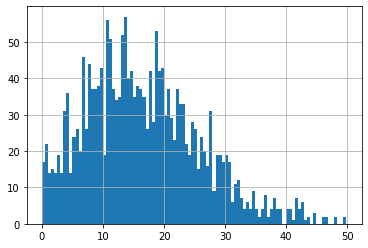

In [20]:
final['loss'].hist(bins=100)

In [21]:
df = pd.DataFrame(res)
df.columns = ['loss', 'jumbos', 'inventory', 'summary', 'max_combo',
              'layouts', 'target', 'edge', 'pid']
dff = pd.DataFrame(buckets)
dff = dff.T
joined = dff.join(df.set_index('pid'))
final = joined.dropna(0)
final.to_csv('../decklizer/tests/unit_test_positive_loss.csv', index=True)

In [12]:
goal = 3
verbiose = True
bucket = final.iloc[189]#[['w', 'n', 'L', 'q', 'B', 'max_combo', 
#                                          'layouts', 'target', 'edge']]
patterns, layout = seed_patterns(bucket['w'], 
                                 [math.ceil(i*bucket['target']) 
                                  for i in bucket['q']], 
                                     bucket['B']+bucket['edge']*2, 
                                     bucket['n'], 
                                     max_combinations=bucket['max_combo'], 
                                     goal=goal, 
                                     verbiose=verbiose)

layout pattern: {1128: 3, 36: 14, 3292: 1}
pattern loss: 0.16 %
minimum doffs to fill order: 28
inventory created: {1128: 1, 36: 372, 3292: 4}

7 possible max 3 combinations
11 unique patterns found


In [16]:
loss, inv, summary = find_optimum(patterns, 
                                      layout, 
                                      bucket['w'], 
                                      [math.ceil(i*bucket['target']) 
                                      for i in bucket['q']], 
                                      int(bucket['B'])+(int(bucket['edge'])*2), 
                                     bucket['n'],
                                      bucket['L'],
                                    max_combinations=int(bucket['max_combo']), 
                                    max_patterns=3,
                                    prioritize='time')

55 possible max 3 patterns

total loss:      8.23 % (1.48e+06 sqm)
total inventory: 0.66 % (1.20e+05 sqm)

inventory created: {1128: 1.0, 36: 4.0, 3292: 0.0}

layout summary:

loss: 8.91% 	 24.0 x	 {1128: 3, 36: 0, 3292: 1}
loss: 0.03% 	 2.0 x	 {1128: 6, 36: 12, 3292: 0}

total jumbos: 26.0 (1.80e+07 sqm)


In [ ]:
make_best_pattern(bucket['q'],
                  bucket['w'],
                  bucket['n'],
                  bucket['B'])

In [ ]:
# [bucket, max_combo, max_patterns, target, edge, goal, verbiose]

patterns, layout = seed_patterns(param[0]['w'], 
                                     param[0]['q'], 
                                     param[0]['B'], 
                                     param[0]['n'], 
                                     max_combinations=param[1], 
                                     goal=param[5], 
                                     verbiose=param[6])

In [ ]:
loss, inv, summary = find_optimum(patterns, 
                                      layout, 
                                      param[0]['w'], 
                                      param[0]['q'], 
                                      param[0]['B'], 
                                      param[0]['n'], 
                                      param[0]['L'],
                                    max_combinations=param[1],
                                    max_patterns=param[2],
                                    prioritize='time')

In [ ]:
q = bucket['q']
w = bucket['w']
n = bucket['n']
usable_width = bucket['B']
"""
Creates the best possible pattern such that all orders are fullfilled in a single
layout

Parameters
----------
q: list
    rolls required (in jumbo lengths)
w: list
    widths required
n: list
    neckins for widths
usable_width: int
    jumbo/doff usable width

Returns
-------
layout: list
    cuts for jumbo for each width (no width is excluded)
"""

# if not all slits can fit in a single bin, do not return a single optimum layout
if np.sum([n,w]) > usable_width:
    print('None')

layout = [max(1, math.floor(i/sum(q)*usable_width/j)) for i,j in zip(q,w)]


# give priority to widths that had to round down the most
# when filling up the rest of the pattern
remainder = [math.remainder(i/sum(q)*usable_width/j, 1) if (math.remainder(i/sum(q)*usable_width/j, 1)
                                                    < 0) else -1 for i,j in zip(q,w) ]
order = np.argsort(remainder)
# sometimes the floor still puts us over
while usable_width - sum([i*j for i,j in zip(layout,w)]) < 0:
    layout[np.argmax(layout)] -= 1

while (usable_width - sum([i*j for i,j in zip(layout,w)])) > min(w):
    for i in order[::-1]:
        layout[i] += 1
        if usable_width - sum([i*j for i,j in zip(layout,w)]) < 0:
            layout[i] -= 1

# compute the loss for the final layout
layout_loss = usable_width - sum([i*j for i,j in zip(layout,w)])
if verbiose:
    print("layout pattern: {}".format(dict(zip([i-j for i,j in zip(w,n)],layout))))
    print("pattern loss: {:0.2f} %".format(layout_loss/usable_width*100))

# sometimes all orders can't be fullfilled in a single layout
if any([i == 0 for i in layout]):
#     return layout
    print(layout)
else:
    # multiply to get the minimum doffs required
    # layout * doffs > q
    doffs = max([math.ceil(i/j) for i,j in zip(q, layout)])
    if verbiose:
        print("minimum doffs to fill order: {}".format(doffs))

    # what inventory is created
    inventory = dict(zip([i-j for i,j in zip(w,n)],[i*doffs-j for i,j in zip(layout,q)]))
    if verbiose:
        print("inventory created: {}".format(inventory))

# return layout

In [ ]:
w=bucket['w']
q=bucket['q']
B=bucket['B']
n=bucket['n']
max_combinations=3
goal=3
verbiose=True
'''
creates a number of optimal patterns for deckling

Parameters
----------
w: list
    list of widths (int)
q: list
    list of rolls for each width (int)
B: int
    usuable width per mother roll
n: list
    neck in for each width (int)
max_combinations: int, default 3
    maximum number of unique products (widths) to have on a mother roll
goal: int, default 3
    the desired number of recovered patterns from the knapsack problem
    for every unique grouping of unique widths at max_combinations
verbiose: bool, default True
    turns on/off print statements during execution

Returns
-------
patterns: list of lists
    list of pattern, loss pairs. Pattern is a dictionary containing a width,
    count pair that describes the pattern on the mother roll. Loss is the
    percent material loss for the pattern.
layout: list
    list of counts for every width on the mother roll. Layout is the best
    possible pattern in terms of minimizing mother rolls to create the order
    with a single pattern.
'''
layout = make_best_pattern(q, w, n, B, verbiose=verbiose)
combos = []
for i in range(1,max_combinations+1)[::-1]:
    combos += list(itertools.combinations(w,r=i))
if verbiose:
    print('')
    print("{} possible max {} combinations".format(len(combos),max_combinations))
patterns = []
for combo in combos:
    # due to the naive soln, combos of len 1 should be skipped.

    # knapsack/store_patterns will only find one solution (0?) if
    # the width is over half the length of the bin
    if len(combo) == 1:
        sub_goal = 1
        # if B / combo[0] < 2:
        #     sub_goal = 1
        # else:
        #     sub_goal = goal
    else:
        sub_goal = goal
    # only provide knapsack with relevant variables
    s = []
    for i in combo:
        s += (int(B/i)*[i])
    t = initt(B,len(s))
    knapsack(s, s, B, len(s), t)
    t = np.array(t)
    patterns += store_patterns(t, s, B, goal=sub_goal)
    for j in range(3):
        for i in patterns:
            for key in list(i[0].keys()):
                loss = (B - np.sum(np.array(list(i[0].keys())) *
                    np.array(list(i[0].values())))) - key
                if loss > 0:
                    i[0][key] += 1
                    i[1] = loss
uni_list = []
for i in patterns:
    if i not in uni_list:
        uni_list.append(i)
patterns = uni_list
patterns = list(np.array(patterns)[np.array(patterns)[:,1]>=0])

# the naive patterns should be kept due to their usefullness
# in order fulfilment regardless of loss
naive = init_layouts(B, w)
for i in naive:
    i = [-j for j in i]
    patterns.append([dict(zip(w,i)),0])

if verbiose:
    print("{} unique patterns found".format(len(patterns)))
# return patterns, layout

In [ ]:
w = param[0]['w'] 
q = param[0]['q']
B = param[0]['B']
n = param[0]['n']
L = param[0]['L']
max_combinations=param[1]
max_patterns=param[2]
prioritize='time'
qt = None
'''
Finds the best possible slitter schedule by linear optimization of a set of
patterns.

Parameters
----------
patterns: list of lists
    list of pattern, loss pairs. Pattern is a dictionary containing a width,
    count pair that describes the pattern on the mother roll. Loss is the
    percent material loss for the pattern.
layout: list
    list of counts for every width on the mother roll. Layout is the best
    possible pattern in terms of minimizing mother rolls to create the order
    with a single pattern.
w: list
    list of widths (int)
q: list
    list of rolls for each width (int)
B: int
    usuable width (mm) of mother roll
n: list
    neck in for each width (int)
L: int
    length (m) of mother roll
max_combinations: int, default 3
    maximum number of unique products (widths) to have on a mother roll
max_patterns: int, default 3
    maximum number of patterns for deckle schedule
prioritize: str, default 'time'
    only relevant when max_patterns < 4. When max_patterns < 4 either the
    lowest material waste linear opimization of patterns is returned
    ('material loss') or the fewest mother rolls used is returned ('time')
qt: list
    default: None. List of the true values for q if algorithm is called
    using an adjusted production target. This is used to set the output
    results inventory to the true inventory created as a result of the
    true order

Returns
-------
loss: float
    percent loss for the deckle schedule
inventory: dictionary
    width, count pairs that describe the inventory created above the order
    critieria
summary: dataframe
    dataframe of loss, jumbos, layout that describe the percent material
    loss, total number of jumbos (or doffs), and the dictionary of width,
    count pairs that describe the pattern for every pattern in the deckle
    schedule
'''
if qt == None:
    qt = q
if prioritize == 'material loss':
    inv_loss = 0
elif prioritize == 'time':
    inv_loss = 1
if 1 < max_patterns < 4:
    # find best of X combination
    if len(w) <= max_combinations:
        pattern_combos = list(itertools.combinations(patterns,r=max_patterns-1))
    else:
        pattern_combos = list(itertools.combinations(patterns,r=max_patterns))
    print("{} possible max {} patterns".format(len(pattern_combos),max_patterns), end='\n\n')
    best_of = []
    for combo in pattern_combos:
        patterns2 = combo
        lhs_ineq = []
        for pattern in patterns2:
            inset = []
            for width in w:
                try:
                    inset.append(-pattern[0][width])
                except:
                    inset.append(0)
            lhs_ineq.append(inset)
    #     naive = init_layouts(B, w)
    #     lhs_ineq = lhs_ineq + naive
        if len(w) <= max_combinations:
            lhs_ineq.append([-i for i in layout])
        lhs_ineq = np.array(lhs_ineq).T.tolist()
        rhs_ineq = [-i for i in q]
        obj = np.ones(len(lhs_ineq[0]))

        result = linprog(c=obj,
                A_ub=lhs_ineq,
                b_ub=rhs_ineq,
                method="revised simplex")
        if result['success'] == True:
            sheet = np.sum([(i*j) for i,j in zip(w, np.array(lhs_ineq))],axis=0)#*np.ceil(result['x'])
            inventory = dict(zip([i-j for i,j in zip(w,n)],np.sum(np.array(lhs_ineq)*-1*\
                                                                  np.ceil(result['x']),axis=1)-np.array(q)))

            # create layout summary
            jumbos = list(np.ceil(result['x'])[np.ceil(result['x'])>0])
            temp = np.array(lhs_ineq)*-1*np.where(np.ceil(result['x']) != 0, 1, 0)
            temp = temp[:, temp.any(0)].T
            non_zero_layouts = list([dict(zip([i-j for i,j in zip(w,n)], i)) for i in temp])

            sheet_loss = [B+i for i in sheet]
            sheet_loss = [i / B * 100 for i,j in zip(sheet_loss,np.where(result['x'] > 0, 1, 0)) if j > 0]

            # remove extra layouts due to ceiling rounding from linprog
            sorted_jumbos = [x for _,x in sorted(zip(sheet_loss,jumbos))][::-1]
            sorted_layouts = np.array(non_zero_layouts)[np.array(sheet_loss).argsort()][::-1]
            sorted_losses = [x for _,x in sorted(zip(sheet_loss,sheet_loss))][::-1]
            for index, layout2 in enumerate(np.array(non_zero_layouts)[np.array(sheet_loss).argsort()][::-1]):
                if all(np.array(list(inventory.values())) - np.array(list(layout2.values())) > 0):
                    sorted_jumbos[index] -= 1
                    new_values = np.array(list(inventory.values())) - np.array(list(layout2.values()))
                    inventory.update(zip(inventory,new_values))

                    # clear layouts that have been set to 0
            summary = (list(zip(sorted_jumbos, sorted_layouts, sorted_losses)))
            summ = []
            for i in summary:
                if i[0] > 0:
                    summ.append(i)
            summary=summ
            loss = sum([i[0]*i[2] for i in summary])/sum([i[0] for i in summary])

            best_of.append([loss, sum(list(inventory.values())), patterns2])

    # minimize inventory or minimize mat. loss
    arr = np.array(best_of, dtype=object)
    patterns_final = arr[np.argmin(arr[:,inv_loss])][2]
elif max_patterns == 1:
    patterns_final = [[dict(zip(w,layout)), 0]]

else:
    patterns_final = patterns

# find overall best combination
# format layouts for linear optimization
lhs_ineq = []
for pattern in patterns_final:
    inset = []
    for width in w:
        try:
            inset.append(-pattern[0][width])
        except:
            inset.append(0)
    lhs_ineq.append(inset)
# naive = init_layouts(B, w)
# lhs_ineq = lhs_ineq + naive

if len(w) <= max_combinations:
    lhs_ineq.append([-i for i in layout])
lhs_ineq = np.array(lhs_ineq).T.tolist()
rhs_ineq = [-i for i in q]
obj = np.ones(len(lhs_ineq[0]))

result = linprog(c=obj,
        A_ub=lhs_ineq,
        b_ub=rhs_ineq,
        method="revised simplex")
if result['success'] == False:
    print('Error')
    print(result['message'])
    return 0


In [ ]:
bucket